# **Laporan Ujian Akhir Semester Foundation of Data Science**

Mata Kuliah: Foundation of Data Science (B)

Anggota Kelompok 1:
- I Made Dwika Dyananda Kumara (2105551074)
- Made Wahyu Adwitya Pramana (2105551092)
- I Kadek Rai Pramana (2105551094)

**Klasifikasi Calon Nasabah Pinjaman Potensial Bank**

Tujuan dari klasifikasi nasabah pinjaman potensial pada dataset bank adalah untuk mengidentifikasi nasabah yang kemungkinan besar akan membeli pinjaman pribadi. Dengan menggunakan algoritma machine learning seperti Decision Tree dan Random Forest, maka bank dapat memprediksi keputusan nasabah berdasarkan berbagai fitur seperti umur, pendapatan, tingkat pendidikan, dan lainnya. Hal ini membantu bank untuk (a) meningkatkan efisiensi, dengan memproses aplikasi pinjaman dengan lebih cepat dan akurat; (b) mengoptimalkan penggunaan sumber daya, dengan mengalokasikannya untuk pemasaran produk pinjaman kepada nasabah yang paling potensial; serta (c) meningkatkan kepuasan nasabah, dengan memberikan pengalaman yang lebih baik kepada nasabah dengan penawaran yang tepat.

Decision Tree adalah algoritma yang membagi dataset menjadi subset yang lebih kecil berdasarkan nilai fitur tertentu, membentuk struktur seperti pohon keputusan. Decision tree mudah diinterpretasikan dan diimplementasikan, tetapi rentan terhadap overfitting.

Random Forest adalah algoritma ensemble yang terdiri dari banyak Decision Tree. Setiap pohon dalam random forest memberikan prediksi, lalu prediksi final diambil berdasarkan mayoritas atau rata-rata prediksi dari semua pohon. Random forest lebih tahan terhadap overfitting dan biasanya memberikan kinerja yang lebih baik dibandingkan Decision Tree tunggal.

# Pengimporan *Library*

In [ ]:
!pip install pingouin https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
import gdown
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from scipy.stats import zscore, ttest_ind, chi2_contingency, levene, f_oneway
from pingouin import welch_anova
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

  Preparing metadata (setup.py) ... done


Kode program yang diberikan merupakan serangkaian perintah yang mencakup instalasi paket, impor pustaka yang dibutuhkan untuk analisis data, pemodelan statistik, dan machine learning. Berikut adalah penjelasan singkat dari setiap pustaka yang diimpor.

- `gdown`: Modul untuk mengunduh file dari Google Drive menggunakan URL berbagi publik.
- `pandas as pd`: `pandas` adalah pustaka yang digunakan untuk manipulasi dan analisis data, diimpor dengan alias `pd`.
- `numpy as np`: `numpy` adalah pustaka untuk komputasi numerik, diimpor dengan alias `np`.
- `ydata_profiling import ProfileReport`: `ProfileReport` dari `ydata_profiling` digunakan untuk menghasilkan laporan profil data otomatis.
- `matplotlib as mpl`: `matplotlib` adalah pustaka untuk membuat visualisasi data.
- `matplotlib.pyplot as plt`: Submodul `pyplot` dari `matplotlib` untuk membuat plot.
- `matplotlib.colors import ListedColormap, LinearSegmentedColormap`: Modul untuk mengatur peta warna khusus.
- `seaborn as sns`: `seaborn` adalah pustaka untuk membuat visualisasi statistik yang lebih mudah dan estetis.
- `scipy.stats import zscore, ttest_ind, chi2_contingency, levene, f_oneway`: Modul dari `scipy` untuk melakukan berbagai uji statistik.
- `pingouin import welch_anova`: Mengimpor fungsi `welch_anova` dari `pingouin` untuk melakukan ANOVA Welch.
- `sklearn.tree import DecisionTreeClassifier`: Mengimpor `DecisionTreeClassifier` dari `scikit-learn` untuk klasifikasi menggunakan pohon keputusan.
- `sklearn.ensemble import RandomForestClassifier`: Mengimpor `RandomForestClassifier` dari `scikit-learn` untuk klasifikasi menggunakan random forest.
- `sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score`: Modul untuk membagi dataset, melakukan pencarian grid, k-fold cross-validation, dan menghitung skor validasi silang.
- `sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay`: Modul untuk menghitung berbagai metrik evaluasi model.
- `sklearn.base import clone`: Mengimpor `clone` untuk membuat salinan model estimator.
- `from sklearn.decomposition import PCA`: Modul untuk menerapkan teknik reduksi dimensi yang digunakan untuk mengurangi jumlah variabel dalam dataset sambil mempertahankan sebanyak mungkin variasi dalam data
- `from sklearn.preprocessing import StandardScaler`: Modul untuk menerapkan teknik pra-pemrosesan data yang digunakan untuk menstandarkan fitur-fitur dalam dataset dengan menghapus rata-rata dan menskalakan ke unit varians (standar deviasi = 1)


# Pengaturan untuk Visualisasi

In [ ]:
sns.set_theme(style='darkgrid')
sns.set_palette(['royalblue', 'darkturquoise'])
cmp = ListedColormap(['#5573cd', '#1ab5b7'])
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

Kode program tersebut mengatur tema dan gaya untuk visualisasi data menggunakan pustaka `seaborn` dan `matplotlib` untuk memastikan tampilan plot yang konsisten dan estetis. Berikut adalah penjelasan setiap bagian dari kode tersebut.

- `sns.set_theme(style='darkgrid')`: Mengatur tema global untuk semua plot yang dibuat dengan `seaborn`. Tema `darkgrid` menambahkan grid gelap di latar belakang plot.
- `sns.set_palette(['royalblue', 'darkturquoise'])`: Mengatur palet warna untuk plot `seaborn` dengan menggunakan warna `royalblue` dan `darkturquoise`.
- `cmp = ListedColormap(['#5573cd', '#1ab5b7'])`: Membuat peta warna khusus yang terdiri dari dua warna dengan kode heksadesimal `#5573cd` (biru) dan `#1ab5b7` (turquoise).
- `mpl.rcParams['font.family'] = 'sans'`: Mengatur jenis font global menjadi sans-serif.
- `mpl.rcParams['font.size'] = 12`: Mengatur ukuran font global menjadi 12.
- `mpl.rcParams['axes.titlesize'] = 18`: Mengatur ukuran font untuk judul sumbu menjadi 18.
- `mpl.rcParams['axes.labelsize'] = 14`: Mengatur ukuran font untuk label sumbu menjadi 14.
- `mpl.rcParams['xtick.labelsize'] = 10`: Mengatur ukuran font untuk label tick pada sumbu x menjadi 10.
- `mpl.rcParams['ytick.labelsize'] = 10`: Mengatur ukuran font untuk label tick pada sumbu y menjadi 10.


# Pengunduhan *File Dataset*

In [ ]:
url_with_sheet = 'https://docs.google.com/spreadsheets/d/1CgoXQGjvFPIvz6TYDE0kH5pp_W261-9q/edit?usp=sharing&gid=0'
output = 'bank_personal_loan_modelling.xlsx'
gdown.download(url_with_sheet, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1CgoXQGjvFPIvz6TYDE0kH5pp_W261-9q
To: /content/bank_personal_loan_modelling.xlsx
100%|██████████| 293k/293k [00:00<00:00, 19.1MB/s]


'bank_personal_loan_modelling.xlsx'

Kode program di atas digunakan untuk mengunduh file dataset dari Google Sheets menggunakan library `gdown`, serta menyimpannya dalam file Excel dengan nama yang telah ditentukan. Berikut adalah penjelasan dari setiap baris kode.

1. `url_with_sheet = 'https://docs.google.com/spreadsheets/d/1CgoXQGjvFPIvz6TYDE0kH5pp_W261-9q/edit?usp=sharing&gid=0'`: Ini adalah variabel yang berisi URL Google Sheets yang ingin diunduh. URL ini mencakup ID lembar Google Sheets serta parameter tambahan yang menunjukkan bahwa kita ingin mengunduh lembar Google Sheets dalam format yang dapat diedit.

2. `output = 'output = 'bank_personal_loan_modelling.xlsx'`: Ini adalah variabel yang berisi nama file output yang ingin digunakan untuk menyimpan hasil unduhan. Dalam kasus ini, nama file output adalah `'bank_personal_loan_modelling.xlsx'`, yang menunjukkan bahwa kita ingin menyimpan hasil unduhan dalam format file Excel (.xlsx).

3. `gdown.download(url_with_sheet, output, quiet=False, fuzzy=True)`: Ini adalah perintah untuk mengunduh file dari Google Sheets menggunakan library `gdown`. Fungsi `gdown.download()` mengambil beberapa argumen, yaitu URL Google Sheets (`url_with_sheet`), nama file output (`output`), argumen `quiet=False` menunjukkan bahwa kita ingin mencetak pesan saat mengunduh (misalnya, progres unduhan), serta argumen `fuzzy=True` menunjukkan bahwa kita ingin menggunakan pencocokan untuk menemukan URL unduhan jika URL yang diberikan tidak cocok secara tepat.

# Pemuatan *File Dataset*

In [ ]:
df = pd.read_excel('/content/bank_personal_loan_modelling.xlsx', sheet_name='Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Kode program ini membaca data dari file Excel ke dalam DataFrame `pandas` dan menampilkan beberapa baris pertama dari DataFrame tersebut. Berikut adalah penjelasan setiap bagian dari kode ini.
- `df = pd.read_excel('/content/bank_personal_loan_modelling.xlsx', sheet_name='Data')` Fungsi ini digunakan untuk membaca data dari file Excel yang terletak di path `/content/bank_personal_loan_modelling.xlsx`. Variabel `df` menyimpan DataFrame yang dihasilkan dari data yang dibaca dari file Excel tersebut. DataFrame adalah struktur data dua dimensi seperti tabel yang disediakan oleh pustaka `pandas`.
- `df.head()`: Metode ini digunakan untuk menampilkan lima baris pertama dari DataFrame `df`. Metode ini berguna untuk memeriksa isi dan struktur data setelah membaca dari file.


# Pemahaman *Dataset* (*DataFrame*)

## Pemeriksaan Dimensi *DataFrame*

In [ ]:
df.shape

(5000, 14)

Ekspresi `df.shape` adalah metode pada objek DataFrame dalam pustaka pandas yang mengembalikan tupel yang menunjukkan jumlah baris dan kolom dalam DataFrame tersebut. Metode tersebut mengembalikan sebuah tupel yang berisi dua angka, yaitu jumlah baris (5000) dan jumlah kolom (14) dalam DataFrame tersebut. Dengan informasi ini, kita dapat dengan cepat memahami ukuran atau skala dari DataFrame yang sedang kita kerjakan.

## Pemeriksaan Nama Kolom *DataFrame*

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

`df.columns` adalah atribut dari objek DataFrame pada pustaka pandas yang mengembalikan Index atau daftar label yang menunjukkan nama-nama kolom dalam DataFrame tersebut. Hasil output menunjukkan bahwa DataFrame memiliki kolom-kolom dengan nama sebagai berikut: 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', dan 'CreditCard'. Setiap nama kolom ini adalah label yang digunakan untuk merujuk pada data di setiap kolom, yang memudahkan akses dan manipulasi data dalam analisis dan pemrosesan data menggunakan pandas di Python. Berikut merupakan penjelasan mengenai kolom-kolom dari DataFrame tersebut.

- 'ID': Identitas nasabah.
- 'Age': Usia nasabah dalam tahun terakhir.
- 'Experience': Jumlah pengalaman kerja nasabah dalam beberapa tahun.
- 'Income': Jumlah pendapatan tahunan nasabah (dalam ribuan).
- 'ZIP Code': Kode pos tempat tinggal nasabah.
- 'Family' Jumlah anggota keluarga nasabah.
- 'CCAvg': Rata-rata pengeluaran kartu kredit per bulan nasabah (dalam ribuan).
- 'Education': Tingkat pendidikan nasabah (1 untuk gelar sarjana, 2 untuk gelar master, 3 untuk gelar lanjutan atau profesional).
- 'Mortgage': Nilai hipotek yang dimiliki oleh nasabah (dalam ribuan).
- 'Securities Account': Variabel biner yang menunjukkan apakah individu memiliki rekening efek atau sekuritas.
- 'CD Account': Variabel biner yang menunjukkan apakah individu memiliki sertifikat deposito (Certificate of Deposit atau CD).
- 'Online': Variabel biner yang menunjukkan apakah individu menggunakan layanan perbankan online.
- 'CreditCard': Variabel biner yang menunjukkan apakah individu memiliki kartu kredit.
- 'Personal Loan': Variabel biner yang menunjukkan apakah nasabah menerima pinjaman pribadi yang ditawarkan oleh bank. Variabel ini menjadi variabel target dari model klasifikasi untuk memahami faktor-faktor yang mempengaruhi keputusan pinjaman.

## Pemeriksaan Indeks *DataFrame*

In [ ]:
df.index

RangeIndex(start=0, stop=5000, step=1)

`df.index` adalah atribut dari objek DataFrame pada pustaka pandas yang memberikan informasi tentang indeks atau label baris dari DataFrame tersebut. Pada contoh yang diberikan, `RangeIndex(start=0, stop=5000, step=1)` menunjukkan bahwa DataFrame memiliki indeks berupa RangeIndex yang dimulai dari 0 hingga 4999 (total 5000 baris data), dengan penambahan sebesar 1 setiap langkahnya. RangeIndex ini memberikan label numerik berurutan kepada setiap baris dalam DataFrame, memungkinkan pengaksesan dan referensi data yang mudah berdasarkan indeks numerik ini. Penggunaan RangeIndex adalah umum dalam DataFrame yang besar dengan baris data yang teratur secara numerik, seperti dalam contoh ini di mana baris-barisnya diberi label dari 0 hingga 4999 secara berurutan.

## Pemeriksaan Ringkasan Tentang *DataFrame*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Kode program `df.info()` memberikan informasi tentang DataFrame `df`, yakni jumlah entri (baris) dan kolom, serta tipe data dari setiap kolom, jumlah nilai non-null, dan penggunaan memori. Berdasarkan output tersebut, DataFrame tersebut memiliki 5000 baris (entries) dan 14 kolom (columns). Indeks DataFrame adalah `RangeIndex` yang mencakup 5000 baris, dimulai dari 0 hingga 4999. Terdapat 14 kolom dengan tipe data yang berbeda-beda. Kolom seperti 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', dan 'CreditCard' semuanya memiliki tipe data integer 64-bit. Hanya kolom 'CCAvg' yang memiliki tipe data float 64-bit. Setiap kolom memiliki 5000 nilai non-null, yang menunjukkan bahwa tidak ada nilai null (missing values) dalam setiap kolom tersebut. DataFrame ini menggunakan sekitar 547.0 KB dari memori komputer. Informasi ini sangat berguna untuk mengevaluasi apakah ada nilai yang hilang (null) dalam DataFrame, serta untuk memahami struktur data secara keseluruhan.

In [ ]:
report = ProfileReport(df, title='Personal Bank Loan Report')
report

Output hidden; open in https://colab.research.google.com to view.

Kode program ini menggunakan pustaka `ydata_profiling` (sebelumnya dikenal sebagai `pandas-profiling`) untuk menghasilkan laporan komprehensif dan interaktif tentang DataFrame. Laporan ini sangat berguna untuk eksplorasi data awal dan identifikasi masalah potensial sebelum melakukan analisis atau pemodelan lebih lanjut. Laporan ini mencakup berbagai bagian seperti berikut.

- Overview: Ringkasan data, termasuk jumlah baris, kolom, dan tipe data.
- Alerts: Peringatan tentang potensi masalah dalam data, seperti nilai yang hilang atau distribusi yang anomali.
- Reproduction: Informasi mengenai pembuatan laporan tersebut.
- Variables: Statistik deskriptif dan visualisasi untuk setiap variabel dalam DataFrame.
- Interactions: Analisis interaksi antara variabel, yang bisa berupa korelasi atau scatter plots.
- Correlations: Matriks korelasi yang menunjukkan hubungan antara variabel numerik.
- Missing Values: Analisis nilai yang hilang dalam data.
- Sample: Contoh baris dari data untuk memudahkan pemeriksaan manual.

Hasil yang diperoleh dari laporan tersebut yaitu sebagai berikut.

- Dataset ini memiliki 5000 data nasabah.
- Dataset ini memiliki 14 variabel termasuk 13 variabel independen dan 1 variabel dependen yaitu 'Personal Loan'.
- Dataset ini memiliki 6 variabel numerik, yaitu 'ID', 'Age', 'Experience', 'Income', 'CC_Avg', dan 'Mortgage'.
- Dataset ini memiliki 3 variabel kategorikal, yaitu 'Family', 'Education', dan 'Zip_Code'.
- Dataset ini memiliki 5 variabel Boolean (kategorikal biner), yaitu 'Personal_Loan', 'Securities Account', 'CD_Account', 'Online', dan 'Credit_Card'.
- Tidak ada nilai yang hilang dalam Dataset ini.
- Tidak ada baris yang duplikat dalam dataset.
- Dataset berisi nilai negatif pada kolom 'Experience', sehingga tidak masuk akal.
- 'ID' didistribusikan secara seragam. Oleh karena itu, 'ID' bertindak sebagai pengenal dan tidak memiliki informasi yang berharga untuk model.
- 'Zip Code' berisi sejumlah besar kategori (467 kategori). Oleh karena itu, tampaknya tidak memiliki banyak informasi untuk model.

# Pembersihan Data (*Data Cleaning*)

Pembersihan data, atau yang juga dikenal sebagai data cleaning, adalah proses mempersiapkan dan menstrukturkan data mentah untuk digunakan dalam analisis lebih lanjut. Proses ini mencakup identifikasi dan koreksi data yang salah atau tidak lengkap, penghapusan data yang tidak relevan, pengisian nilai yang hilang, serta transformasi variabel yang ada. Pembersihan data merupakan langkah penting dalam setiap proyek pembelajaran mesin karena membantu meningkatkan akurasi model dengan mengurangi noise dan kesalahan. Data yang tidak dibersihkan dengan baik dapat menghasilkan model yang terlalu kompleks, sulit diinterpretasikan, dan memiliki risiko tinggi overfitting. Selain itu, data kotor dapat secara signifikan mengurangi akurasi model; bahkan sedikit noise dapat menurunkan kinerjanya secara drastis.

## Penyalinan *DataFrame*

In [ ]:
df_copy = df.copy()

Kode program tersebut membuat salinan dari DataFrame `df` dan menyimpannya ke dalam variabel `df_copy`. Dengan menggunakan method `copy()`, ini bertujuan untuk membuat duplikat dari DataFrame yang memiliki data yang sama persis dengan DataFrame aslinya. Ini memungkinkan kita untuk melakukan manipulasi atau transformasi pada DataFrame salinan tanpa memengaruhi DataFrame aslinya. Hal ini berguna ketika kita ingin melakukan operasi seperti filtering, penggantian nilai, atau penghapusan data tanpa merusak DataFrame asli. Dengan membuat salinan, kita dapat menjaga integritas data asli sembari melakukan eksperimen atau analisis tambahan pada DataFrame salinan.

## Penghapusan Kolom yang Tidak Penting

In [ ]:
df_copy = df_copy.drop(columns=['ID'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Kode program tersebut digunakan untuk menghapus kolom-kolom tertentu yang tidak begitu penting dari DataFrame `df_copy`, yaitu kolom 'ID'. Fungsi `drop(columns=[])` digunakan untuk menghapus kolom berdasarkan nama kolom yang diberikan dalam daftar yang disediakan di dalam kurung siku.

Setelah kolom-kolom tertentu dihapus, fungsi `info()` dipanggil untuk memberikan informasi tentang DataFrame `df_copy` setelah penghapusan dilakukan, termasuk informasi tentang jumlah entri (baris), nama kolom, dan tipe data dari setiap kolom. Hal ini membantu untuk memverifikasi apakah penghapusan kolom berhasil dilakukan dengan benar.

## Penggantian Nama Kolom

In [ ]:
df_copy = df_copy.rename(columns={
    'Age': 'age',
    'Experience': 'experience',
    'Income': 'income',
    'ZIP Code': 'zip_code',
    'Family': 'family',
    'CCAvg': 'cc_avg',
    'Education': 'education',
    'Mortgage': 'mortgage',
    'Personal Loan': 'personal_loan',
    'Securities Account': 'securities_account',
    'CD Account': 'cd_account',
    'Online': 'online',
    'CreditCard': 'credit_card'
})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   experience          5000 non-null   int64  
 2   income              5000 non-null   int64  
 3   zip_code            5000 non-null   int64  
 4   family              5000 non-null   int64  
 5   cc_avg              5000 non-null   float64
 6   education           5000 non-null   int64  
 7   mortgage            5000 non-null   int64  
 8   personal_loan       5000 non-null   int64  
 9   securities_account  5000 non-null   int64  
 10  cd_account          5000 non-null   int64  
 11  online              5000 non-null   int64  
 12  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Kode program tersebut melakukan pengubahan nama kolom dalam DataFrame `df_copy` menggunakan fungsi `rename()`. Tujuan dari pengubahan nama kolom adalah untuk merapikan nama kolom sehingga memudahkan proses analisis lebih lanjut.

Setelah pengubahan nama kolom dilakukan, `df_copy.info()` digunakan untuk menampilkan informasi tentang DataFrame setelah perubahan nama kolom tersebut. Hal ini berguna untuk memastikan bahwa perubahan nama kolom telah dilakukan dengan benar.

## Penanganan Baris yang Duplikat

In [ ]:
df_copy[df_copy.duplicated()]

,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card


Kode program tersebut digunakan untuk menemukan baris-baris yang merupakan duplikat dalam DataFrame `df_copy`. Method `duplicated()` digunakan untuk mengidentifikasi baris-baris yang memiliki nilai yang sama dengan baris lain dalam DataFrame. Ketika method ini dipanggil tanpa parameter, ia akan mengembalikan baris-baris yang merupakan duplikat dari baris-baris sebelumnya. Hal ini dapat membantu untuk menemukan dan mengevaluasi duplikat dalam data untuk kemungkinan penghapusan atau pengelolaan lebih lanjut. Berdasarkan output dari kode tersebut, DataFrame tersebut tidak memiliki baris yang duplikat. Untuk menghapus baris yang merupakan duplikat dari DataFrame, digunakan metode `drop_duplicates()` pada DataFrame. Ini akan menghapus baris-baris yang identik (duplikat) di DataFrame.

## Penanganan Nilai Kosong (*Null Value*)

In [ ]:
df_copy.isna().sum()

age                   0
experience            0
income                0
zip_code              0
family                0
cc_avg                0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

Kode program tersebut digunakan untuk menghitung jumlah nilai yang kosong (NaN) di setiap kolom DataFrame `df_copy`. Kode `df_copy.isna()` digunakan untuk membuat DataFrame boolean baru yang memiliki nilai `True` di setiap sel yang berisi NaN dan `False` di setiap sel yang memiliki nilai bukan NaN. Kode `.sum()` kemudian digunakan untuk menjumlahkan nilai `True` di setiap kolom, karena dalam pemrosesan bilangan boolean, `True` dianggap sebagai 1 dan `False` dianggap sebagai 0. Sehingga, `.sum()` akan memberikan jumlah total nilai `True` dalam setiap kolom, yang sebenarnya adalah jumlah nilai NaN di setiap kolom. Berdasarkan output dari kode tersebut, DataFrame tersebut tidak memiliki nilai kosong.

## Penanganan Nilai Derau (*Noise*)

Penanganan noise adalah proses di mana bagian-bagian dataset yang tidak relevan atau mengandung gangguan dihapus sebelum data dapat digunakan untuk analisis.

### Penanganan Nilai Derau (*Noise*) pada Variabel 'zip_code'

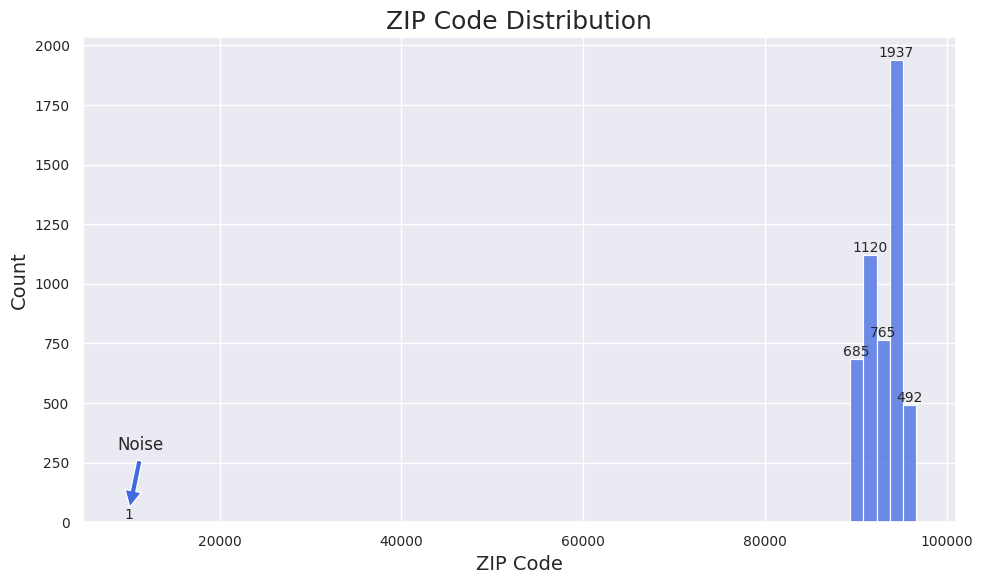

In [ ]:
plt.figure(figsize=(10, 6))
graph = sns.histplot(x='zip_code', data=df_copy, bins=60)

for p in graph.patches:
    height = p.get_height()
    width = p.get_width()
    if height > 0:
        graph.text(p.get_x() + width / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10)

        if p.get_x() < 10000:
            plt.annotate('Noise',
                        xy=(p.get_x() + width / 2, height + 50),
                        xytext=(p.get_x() + 2000, height + 300),
                        arrowprops=dict(shrink=0.05),
                        ha='center')

plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.title('ZIP Code Distribution')
plt.tight_layout()
plt.show()

Kode program ini menghasilkan histogram distribusi kode pos dari DataFrame `df_copy` menggunakan `seaborn` dan `matplotlib`. Histogram memiliki 60 bin dan menampilkan jumlah pada setiap batang. Untuk batang dengan kode pos di bawah 10000, akan ditambahkan anotasi 'Noise' dengan panah. Berdasarkan plot tersebut, kolom kode pos memiliki nilai minimum yang jauh lebih kecil daripada nilai rata-ratanya, sehingga nilai tersebut terindikasi sebagai noise.

In [ ]:
df_copy[df_copy['zip_code'] < 10000]

,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


Kode program ini menggunakan pandas untuk memfilter baris-baris dalam DataFrame `df_copy` berdasarkan kondisi tertentu pada kolom `zip_code`. Kode ini digunakan untuk mengambil subset data dari `df_copy` yang hanya mencakup baris-baris di mana nilai dalam kolom `zip_code` kurang dari 10000. Misalnya, jika `zip_code` mewakili kode pos, dan nilai kurang dari 10000 dianggap sebagai anomali atau noise, kode ini membantu dalam mengisolasi dan menganalisis entri-entri tersebut lebih lanjut. Berdasarkan output tersebut, ditemukan 1 data yang mengandung noise pada kolom kode pos karena hanya berisi 4 digit nilai, sementara nilai-nilai lain pada kolom ini semuanya memiliki 5 digit nilai.


In [ ]:
df_copy = df_copy[df_copy['zip_code'] >= 10000]

Kode berikut digunakan untuk memfilter DataFrame `df_copy` sehingga hanya menyertakan baris-baris yang di mana nilai dalam kolom `zip_code` bernilai lebih besar atau sama dengan 10000. Hasilnya adalah DataFrame `df_copy` yang diperbarui, yang tidak lagi mengandung noise yaitu baris-baris dengan nilai `zip_code` kurang dari 10000.

### Penanganan Nilai Derau (*Noise*) pada Variabel 'experience'

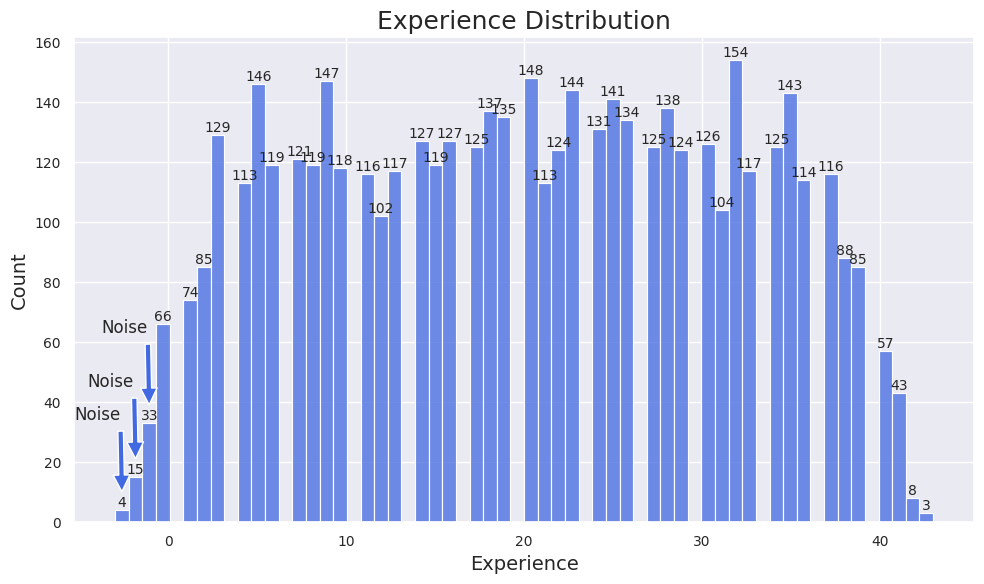

In [ ]:
plt.figure(figsize=(10, 6))
graph = sns.histplot(x='experience', data=df_copy, bins=60)

for p in graph.patches:
    height = p.get_height()
    width = p.get_width()
    if height > 0:
        graph.text(p.get_x() + width / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10)

        if p.get_x() < -1:
            plt.annotate('Noise',
                        xy=(p.get_x() + width / 2, height + 5),
                        xytext=(p.get_x() - 1, height + 30),
                        arrowprops=dict(shrink=0.05),
                        ha='center')

plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Experience Distribution')
plt.tight_layout()
plt.show()

Kode program ini menghasilkan histogram distribusi pengalaman kerja dari DataFrame `df_copy` menggunakan `seaborn` dan `matplotlib`. Histogram memiliki 60 bin dan menampilkan jumlah pada setiap batang. Untuk batang dengan pengalaman kerja negatif (kurang dari 0), akan ditambahkan anotasi 'Noise' dengan panah. Berdasarkan plot tersebut, kolom pengalaman kerja memiliki beberapa nilai negatif, sehingga nilai tersebut terindikasi sebagai noise.

In [ ]:
df_copy[df_copy['experience'] < 0]['experience'].value_counts().reset_index()

,experience,count
0,-1,33
1,-2,15
2,-3,4


Kode ini digunakan untuk menghitung jumlah nilai pada kolom 'experience' yang kurang dari 0 dalam DataFrame `df_copy`, dan kemudian mengubah hasilnya menjadi DataFrame yang berisi nilai-nilai tersebut beserta jumlah kemunculannya. Berdasarkan output tersebut, terdapat tiga kategori pengalaman kerja yang bernilai negatif, yaitu -1, -2, dan -3.

In [ ]:
df_copy['experience'] = df_copy['experience'].apply(abs)

Kode ini menggantikan nilai-nilai dalam kolom pengalaman kerja DataFrame `df_copy` dengan nilai absolut dari masing-masing nilai tersebut. Hal ini dilakukan karena jumlah nilai yang tidak sesuai (noise values) dalam kolom pengalaman kerja sangat sedikit, sehingga diasumsikan bahwa nilai-nilai tersebut salah tercatat sebagai negatif dan menggantinya dengan nilai absolutnya.

## Penanganan Nilai Pencilan (*Outlier*)

Outliers adalah titik data yang jauh lebih tinggi atau lebih rendah daripada sebagian besar nilai lain dalam himpunan data tersebut.

In [ ]:
categorical_cols = ['credit_card',
                    'family',
                    'education',
                    'personal_loan',
                    'securities_account',
                    'cd_account',
                    'online',
                    'zip_code']
numerical_cols = df_copy.columns.difference(categorical_cols)

kurtosis_df = df_copy[numerical_cols].kurtosis()
kurtosis_df = kurtosis_df.reset_index()
kurtosis_df = kurtosis_df.rename(columns={'index': 'Variable', 0: 'Kurtosis'})
kurtosis_df

,Variable,Kurtosis
0,age,-1.153280
1,cc_avg,2.645838
2,experience,-1.144704
3,income,-0.044398
4,mortgage,4.755249


Kode program ini bertujuan untuk menghitung nilai kurtosis untuk kolom-kolom numerik dalam DataFrame `df_copy`. Pertama, kolom-kolom kategorikal yang telah ditentukan disimpan dalam variabel `categorical_cols`, sementara kolom-kolom numerik diidentifikasi dengan mengurangi kolom-kolom kategorikal dari seluruh kolom dalam DataFrame menggunakan metode `difference()`.

Setelah itu, nilai kurtosis dihitung menggunakan metode `.kurtosis()` pada subset DataFrame yang terdiri dari kolom-kolom numerik (`df_copy[numerical_cols]`). Hasilnya disimpan dalam `kurtosis_df`, yang kemudian direset indeksnya dan diberi nama ulang kolom-kolomnya agar lebih jelas. Hasil akhirnya adalah DataFrame `kurtosis_df` yang berisi variabel sebagai indeks dan nilai kurtosis sebagai nilai dalam kolom 'kurtosis', memberikan gambaran tentang 'tailedness' dari distribusi setiap variabel numerik dalam dataset.

Kurtosis adalah ukuran dari 'tailedness' atau bentuk dari distribusi. Jika nilai kurtosis lebih besar dari 3, kemungkinan variabel tersebut mengandung outlier. Hal ini karena kurtosis yang berlebihan menunjukkan bahwa titik-titik data memiliki konsentrasi yang lebih tinggi di ekor distribusi daripada biasanya, yang mungkin menandakan adanya outlier. Dari semua variabel numerik, hanya variabel mortgage yang memiliki nilai kurtosis di atas 3. Untuk mendeteksi kemungkinan outlier dalam variabel ini, kami menggunakan teknik Z-score.

### Penanganan Nilai Pencilan (*Outlier*) pada Variabel 'mortgage'

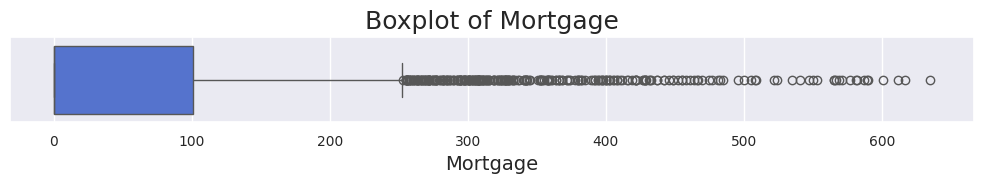

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['mortgage'])
plt.title('Boxplot of Mortgage')
plt.xlabel('Mortgage')
plt.tight_layout()
plt.show()

Kode ini digunakan untuk membuat boxplot dari kolom 'mortgage' dalam DataFrame `df_copy`. Boxplot ini membantu dalam visualisasi distribusi data serta deteksi outlier. Berdasarkan plot tersebut, distribusi dari kolom tersebut cenderung condong ke kiri, serta terdapat beberapa outlier pada bagian kanan dari boxplot tersebut.

In [ ]:
outlier = df_copy[zscore(df_copy['mortgage']) > 3]['mortgage']
print(f"Total Outlier: {outlier.count()}")
df_copy.drop(outlier.index, inplace=True)
df_copy.reset_index(drop=True, inplace=True)

Total Outlier: 105


Kode ini digunakan untuk mengidentifikasi, menghitung, dan menghapus outlier dari kolom 'mortgage' dalam DataFrame `df_copy` menggunakan Z-score dengan batas threshold 3.

Metode Z-score untuk deteksi outlier adalah teknik statistik yang digunakan untuk mengidentifikasi outlier dari kumpulan data dengan menghitung seberapa jauh setiap titik data berada dari mean dalam satuan standar deviasi. Titik data dengan nilai Z-score lebih dari 3 satuan standar deviasi dari mean dianggap sebagai outlier.

Berdasarkan output tersebut, ditemukan 105 baris dengan nilai Z-score kolom 'mortgage' lebih besar dari 3. Oleh karena itu, 105 baris tersebut dianggap sebagai outlier, kemudian memfilter baris tersebut dari DataFrame tersebut. Setelah menghapus outlier, indeks DataFrame direset untuk memastikan konsistensi dalam data yang tersimpan.

## Transformasi Nilai Variabel 'cc_avg'

In [ ]:
df_copy.loc[:, 'cc_avg'] = df_copy['cc_avg'] * 12

Dalam DataFrame ini, 'cc_avg' mewakili pengeluaran kartu kredit rata-rata bulanan, sedangkan 'income' mewakili jumlah pendapatan tahunan. Untuk membuat unit dari kolom-kolom tersebut sama, maka dilakukan pengkonversian pengeluaran kartu kredit rata-rata bulanan menjadi tahunan. Kode ini mengalikan nilai dalam kolom 'cc_avg' DataFrame `df_copy` dengan 12 untuk mengkonversi pengeluaran kartu kredit rata-rata bulanan menjadi pengeluaran tahunan.

# Analisis Univariat

## Variabel Kategorikal

In [ ]:
df_copy[categorical_cols].describe()

,credit_card,family,education,personal_loan,securities_account,cd_account,online,zip_code
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.294647,2.401308,1.887209,0.088476,0.104414,0.057622,0.596445,93171.335922
std,0.455930,1.149541,0.839421,0.284014,0.305828,0.233050,0.490660,1757.311655
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,90005.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,91942.000000
50%,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,93437.000000
75%,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,94608.000000
max,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96651.000000


Kode ini digunakan untuk menjalankan statistik deskriptif pada kolom-kolom kategorikal dalam DataFrame `df_copy`, seperti 'credit_card', 'family', 'education', 'personal_loan', 'securities_account', 'cd_account', 'online', dan 'zip_code'. Semua variabel kategorikal tersebut sudah dalam bentuk numerik, sehingga output dari kode tersebut berupa ringkasan yang mencakup count (jumlah data), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (median atau kuatril kedua), 75% (kuartil ketiga), dan max (nilai maksimum) dari setiap kolom kategorikal tersebut.

Output yang dihasilkan menunjukkan ringkasan statistik deskriptif untuk beberapa kolom dalam dataset. Berikut adalah interpretasi dari output tersebut.

- 'credit_card': Rata-rata penggunaan kartu kredit adalah sekitar 0.29, dengan standar deviasi sekitar 0.46. Nilai minimum adalah 0 dan maksimum adalah 1.
- 'family': Rata-rata jumlah anggota keluarga adalah sekitar 2.40, dengan standar deviasi sekitar 1.15. Nilai minimum adalah 1 dan maksimum adalah 4.
- 'education': Rata-rata tingkat pendidikan adalah sekitar 1.89, dengan standar deviasi sekitar 0.84. Nilai minimum adalah 1 (gelar sarjana) dan maksimum adalah 3 (gelar profesional).
- 'personal_loan': Proporsi orang yang mengambil pinjaman pribadi adalah sekitar 0.09 (atau 9%). Standar deviasi adalah 0.28, menunjukkan variasi yang cukup besar antara sampel.
- 'securities_account': Proporsi orang yang memiliki akun sekuritas adalah sekitar 0.10 (atau 10%). Standar deviasi adalah 0.31.
- 'cd_account': Proporsi orang yang memiliki akun deposito berjangka adalah sekitar 0.06 (atau 6%). Standar deviasi adalah 0.23.
- 'online': Proporsi orang yang menggunakan layanan perbankan online adalah sekitar 0.60 (atau 60%). Standar deviasi adalah 0.49.
- 'zip_code': Rata-rata kode pos adalah sekitar 93171.33, dengan standar deviasi sekitar 1757.31. Nilai minimum adalah 90005 dan maksimum adalah 96651.


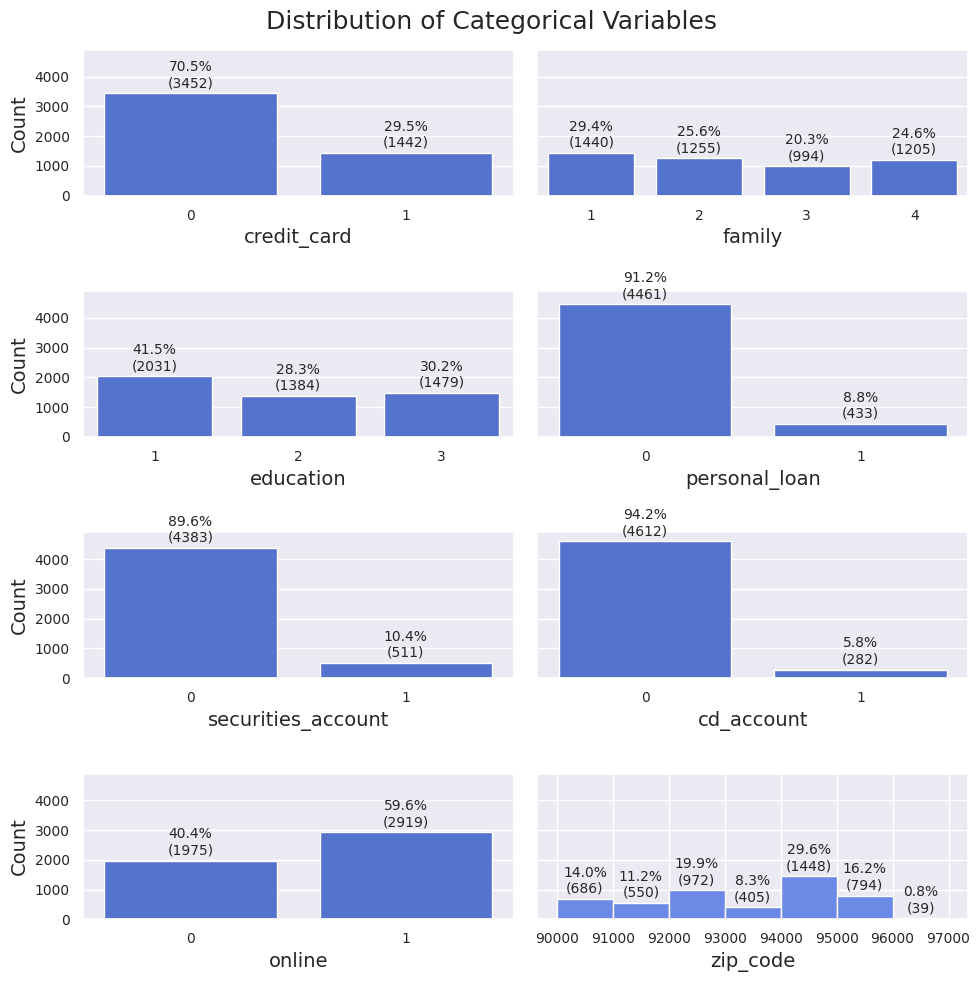

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(categorical_cols, start=1):
    plt.subplot(4, 2, i)

    if column == 'zip_code':
        bin_edges = [90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000]
        sns.histplot(df_copy['zip_code'], bins=bin_edges, kde=False)
    else:
        # Plot countplot dengan nilai dan persentase
        sns.countplot(x=column, data=df_copy)
        total_count = len(df_copy[column])

    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 100, f'{height / total_count * 100:.1f}%\n({height:.0f})', ha='center', va='bottom', fontsize=10)

    plt.xlabel(f'{column}')
    plt.ylabel('')

    if i % 2 == 1:
        plt.ylabel('Count')
    else:
        plt.tick_params(axis='y', which='both', left=False, labelleft=False)

    plt.ylim(0, 4900)

plt.suptitle('Distribution of Categorical Variables', fontsize=18)
plt.tight_layout()
plt.show()


Kode ini menghasilkan visualisasi distribusi variabel kategorikal dalam dataset. Ukuran plot diatur dengan `figsize` sebesar 10x10 inci dan penyesuaian ruang antar subplot menggunakan `plt.subplots_adjust(hspace=0.5)`. Untuk setiap variabel kategorikal dalam `categorical_cols`, subplot dibuat dalam tata letak 4x2. Jika kolom adalah 'zip_code', histogram diplot dengan batas bin yang ditentukan. Untuk kolom lainnya, digunakan countplot untuk menampilkan jumlah kemunculan setiap kategori. Di atas setiap bar, teks ditambahkan untuk menunjukkan persentase dan jumlah absolut dari kategori tersebut. Label sumbu x diatur sesuai dengan nama kolom, label sumbu y dihilangkan untuk tampilan yang lebih bersih pada setiap subplot yang ada di posisi genap. Batas maksimum y diatur ke 4900 untuk semua subplot. Plot keseluruhan diberi judul "Distribution of Categorical Variables" dan ditampilkan dengan `plt.show()`.

Kesimpulan yang didapatkan berdasarkan plot tersebut yaitu sebagai berikut.

- 'credit_card': Sekitar 71% nasabah tidak menggunakan kartu kredit.
- 'family': Sekitar 29% dari jumlah anggota keluarga nasabah adalah 1, 26% adalah 2, 20% adalah 3, dan 24% adalah 4.
- 'education': Sekitar 42% nasabah memiliki gelar sarjana, 30% memiliki gelar master, serta 28% memiliki gelar profesional.
- 'personal_loan': Sekitar 90% nasabah tidak menerima pinjaman pribadi yang ditawarkan oleh bank. Sehingga dataset ini tergolong tidak seimbang.
- 'securities_account': Sekitar 90% nasabah tidak memiliki akun sekuritas di bank.
- 'cd_account': Sekitar 94% nasabah tidak memiliki akun deposito berjangka di bank.
- 'online': Sekitar 60% nasabah menggunakan layanan perbankan online.
- 'zip_code': Sekitar 30% dari kode pos nasabah berada dalam rentang 94000 hingga 94999, 20% berada dalam rentang 92000 hingga 92999, 16% berada dalam rentang 95000 hingga 95999, 14% berada dalam rentang 90000 hingga 90999, 11% berada dalam rentang 91000 hingga 91999, 8% berada dalam rentang 93000 hingga 93999, serta 1% berada dalam rentang 96000 hingga 96999.

## Variabel Numerikal

In [ ]:
df_copy[numerical_cols].describe()

,age,cc_avg,experience,income,mortgage
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,45.341438,22.804945,20.135676,72.021046,48.027585
std,11.464840,20.512184,11.417319,44.716165,83.855702
min,23.000000,0.000000,0.000000,8.000000,0.000000
25%,35.000000,8.400000,10.000000,38.000000,0.000000
50%,45.000000,18.000000,20.000000,63.000000,0.000000
75%,55.000000,30.000000,30.000000,93.000000,94.000000
max,67.000000,120.000000,43.000000,224.000000,361.000000


Kode ini digunakan untuk menjalankan statistik deskriptif pada kolom-kolom numerik dalam DataFrame `df_copy`, seperti 'age', 'experience', 'income', 'cc_avg', dan 'mortgage'. Ini akan memberikan ringkasan yang mencakup count (jumlah data), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (median atau kuatril kedua), 75% (kuartil ketiga), dan max (nilai maksimum) dari setiap kolom numerik tersebut.

Output yang dihasilkan adalah statistik deskriptif untuk beberapa kolom numerik dalam dataset. Berikut adalah interpretasi dari output tersebut.

- 'age': Rata-rata usia responden adalah sekitar 45 tahun, dengan standar deviasi sekitar 11.46 tahun. Usia termuda adalah 23 tahun dan yang tertua adalah 67 tahun.
- 'cc_avg': Rata-rata pengeluaran kartu kredit bulanan adalah sekitar 22.8, dengan standar deviasi sekitar 20.51. Nilai minimum adalah 0 dan nilai maksimum adalah 120.
- 'experience': Rata-rata pengalaman kerja responden adalah sekitar 20 tahun, dengan standar deviasi sekitar 11.42 tahun. Pengalaman kerja terpendek adalah 0 tahun dan yang terlama adalah 43 tahun.
- 'income': Rata-rata pendapatan tahunan responden adalah sekitar 72.02, dengan standar deviasi sekitar 44.72. Pendapatan minimum adalah 8 dan maksimum adalah 224.
- 'mortgage': Rata-rata jumlah hipotek adalah sekitar 48.03, dengan standar deviasi sekitar 83.86. Nilai minimum adalah 0 dan yang tertinggi adalah 361.

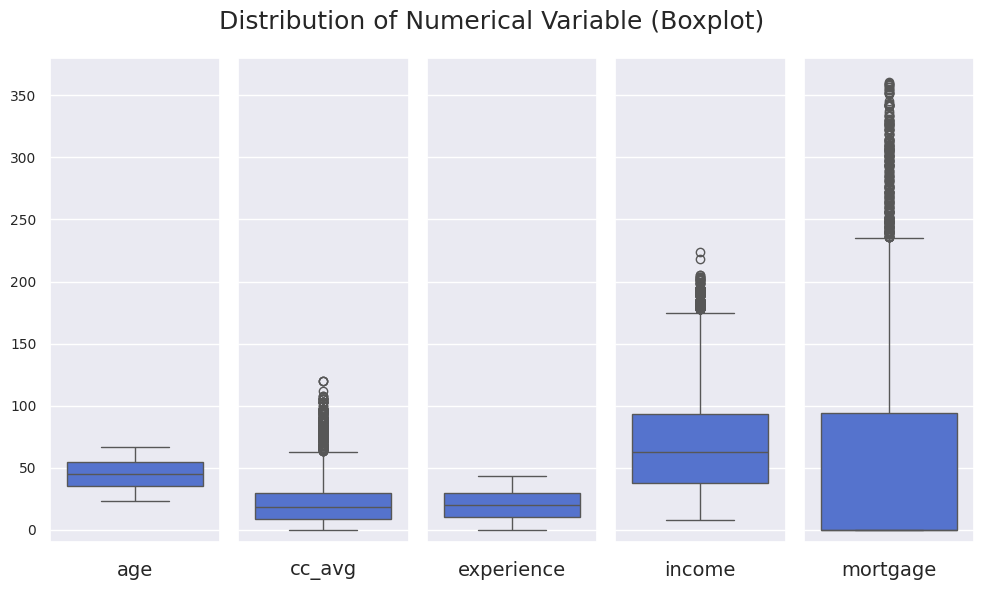

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)

for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df_copy[column], orient='v')
    plt.xlabel(f'{column}')
    plt.ylabel('')

    if i != 1:
        plt.tick_params(axis='y', which='both', left=False, labelleft=False)

    plt.ylim(-10, 380)

plt.suptitle('Distribution of Numerical Variable (Boxplot)', fontsize=18)
plt.tight_layout()
plt.show()

Kode ini digunakan untuk membuat visualisasi distribusi variabel numerik dalam dataset menggunakan boxplot. Plot diatur dengan ukuran 10x6 inci dan penyesuaian ruang antar subplot horizontal menggunakan `plt.subplots_adjust(wspace=0.5)`. Untuk setiap variabel numerik dalam `numerical_cols`, subplot dibuat dalam satu baris dengan total lima kolom. Setiap boxplot diplot secara vertikal untuk menampilkan distribusi data dalam kolom yang bersangkutan. Label sumbu x diatur sesuai dengan nama kolom, sementara label sumbu y dihapus untuk subplot yang tidak pertama untuk tampilan yang lebih bersih. Batas sumbu y diatur dari -10 hingga 280 untuk konsistensi visual. Plot keseluruhan diberi judul "Distribution of Numerical Variable (Boxplot)" dan ditampilkan dengan `plt.show()`.

Kesimpulan yang didapatkan berdasarkan plot tersebut yaitu sebagai berikut.

- 'age': Median usia (garis dalam kotak) sekitar 45 tahun. Rentang interkuartil (IQR) untuk usia berada dalam rentang 35-55 tahun. Tidak ada outlier yang signifikan.
- 'cc_avg': Median pengeluaran sekitar 18. IQR berada dalam rentang 8-30. Terdapat beberapa outlier di atas 63.
- 'experience': Median pengalaman kerja sekitar 20 tahun. IQR berada dalam rentang 10-30 tahun. Tidak ada outlier yang signifikan.
- 'income': Median pendapatan sekitar 63. IQR berada dalam rentang 38-93. Terdapat beberapa outlier di atas 176.
- 'mortgage': Median hipotek sekitar 0 (banyak nilai nol). IQR berada dalam rentang 0-94. Terdapat beberapa outlier di atas 235.


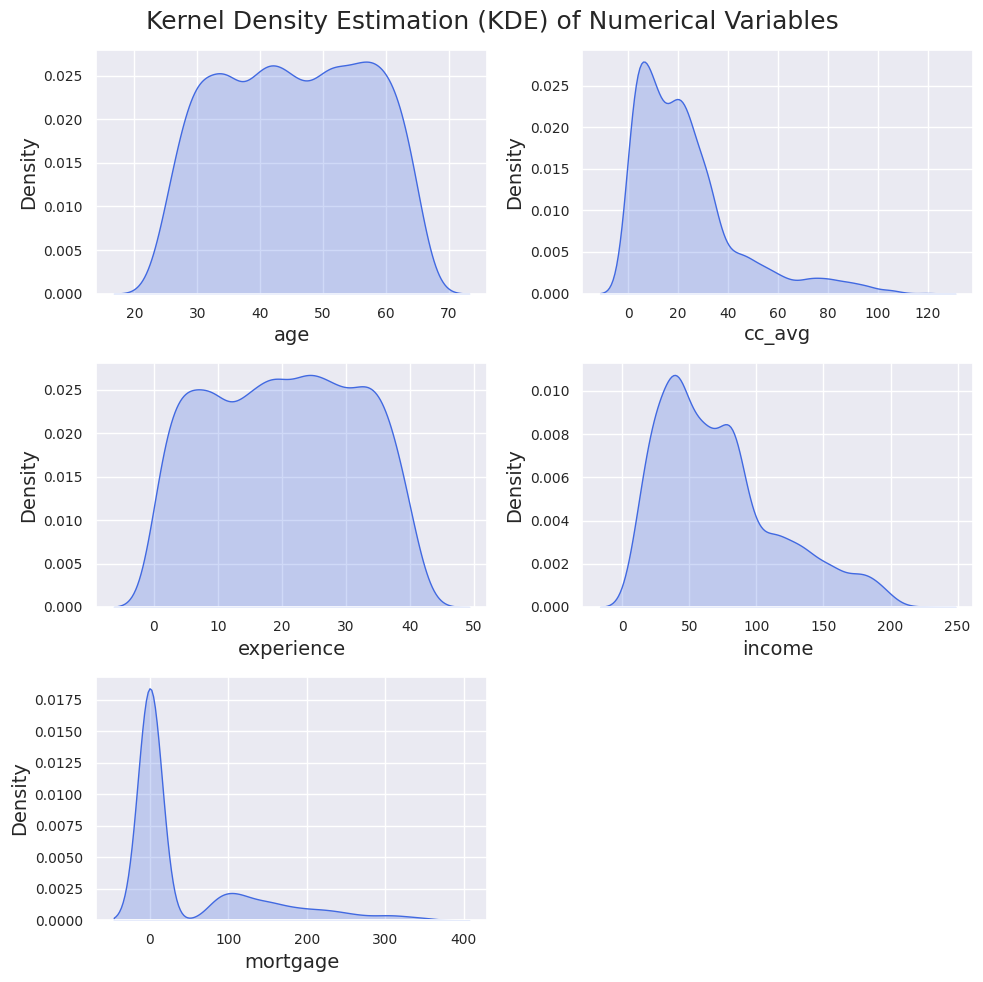

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.5)

for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df_copy[column], fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')

plt.suptitle('Kernel Density Estimation (KDE) of Numerical Variables', fontsize=18)
plt.tight_layout()
plt.show()

Kode ini digunakan untuk membuat grafik Kernel Density Estimation (KDE) terhadap variabel numerik dalam dataset `df_copy`. Grafik ini diatur dalam tata letak grid 3x2, dengan setiap subplot menampilkan distribusi satu variabel numerik. Setiap plot KDE menunjukkan kepadatan probabilitas dari variabel tersebut, dengan area di bawah kurva yang diisi untuk visualisasi yang lebih jelas. Judul utama "Kernel Density Estimation (KDE) of Numerical Variables" ditampilkan di atas, dan tata letak diperketat agar grafik lebih rapi.

Kesimpulan yang didapatkan berdasarkan plot tersebut yaitu sebagai berikut.

- 'age': Distribusi usia menunjukkan tiga puncak utama, menandakan tiga kelompok umur yang dominan dalam data. Usia berkisar antara 23 hingga 67 tahun dengan kepadatan tertinggi di sekitar 30-60 tahun.
- 'cc_avg': Distribusi pengeluaran kartu kredit bulanan rata-rata menunjukkan bahwa sebagian besar nilai berada di kisaran yang rendah (0-40). Ada penurunan tajam setelah 40, yang menunjukkan bahwa hanya sedikit individu yang memiliki pengeluaran kartu kredit yang tinggi.
- 'experience': Pengalaman kerja menunjukkan distribusi yang hampir seragam dengan beberapa puncak kecil. Pengalaman berkisar dari 0 hingga 43 tahun, dengan kepadatan tinggi antara 5 hingga 35 tahun.
- 'income': Distribusi pendapatan tahunan menunjukkan bahwa sebagian besar pendapatan berada di kisaran 8-100. Terdapat penurunan kepadatan yang stabil setelahnya, menunjukkan bahwa hanya sedikit individu yang memiliki pendapatan lebih tinggi dari 100.
- 'mortgage': Distribusi hipotek menunjukkan puncak tajam di dekat 0, menandakan banyak individu yang tidak memiliki hipotek atau hanya memiliki hipotek yang rendah. Kepadatan menurun tajam setelah 50, menunjukkan bahwa hipotek yang tinggi tidak umum dalam dataset ini.

# Analisis Bivariat

In [ ]:
target = 'personal_loan'
cat_vars = [col for col in categorical_cols if col not in ['personal_loan']]
num_vars = numerical_cols.tolist()

Kode berikut melakukan beberapa operasi untuk mengatur variabel target, serta menentukan variabel kategorikal dan numerik.

- `target = 'personal_loan'`: Menetapkan variabel target yang akan digunakan untuk analisis dan model prediktif, yaitu `'personal_loan'`.
- `cat_vars = [col for col in categorical_cols if col not in ['personal_loan']]`: Membuat daftar `cat_vars` yang berisi semua kolom dalam `categorical_cols` kecuali `'personal_loan'`. Hal ini dilakukan karena `'personal_loan'` adalah variabel target.
- `num_vars = numerical_cols.tolist()`: Mengonversi list `numerical_cols` menjadi list Python biasa dan menyimpannya dalam variabel `num_vars`. Hal ini bertujuan untuk memudahkan dalam loop atau operasi lainnya.


## Variabel Kategorikal

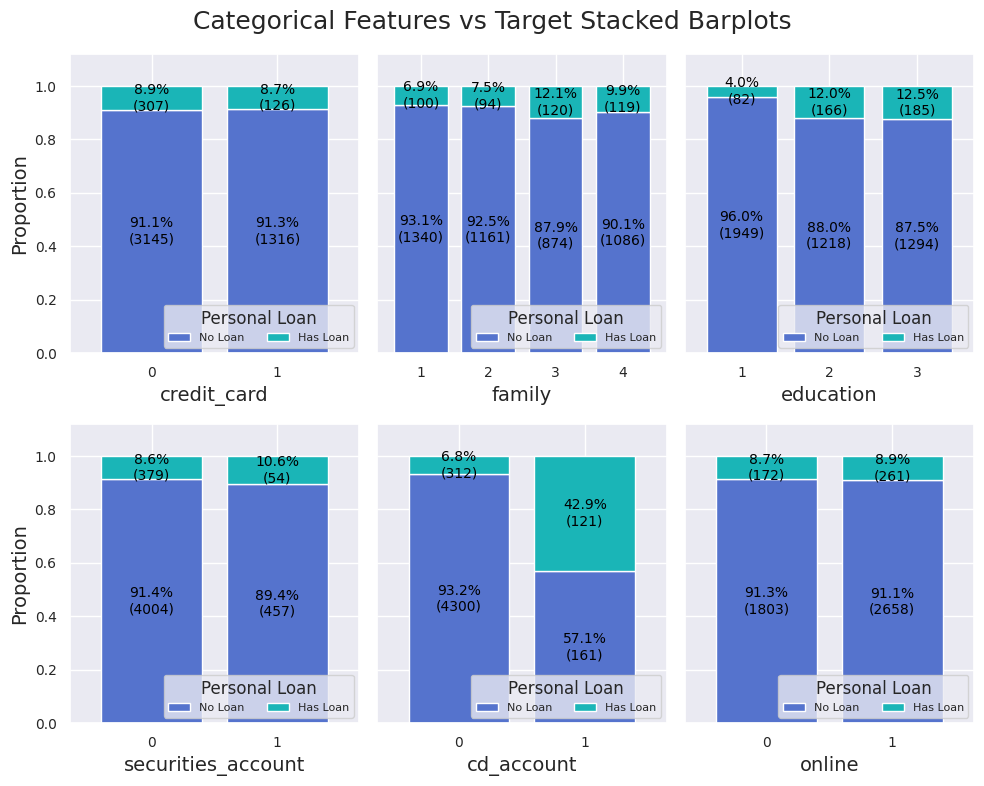

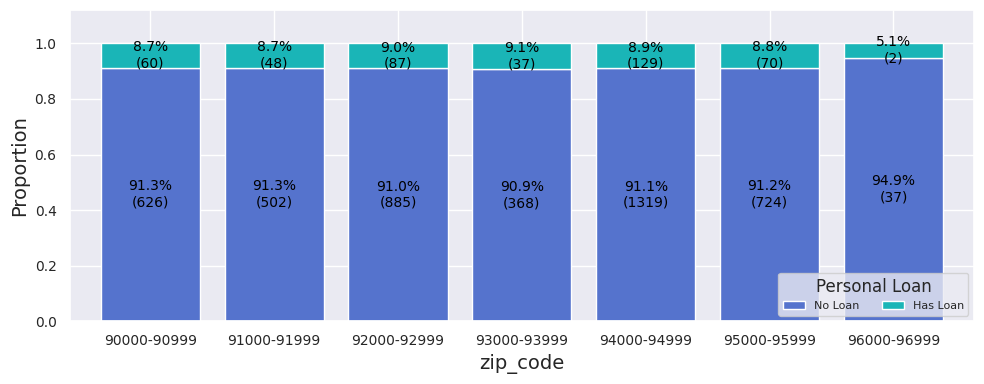

In [ ]:
cats_vars = [col for col in cat_vars if col not in ['zip_code']]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

for i, col in enumerate(cats_vars):
    # Buat tabulasi silang yang menunjukkan proporsi pinjaman yang dibeli dan yang tidak dibeli untuk setiap kategori fitur
    cross_tab = pd.crosstab(index=df_copy[col], columns=df_copy[target])

    # Menggunakan argumen normalize=True memberi kita proporsi data berdasarkan indeks
    cross_tab_prop = pd.crosstab(index=df_copy[col], columns=df_copy[target], normalize='index')

    # Plot diagram stacked bar
    x, y = i // 3, i % 3
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Tambahkan proporsi dan jumlah masing-masing batang ke plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx, y=(y_location - proportion) + (proportion / 2),
                          s=f'{np.round(proportion * 100, 1)}%\n({count})',
                          ha='center', va='center',
                          color="black", fontsize=10)

    ax[x, y].legend(['No Loan', 'Has Loan'], title='Personal Loan', fontsize=8, ncol=2, loc='lower right')
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=18)
plt.tight_layout()
plt.show()

# Plot variabel zip_code
df_copy['zip_group'] = pd.cut(df_copy['zip_code'], bins=bin_edges, labels=['90000-90999', '91000-91999', '92000-92999', '93000-93999', '94000-94999', '95000-95999', '96000-96999'])

cross_tab = pd.crosstab(index=df_copy['zip_group'], columns=df_copy['personal_loan'])
cross_tab_prop = pd.crosstab(index=df_copy['zip_group'], columns=df_copy['personal_loan'], normalize='index')

fig, ax = plt.subplots(figsize=(10, 4))
cross_tab_prop.plot(kind='bar', ax=ax, stacked=True, width=0.8, colormap=cmp,
                    legend=False, ylabel='Proportion', sharey=True)

for idx, val in enumerate(cross_tab.index.values):
    for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
        ax.text(x=idx, y=(y_location - proportion) + (proportion / 2),
                s=f'{np.round(proportion * 100, 1)}%\n({count})',
                ha='center', va='center',
                color="black", fontsize=10)

ax.set_xlabel('zip_code')
ax.legend(['No Loan', 'Has Loan'], title='Personal Loan', fontsize=8, ncol=2, loc='lower right')
ax.set_ylim([0, 1.12])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

df_copy = df_copy.drop(columns=['zip_group'])

Kode tersebut digunakan untuk membuat visualisasi hubungan antara fitur (variabel) kategorikal dan variabel target ('personal_loan') menggunakan diagram batang bertumpuk. Pertama, fitur kategorikal disaring untuk menghilangkan kolom `zip_code`. Diagram batang bertumpuk dibuat untuk setiap fitur kategorikal, menunjukkan proporsi pinjaman yang diambil dan tidak diambil dalam setiap kategori. Proporsi dihitung dengan tabulasi silang, yang kemudian dinormalisasi berdasarkan indeks. Pada setiap batang, proporsi dan jumlah ditambahkan sebagai teks. Grafik diberi legenda dan label, serta disusun dalam subplot 2x3. Kedua, variabel `zip_code` diubah menjadi kelompok menggunakan `pd.cut` dengan batas tertentu. Diagram batang bertumpuk dibuat untuk menunjukkan proporsi pinjaman di setiap kelompok `zip_code`. Sama seperti sebelumnya, proporsi dan jumlah ditambahkan ke setiap batang sebagai teks, dan grafik diatur dengan label dan legenda.

Kesimpulan yang didapatkan berdasarkan plot tersebut yaitu sebagai berikut.

- Nasabah yang menggunakan atau tidak menggunakan kartu kredit tampaknya tidak berpengaruh signifikan terhadap probabilitas pembelian pinjaman pribadi.
- Jumlah anggota keluarga tidak berpengaruh signifikan terhadap probabilitas pembelian pinjaman pribadi.
- Nasabah dengan tingkat pendidikan yang lebih tinggi lebih mungkin untuk membeli pinjaman pribadi.
- Nasabah yang memiliki atau tidak memiliki akun sekuritas di bank tampaknya tidak berpengaruh signifikan terhadap probabilitas pembelian pinjaman pribadi.
- Nasabah yang memiliki akun deposito berjangka di bank tampaknya lebih mungkin untuk membeli pinjaman pribadi.
- Nasabah yang menggunakan atau tidak menggunakan layanan perbankan online tidak berpengaruh terhadap probabilitas pembelian pinjaman pribadi.
- Kode pos tidak berpengaruh signifikan terhadap probabilitas pembelian pinjaman pribadi.

## Variabel Numerikal

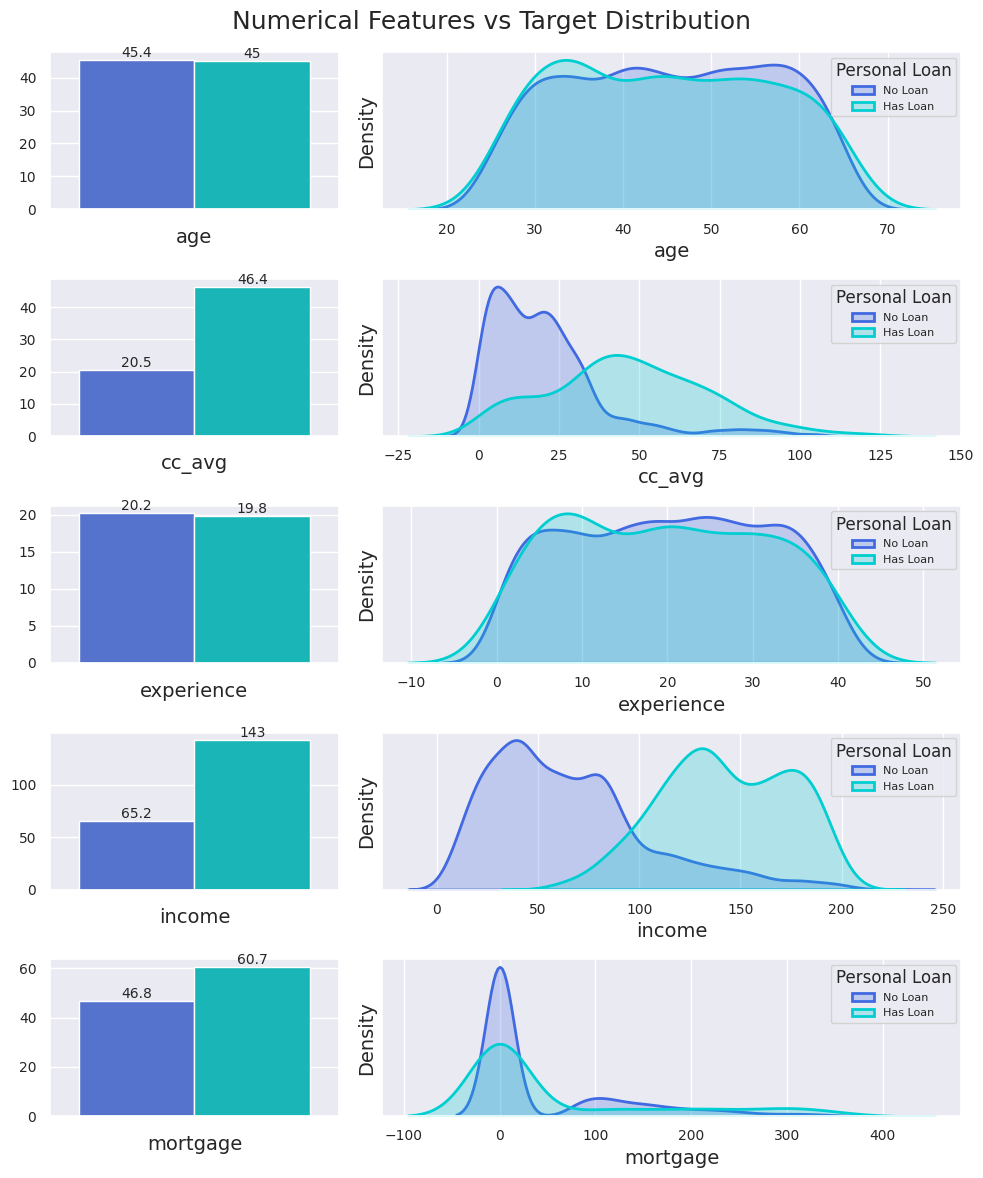

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(10,12), gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(num_vars):
    # Plot diagram batang
    graph = sns.barplot(data=df_copy, hue=target, y=col, ax=ax[i,0], legend=False, errorbar=None)
    ax[i, 0].set_xlabel(f'{col}')
    ax[i, 0].set_ylabel('')

    # Plot kde
    sns.kdeplot(data=df_copy[df_copy[target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df_copy[df_copy[target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(['No Loan', 'Has Loan'], title='Personal Loan', fontsize=8, loc='upper right')

    # Menambahkan ukuran batang ke plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g', fontsize=10)

plt.suptitle('Numerical Features vs Target Distribution', fontsize=18)
plt.tight_layout()
plt.show()

Kode tersebut digunakan untuk membuat visualisasi untuk membandingkan fitur numerik dengan variabel target ('personal_loan') menggunakan diagram batang dan plot KDE. Setiap fitur numerik diplot dalam dua kolom, kolom pertama adalah diagram batang yang memperlihatkan nilai rata-rata fitur tersebut untuk setiap kategori target (tanpa pinjaman dan dengan pinjaman), sementara kolom kedua adalah plot KDE yang menunjukkan distribusi probabilitas fitur untuk setiap kategori target. Diagram batang dilengkapi dengan anotasi yang menampilkan nilai numerik rata-rata dari setiap batang. Plot KDE memberikan gambaran tentang distribusi fitur untuk kategori target yang berbeda.

Kesimpulan yang didapatkan berdasarkan plot tersebut yaitu sebagai berikut.

- Dapat disimpulkan bahwa usia nasabah tidak memiliki pengaruh terhadap probabilitas pembelian pinjaman pribadi.
- Nasabah yang lebih banyak bertransaksi dengan kartu kredit lebih mungkin untuk membeli pinjaman pribadi.
- Pengaruh jumlah pengalaman kerja terhadap pembelian pinjaman pribadi serupa dengan pengaruh usia nasabah. Distribusi jumlah pengalaman kerja sangat mirip dengan distribusi usia, kemungkinan pengalaman kerja berkorelasi kuat dengan usia.
- Nasabah dengan pendapatan yang tinggi lebih mungkin untuk membeli pinjaman pribadi.
- Nasabah dengan nilai hipotek yang tinggi lebih mungkin untuk membeli pinjaman pribadi.

# Analisis Korelasi

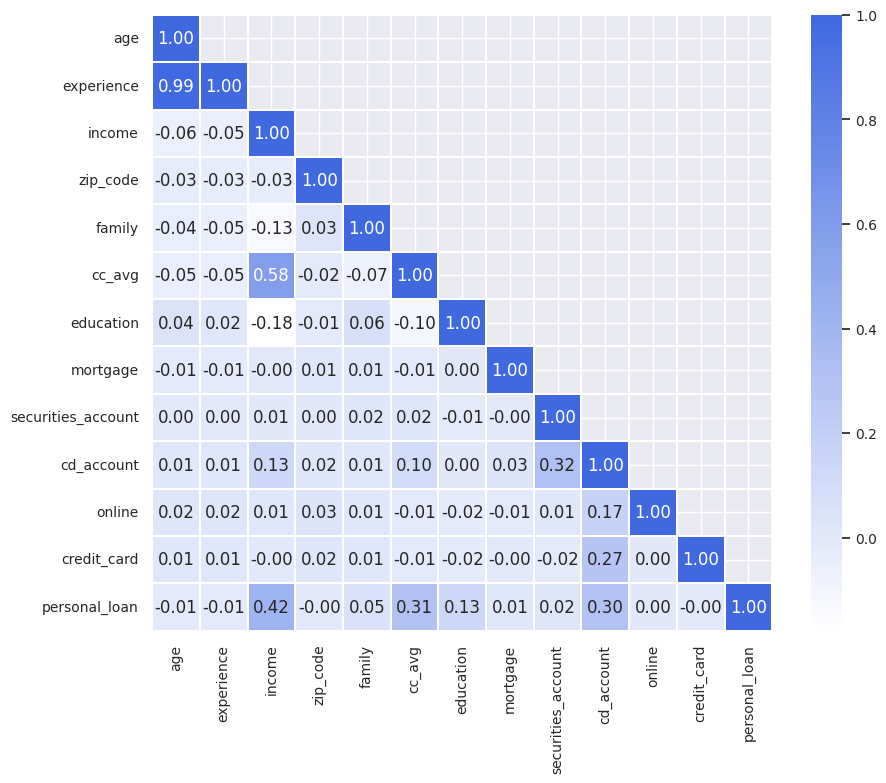

In [ ]:
# Perhitungan korelasi Spearman
df_ordered = pd.concat([df_copy.drop(target,axis=1), df_copy[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Buat sebuah mask agar nilai korelasi hanya muncul satu kali saja
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

royalblue = LinearSegmentedColormap.from_list('#5573cd', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

# Plot korelasi heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

Kode tersebut digunakan untuk menghitung dan memvisualisasikan matriks korelasi Spearman antar fitur-fitur dalam DataFrame `df_copy`. Pertama, DataFrame `df_copy` disalin dan kolom target dihapus sementara untuk menghasilkan `df_ordered`, yang kemudian digunakan untuk menghitung korelasi menggunakan metode Spearman. Dilakukan pembuatan sebuah masker agar hanya setengah bagian segitiga dari matriks korelasi yang ditampilkan. Heatmap korelasi kemudian diplot menggunakan seaborn (sns), dengan pengaturan warna menggunakan colormap "royalblue" yang di-reverse, serta menampilkan nilai korelasi sebagai anotasi dengan format dua angka desimal.

Kesimpulan yang didapatkan berdasarkan plot tersebut yaitu sebagai berikut.

- 'personal_loan' berkorelasi tinggi dengan 'income' (ρ = 0.42), 'cc_avg' (ρ = 0.31), dan 'cd_account' (ρ = 0.3).
- 'experience' berkorelasi tinggi dengan 'usia' (ρ = 0.99).
- 'cc_avg' berkorelasi tinggi dengan 'income' (ρ = 0.58).
- 'cd_account' berkorelasi tinggi dengan 'securities_account' (ρ = 0.32) dan 'credit_card' (ρ = 0.27).

## Penghapusan Kolom yang Memiliki Tingkat Korelasi Tinggi selain dengan Variabel Target

In [ ]:
df_copy.drop('experience', axis=1, inplace=True)
num_vars = [col for col in num_vars if col not in ['experience']]

Kode tersebut bertujuan untuk menghapus kolom 'experience' dari DataFrame `df_copy` karena berkorelasi kuat dengan kolom 'age', serta keduanya memiliki distribusi yang sangat mirip. Oleh karena itu, kolom 'experience' dihapus karena tidak memberikan informasi yang lebih banyak daripada kolom 'age'. Variabel `num_vars` juga disaring ulang dengan membuang 'experience' dari daftar kolom numerik yang ada, sehingga variabel `num_vars` hanya berisi kolom-kolom numerik selain 'experience'.

# Pengujian Hipotesis

In [ ]:
alpha = 0.05

Variabel `alpha` diinisialisasi dengan nilai 0.05, yang biasanya digunakan sebagai tingkat signifikansi dalam pengujian hipotesis statistik. Tingkat signifikansi ini menentukan batas probabilitas untuk menolak hipotesis nol (H0). Dalam konteks pengujian hipotesis, jika p-value hasil dari uji statistik lebih kecil dari `alpha` (0.05), maka hipotesis nol ditolak, yang menunjukkan bahwa hasil yang diamati signifikan secara statistik dan tidak mungkin terjadi secara kebetulan. Dengan `alpha` sebesar 0.05, ada toleransi kesalahan tipe I sebesar 5%, yaitu risiko menerima hipotesis alternatif padahal hipotesis nol sebenarnya benar.

## t-test

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam rata-rata di antara orang-orang yang mengambil pinjaman pribadi dan mereka yang tidak
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata di antara orang-orang yang mengambil pinjaman pribadi dan mereka yang tidak

results_t_test = []

# Lakukan t-test untuk setiap variabel numerik
for var in num_vars:
    if var == 'age':
        iv_label = 'usia'
    elif var == 'cc_avg':
        iv_label = 'pengeluaran kartu kredit'
    elif var == 'income':
        iv_label = 'pendapatan'
    elif var == 'mortgage':
        iv_label = 'hipotek'

    # Pisahkan data berdasarkan variabel dependen
    group1 = df_copy[df_copy['personal_loan'] == 0][var]
    group2 = df_copy[df_copy['personal_loan'] == 1][var]

    # Lakukan t-test independen
    t_stat, p_val = ttest_ind(group1, group2)

    # Tentukan kesimpulan berdasarkan nilai p
    if p_val < alpha:
        conclusion = f'Tolak H0: Terdapat perbedaan yang signifikan dalam rata-rata {iv_label} di antara orang-orang yang mengambil pinjaman pribadi dan mereka yang tidak'
    else:
        conclusion = f'Terima H0: Tidak terdapat perbedaan yang signifikan dalam rata-rata {iv_label} di antara orang-orang yang mengambil pinjaman pribadi dan mereka yang tidak'

    # Simpan hasil ke dalam list
    results_t_test.append({
        'Variabel Dependen': 'personal_loan',
        'Variabel Independen': var,
        't-statistic': t_stat,
        'p-value': p_val,
        'Kesimpulan': conclusion
    })

df_results_t_test = pd.DataFrame(results_t_test)
df_results_t_test

,Variabel Dependen,Variabel Independen,t-statistic,p-value,Kesimpulan
0,personal_loan,age,0.714909,4.746992e-01,Terima H0: Tidak terdapat perbedaan yang signi...
1,personal_loan,cc_avg,-26.861284,2.263664e-148,Tolak H0: Terdapat perbedaan yang signifikan d...
2,personal_loan,income,-39.573550,2.176467e-297,Tolak H0: Terdapat perbedaan yang signifikan d...
3,personal_loan,mortgage,-3.295775,9.884990e-04,Tolak H0: Terdapat perbedaan yang signifikan d...


Kode program tersebut melakukan uji t-independen (independent t-test) untuk setiap variabel numerik dalam dataset guna menentukan apakah terdapat perbedaan yang signifikan dalam rata-rata antara dua kelompok, yakni orang-orang yang mengambil pinjaman pribadi dan mereka yang tidak. Pertama, hipotesis nol (H0) menyatakan bahwa tidak ada perbedaan signifikan dalam rata-rata, sedangkan hipotesis alternatif (H1) menyatakan sebaliknya. Untuk setiap variabel numerik, data dikelompokkan berdasarkan status pinjaman pribadi (0 atau 1), kemudian dilakukan uji t-independen untuk menghitung nilai t-statistic dan p-value. Jika p-value lebih kecil dari tingkat signifikansi (alpha = 0.05), hipotesis nol ditolak, menyimpulkan bahwa terdapat perbedaan signifikan dalam rata-rata variabel tersebut di antara kedua kelompok.

Hasil dari uji t untuk setiap variabel, termasuk t-statistic, p-value, dan kesimpulan, disimpan dalam daftar dan kemudian dikonversi menjadi DataFrame untuk memudahkan analisis lebih lanjut. Secara keseluruhan, hasil ini menunjukkan bahwa kecuali untuk variabel usia, terdapat perbedaan yang signifikan dalam rata-rata pengeluaran kartu kredit, pendapatan, dan hipotek antara orang-orang yang mengambil pinjaman pribadi dan mereka yang tidak.

## Chi-square

In [ ]:
# Hipotesis nol (H0): Tidak terdapat hubungan yang signifikan antara variabel independen dan keputusan untuk mengambil pinjaman pribadi
# Hipotesis alternatif (H1): Terdapat hubungan yang signifikan antara variabel independen dan keputusan untuk mengambil pinjaman pribadi

results_chi2 = []

# Lakukan uji Chi-square untuk setiap variabel kategorikal
for var in cat_vars:
    if var == 'zip_code':
        iv_label = 'kode pos'
    elif var == 'family':
        iv_label = 'jumlah anggota keluarga'
    elif var == 'education':
        iv_label = 'tingkat pendidikan'
    elif var == 'securities_account':
        iv_label = 'memiliki akun sekuritas'
    elif var == 'cd_account':
        iv_label = 'memiliki akun deposito berjangka'
    elif var == 'online':
        iv_label = 'menggunakan perbankan online'
    elif var == 'credit_card':
        iv_label = 'memiliki kartu kredit'

    # Pisahkan data berdasarkan variabel dependen
    contingency_table = pd.crosstab(df_copy[var], df_copy['personal_loan'])

    # Lakukan uji Chi-square
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Tentukan kesimpulan berdasarkan nilai p
    alpha = 0.05
    if p_val < alpha:
        conclusion = f'Tolak H0: Terdapat hubungan yang signifikan antara {iv_label} dan keputusan untuk mengambil pinjaman pribadi'
    else:
        conclusion = f'Terima H0: Tidak terdapat hubungan yang signifikan antara {iv_label} dan keputusan untuk mengambil pinjaman pribadi'

    # Simpan hasil ke dalam list
    results_chi2.append({
        'Variabel Dependen': 'personal_loan',
        'Variabel Independen': var,
        'Chi-sq statistic': chi2_stat,
        'p-value': p_val,
        'Kesimpulan': conclusion
    })

# Buat DataFrame dari hasil uji Chi-square
df_results_chi2 = pd.DataFrame(results_chi2)

# Tampilkan DataFrame hasil uji Chi-square
df_results_chi2

,Variabel Dependen,Variabel Independen,Chi-sq statistic,p-value,Kesimpulan
0,personal_loan,credit_card,0.014271,9.049115e-01,Terima H0: Tidak terdapat hubungan yang signif...
1,personal_loan,family,23.731593,2.841951e-05,Tolak H0: Terdapat hubungan yang signifikan an...
2,personal_loan,education,99.838550,2.090905e-22,Tolak H0: Terdapat hubungan yang signifikan an...
3,personal_loan,securities_account,1.861555,1.724455e-01,Terima H0: Tidak terdapat hubungan yang signif...
4,personal_loan,cd_account,425.984161,1.216031e-94,Tolak H0: Terdapat hubungan yang signifikan an...
5,personal_loan,online,0.052791,8.182752e-01,Terima H0: Tidak terdapat hubungan yang signif...
6,personal_loan,zip_code,431.914619,8.620931e-01,Terima H0: Tidak terdapat hubungan yang signif...


Kode program tersebut melakukan uji Chi-square untuk memeriksa hubungan antara variabel-variabel kategorikal dan keputusan untuk mengambil pinjaman pribadi. Hipotesis nol (H0) menyatakan bahwa tidak terdapat hubungan yang signifikan antara variabel independen (kode pos, jumlah anggota keluarga, tingkat pendidikan, akun sekuritas, akun deposito berjangka, perbankan online, serta kartu kredit) dan keputusan untuk mengambil pinjaman pribadi. Hipotesis alternatif (H1) menyatakan bahwa terdapat hubungan yang signifikan antara variabel-variabel tersebut dan keputusan untuk mengambil pinjaman pribadi.

Untuk setiap variabel kategorikal, program membuat tabel kontingensi dan melakukan uji Chi-square. Berdasarkan nilai p (p-value) yang dihasilkan dari uji Chi-square, program menentukan apakah hipotesis nol dapat diterima atau harus ditolak. Jika nilai p kurang dari 0,05 (alpha), maka hipotesis nol ditolak, yang berarti terdapat hubungan yang signifikan antara variabel independen dan keputusan untuk mengambil pinjaman pribadi. Jika tidak, hipotesis nol diterima.

Hasil uji Chi-square disimpan dalam bentuk DataFrame dan menampilkan statistik Chi-square, nilai p, serta kesimpulan untuk setiap variabel independen. Hasilnya menunjukkan bahwa terdapat hubungan yang signifikan antara keputusan untuk mengambil pinjaman pribadi dengan variabel jumlah anggota keluarga, tingkat pendidikan, dan memiliki akun deposito berjangka. Namun, tidak terdapat hubungan yang signifikan dengan variabel memiliki kartu kredit, memiliki akun sekuritas, menggunakan perbankan online, dan kode pos.

## ANOVA

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam rata-rata pendapatan di antara kelompok variabel independen
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata pendapatan di antara kelompok variabel independen

cats_vars = ['zip_group', 'family', 'education']

results_welch_anova = []

df_copy['zip_group'] = pd.cut(df_copy['zip_code'], bins=bin_edges, labels=['90000-90999', '91000-91999', '92000-92999', '93000-93999', '94000-94999', '95000-95999', '96000-96999'])

# Lakukan Welch ANOVA untuk setiap variabel numerik dan kategorikal
for num_var in num_vars:
    if num_var == 'age':
        dv_label = 'usia'
    elif num_var == 'cc_avg':
        dv_label = 'pengeluaran kartu kredit'
    elif num_var == 'income':
        dv_label = 'pendapatan'
    elif num_var == 'mortgage':
        dv_label = 'hipotek'

    for cats_var in cats_vars:
        if cats_var == 'zip_group':
            iv_label = 'kode pos'
        elif cats_var == 'family':
            iv_label = 'jumlah anggota keluarga'
        elif cats_var == 'education':
            iv_label = 'pendidikan'

        # Lakukan Welch ANOVA
        anova_result = welch_anova(dv=num_var, between=cats_var, data=df_copy)

        if cats_var == 'zip_group':
            cats_var = 'zip_code'

        # Tentukan kesimpulan berdasarkan nilai p
        alpha = 0.05
        if anova_result['p-unc'][0] < alpha:
            conclusion = f'Tolak H0: Terdapat perbedaan yang signifikan dalam rata-rata {dv_label} di antara kelompok {iv_label}'
        else:
            conclusion = f'Terima H0: Tidak terdapat perbedaan yang signifikan dalam rata-rata {dv_label} di antara kelompok {iv_label}'

        # Simpan hasil ke dalam list
        results_welch_anova.append({
            'Variabel Dependen': num_var,
            'Variabel Independen': cats_var,
            'F-statistic': anova_result['F'][0],
            'p-value': anova_result['p-unc'][0],
            'Kesimpulan': conclusion
        })

df_copy = df_copy.drop(columns=['zip_group'])

# Buat dataframe dari hasil uji Welch ANOVA
df_results_welch_anova = pd.DataFrame(results_welch_anova)

# Tampilkan dataframe hasil uji Welch ANOVA
df_results_welch_anova

,Variabel Dependen,Variabel Independen,F-statistic,p-value,Kesimpulan
0,age,zip_code,1.164137,3.242017e-01,Terima H0: Tidak terdapat perbedaan yang signi...
1,age,family,7.633646,4.432674e-05,Tolak H0: Terdapat perbedaan yang signifikan d...
2,age,education,5.563532,3.874129e-03,Tolak H0: Terdapat perbedaan yang signifikan d...
3,cc_avg,zip_code,0.571268,7.533148e-01,Terima H0: Tidak terdapat perbedaan yang signi...
4,cc_avg,family,32.396423,1.458509e-20,Tolak H0: Terdapat perbedaan yang signifikan d...
5,cc_avg,education,58.779322,8.417316e-26,Tolak H0: Terdapat perbedaan yang signifikan d...
6,income,zip_code,0.945168,4.621584e-01,Terima H0: Tidak terdapat perbedaan yang signi...
7,income,family,60.589814,6.876289e-38,Tolak H0: Terdapat perbedaan yang signifikan d...
8,income,education,112.728990,5.034864e-48,Tolak H0: Terdapat perbedaan yang signifikan d...
9,mortgage,zip_code,0.352695,9.083197e-01,Terima H0: Tidak terdapat perbedaan yang signi...


Kode tersebut melakukan uji Welch ANOVA untuk menentukan apakah terdapat perbedaan yang signifikan dalam rata-rata pendapatan di antara kelompok variabel independen, yang meliputi 'zip_group', 'family', dan 'education'. Hipotesis nol (H0) menyatakan bahwa tidak ada perbedaan yang signifikan, sementara hipotesis alternatif (H1) menyatakan bahwa ada perbedaan yang signifikan. Pertama, data 'zip_code' dikelompokkan menjadi 'zip_group'. Kemudian, untuk setiap kombinasi variabel numerik (seperti 'age', 'cc_avg', 'income', dan 'mortgage') dan variabel kategorikal ('zip_group', 'family', dan 'education'), dilakukan uji Welch ANOVA. Berdasarkan nilai p, kesimpulan dibuat apakah menolak atau menerima H0. Hasil uji disimpan dalam sebuah list dan kemudian diubah menjadi dataframe untuk ditampilkan. Terakhir, kolom 'zip_group' dihapus dari dataframe utama untuk mengembalikan data ke bentuk semula.

Berdasarkan output uji Welch ANOVA, kita dapat menyimpulkan bahwa terdapat perbedaan signifikan dalam rata-rata beberapa variabel numerik di antara kelompok variabel independen tertentu. Untuk variabel 'age', terdapat perbedaan signifikan berdasarkan jumlah anggota keluarga dan tingkat pendidikan, tetapi tidak ada perbedaan signifikan berdasarkan kode pos. Untuk 'cc_avg', terdapat perbedaan signifikan berdasarkan jumlah anggota keluarga dan tingkat pendidikan, namun tidak ada perbedaan signifikan berdasarkan kode pos. Untuk 'income', terdapat perbedaan signifikan berdasarkan jumlah anggota keluarga dan tingkat pendidikan, tetapi tidak ada perbedaan signifikan berdasarkan kode pos. Sementara itu, untuk 'mortgage', tidak ada perbedaan signifikan dalam rata-rata di antara semua kelompok variabel independen yang diuji (kode pos, jumlah anggota keluarga, dan tingkat pendidikan). Dengan demikian, beberapa variabel independen seperti jumlah anggota keluarga dan tingkat pendidikan menunjukkan pengaruh yang signifikan terhadap beberapa variabel numerik tertentu, sementara kode pos tidak menunjukkan pengaruh yang signifikan.

# Klasifikasi untuk Memprediksi Kemungkinan Nasabah akan Membeli Pinjaman Pribadi

## Train Test Split

In [ ]:
X = df_copy.drop('personal_loan', axis=1)
y = df_copy['personal_loan']

Kode tersebut bertujuan untuk memisahkan dataset menjadi variabel independen atau fitur (X) dan variabel dependen atau target (y). Variabel X berisi semua fitur atau kolom dalam dataset kecuali kolom 'personal_loan', yang dihapus menggunakan metode `drop`. Variabel y berisi nilai target yang merupakan kolom 'personal_loan'. Dengan demikian, X mewakili fitur yang akan digunakan sebagai input untuk model prediksi, sedangkan y adalah label atau output yang ingin diprediksi oleh model. Ini adalah langkah awal dalam persiapan data untuk analisis lebih lanjut dalam pelatihan model supervised machine learning.


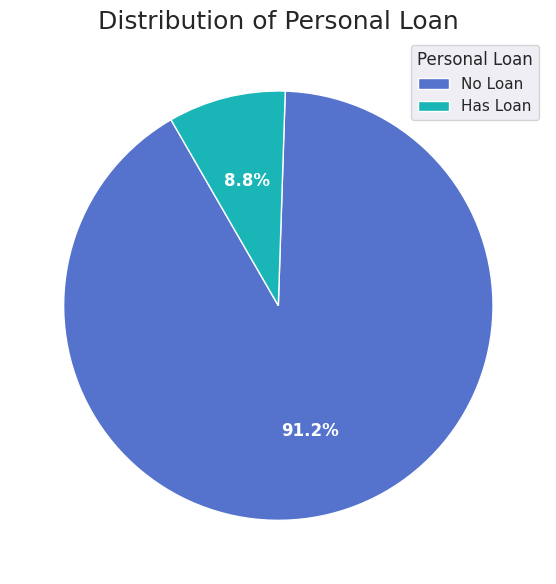

In [ ]:
loan_counts = df_copy['personal_loan'].value_counts(normalize=True)
loan_percentages = loan_counts / loan_counts.sum() * 100

# Plot diagram lingkaran
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    loan_counts,
    labels=loan_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    textprops=dict(color="w"),
    colors=cmp.colors
)

ax.legend(wedges, ['No Loan', 'Has Loan'], title="Personal Loan", loc="upper right")
plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Distribution of Personal Loan")
plt.tight_layout()
plt.show()

Kode tersebut digunakan untuk memvisualisasikan distribusi pinjaman pribadi dalam dataset. Berdasarkan visualisasi tersebut, proporsi antara nasabah yang memiliki pinjaman pribadi dan yang tidak, ternyata tidak seimbang. Sehingga dataset tersebut adalah dataset yang tidak seimbang.

Dataset yang tidak seimbang adalah dataset di mana kelas-kelasnya tidak seimbang atau tidak sama. Ini berarti ada jumlah sampel yang tidak seimbang dari masing-masing kelas target, dan beberapa kelas mungkin memiliki jumlah sampel yang jauh lebih banyak dari yang lain.

Permasahalan dengan dataset yang tidak seimbang yaitu sebagai berikut.
- Dataset yang tidak seimbang dapat menyebabkan algoritma cenderung memihak kelas mayoritas. Hal ini berarti bahwa algoritma klasifikasi yang dilatih pada dataset yang tidak seimbang sering kali akan salah mengklasifikasikan kelas minoritas sebagai kelas mayoritas.
- Kinerja model machine learning dapat sangat terpengaruh saat diberikan data yang tidak seimbang. Sebagai contoh, dataset kita memiliki 91,2% kelas 0 dan 8,8% kelas 1, maka model pembelajaran dapat dengan mudah dioptimalkan untuk hanya memprediksi semua input uji sebagai milik kelas 0 dan masih mendapatkan akurasi sebesar 91,2%.
- Jika model dilatih dengan data yang sangat tidak seimbang, dapat berkembang pemahaman yang salah tentang tren-tren yang mendasarinya. Model mungkin tidak mampu mengenali bagaimana nilai-nilai tertentu didistribusikan di antara berbagai kelas atau bahkan bagaimana kelas-kelas tertentu tumpang tindih satu sama lain.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Pada kode tersebut, digunakan fungsi `train_test_split` dari library scikit-learn untuk membagi dataset menjadi empat bagian, yaitu `X_train`, `X_test`, `y_train`, dan `y_test`. Variabel `X` merupakan fitur-fitur dari dataset yang ingin dilatih, sedangkan `y` adalah label atau target yang ingin diprediksi. Parameter `test_size=0.2` menentukan proporsi data yang akan digunakan sebagai data uji, dalam hal ini 20% dari total dataset. `random_state=0` digunakan untuk menetapkan seed untuk pengacakan agar hasil pemisahan dapat direproduksi dengan konsisten. `stratify=y` memastikan bahwa pemisahan dilakukan secara stratified, artinya proporsi kelas di dataset awal akan dipertahankan dalam set data latih dan uji untuk menghindari bias.

Stratifikasi adalah langkah penting dalam membagi dataset tidak seimbang menjadi set data latih dan uji. Stratifikasi memastikan bahwa proporsi dari setiap kelas tetap sama di kedua set data latih dan uji. Hal ini penting karena memungkinkan evaluasi model yang lebih akurat, menghindari bias karena ketidakproporsionalan salah satu kelas yang terlalu banyak diwakili dalam salah satu dataset. Pengambilan sampel secara stratifikasi juga memastikan bahwa tren atau korelasi apa pun di antara berbagai kelas yang ada dalam dataset keseluruhan tetap terjaga setelah dibagi menjadi dataset latih dan uji.

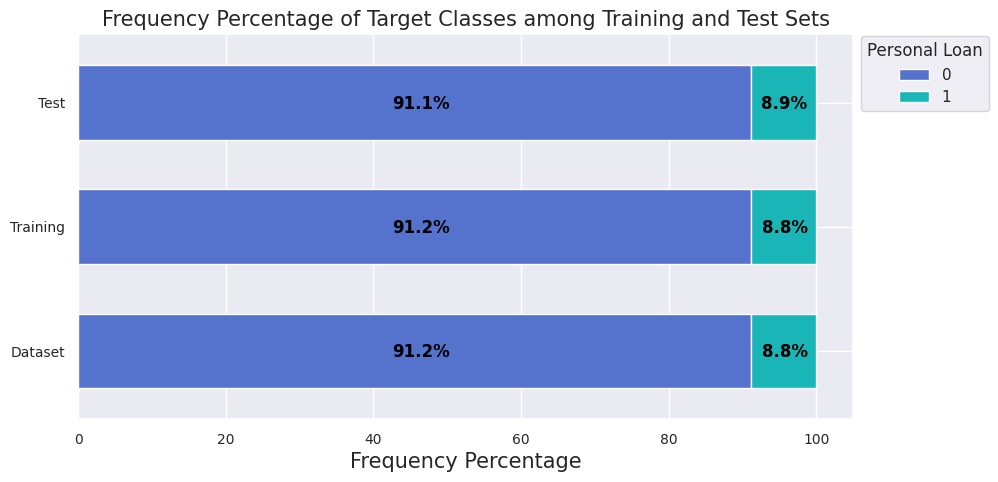

In [ ]:
# Tentukan dataframe yang berisi persentase frekuensi data
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot persentase frekuensi dalam bentuk diagram batang
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6, colormap=cmp)

# Tambahkan persentase ke plot kita
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

Kode di atas digunakan untuk menghitung dan memvisualisasikan persentase frekuensi kelas target dalam dataset, dataset latih (training), dan dataset uji (test). Berdasarkan visualisasi tersebut, sampel-sampel sudah dibagi secara acak sedemikian rupa berkat stratifikasi sehingga proporsi dari setiap kelas tetap sama di antara kedua dataset latih dan uji.

## Pemilihan Fitur

Pemilihan fitur (feature selection) adalah proses memilih subset fitur yang relevan untuk digunakan dalam pembangunan model. Keunggulan dari pemilihan fitur yaitu sebagai berikut.

- Peningkatan Akurasi: Dengan adanya lebih sedikit fitur, model memiliki lebih sedikit aspek yang perlu dipelajari, yang dapat mengurangi kesalahan saat memprediksi data baru.
- Meningkatkan Interpretabilitas: Pemilihan fitur membantu mengidentifikasi fitur-fitur penting dan membuat model lebih mudah diinterpretasikan dengan menghapus fitur-fitur yang redundan atau tidak relevan dari dataset.
- Waktu Pelatihan Lebih Cepat: Pemilihan fitur mengurangi biaya komputasi dengan mengurangi jumlah perhitungan yang perlu dilakukan untuk melatih dan menguji model. Hal ini mengurangi waktu pelatihan dan membuat model lebih efisien.
- Mengurangi Overfitting: Dengan menghilangkan fitur-fitur yang tidak relevan dan redundan dari data, pemilihan fitur juga membantu mengurangi overfitting yang bisa terjadi ketika terlalu banyak variabel yang dimasukkan ke dalam model tanpa observasi yang memadai atau teknik regularisasi yang diterapkan.

Salah satu metode pemilihan fitur yaitu metode Drop-column Feature Importance, yakni sebuah metode dimana dilakukan perhitungan kinerja model dengan menggunakan semua prediktor dan kemudian menghapus satu prediktor untuk melihat penurunan kinerja yang terjadi. Semakin penting fitur tersebut, semakin besar penurunan yang terjadi dalam kinerja model. Metode ini tidak mencerminkan nilai prediktif intrinsik suatu fitur secara mandiri tetapi seberapa penting fitur ini untuk model tertentu. Digunakannya metode ini untuk menghitung tingkat kepentingan fitur karena ini merupakan cara yang paling akurat untuk menghitung tingkat kepentingan fitur.

### Implementasi Metode Drop-column Feature Importance

In [ ]:
# Menentukan fungsi penilaian
def f1_metric(model, X_train, y_train):
    return f1_score(y_train, model.predict(X_train), average='binary')

Kode tersebut digunakan untuk mendefinisikan sebuah fungsi bernama `f1_metric` yang menghitung F1-score dari model yang diberikan, menggunakan data training (`X_train` dan `y_train`). F1-score adalah ukuran yang menggabungkan presisi dan recall untuk mengevaluasi performa model klasifikasi biner. F1-score untuk kelas '1' merupakan metrik prioritas utama dalam proyek ini.

In [ ]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # Buat daftar yang berisi fitur-fitur penting
    importances = []
    # Mengkloning model
    model_clone = clone(model)
    # Atur random_state untuk perbandingan
    model_clone.random_state = random_state
    # Melatih model
    model_clone.fit(X_train, y_train)
    # Membuat objek validasi silang menggunakan StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Menilai tolak ukur model menggunakan validasi silang
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()


    # Mengulangi untuk semua fitur dan menyimpan fitur yang penting
    for col in X_train.columns:
        # Mengkloning model
        model_clone = clone(model)
        # Atur random_state untuk perbandingan
        model_clone.random_state = random_state
        # Melatih model pada dataset dengan satu fitur yang dihapus
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Nilai fitur yang dihapus
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Menyimpan tingkat kepentingan fitur yang didefinisikan sebagai perbedaan antara skor benchmark dan skor model baru
        importances.append(benchmark_score - drop_column_score)

    # Kembalikan fitur-fitur beserta tingkat kepentingannya dalam bentuk dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)

    return importances_df

Fungsi `drop_column_importance` digunakan untuk mengevaluasi pentingnya setiap fitur dalam model dengan metode Drop-column Feature Importance. Proses dimulai dengan mengkloning model yang diberikan, lalu melatihnya pada dataset pelatihan. Fungsi ini memanfaatkan validasi silang (StratifiedKFold) untuk membantu proses perhitungan skor F1 sebagai ukuran kinerja model. Selanjutnya, untuk setiap fitur dalam dataset, model dikloning lagi untuk mengevaluasi pengaruh penghapusan fitur tersebut terhadap kinerja model. Perbedaan antara skor benchmark (model dengan semua fitur) dan skor setiap model dengan fitur yang dihapus akan menentukan tingkat pentingnya fitur tersebut. Hasilnya disusun dalam dataframe yang menampilkan fitur-fitur beserta tingkat kepentingannya, diurutkan dari yang paling penting ke yang paling rendah.

Membuat salinan dari sebuah model bisa berguna untuk menciptakan beberapa versi dari model yang sama. Dengan cara ini, berbagai versi model dapat diuji dengan berbagai parameter atau dataset. Hal ini memungkinkan evaluasi yang lebih mendalam dan akurat terhadap model sehingga satu versi tidak terlalu bias terhadap versi sebelumnya. Selain itu, mungkin perlu untuk mengetahui bagaimana parameter yang sedikit berbeda memengaruhi kinerja suatu model. Membuat salinan dari model memungkinkan kita untuk melakukan ini dengan cepat dan mudah dengan menghasilkan beberapa model dan mengujinya secara berdampingan.

In [ ]:
def drop_column_importance_plot(model, X_train, y_train):
    # Panggil fungsi drop_column_importance
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Mengganti nama kolom
    df_drop_column.columns = ['Feature', 'Feature Importance']

    # Plot diagram batang
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance')
    plt.show()

Fungsi `drop_column_importance_plot` digunakan untuk menghasilkan plot diagram batang yang menampilkan tingkat kepentingan setiap fitur menggunakan metode Drop-column Feature Importance. Pertama, fungsi memanggil fungsi `drop_column_importance` untuk menghitung kepentingan fitur-fitur dalam model. Dataframe yang dihasilkan dari fungsi tersebut kemudian dimodifikasi nama kolomnya menjadi 'Feature' dan 'Feature Importance'. Selanjutnya, menggunakan seaborn, fungsi ini memplot diagram batang horizontal yang menampilkan tingkat kepentingan setiap fitur dalam model. Diagram ini membantu visualisasi untuk memahami kontribusi masing-masing fitur terhadap kinerja model.

## Penyetelan Hyperparameter

Penyetelan (tuning) hyperparameter adalah langkah yang penting dalam membangun model machine learning yang baik, karena memungkinkan kita untuk mengeksplorasi berbagai konfigurasi model untuk mencapai performa yang optimal sesuai dengan tujuan dan karakteristik data yang ada. Hyperparameter adalah parameter yang tidak dipelajari secara langsung oleh model selama pelatihan, tetapi mempengaruhi kinerja dan perilaku model.



In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    # Buat objek validasi silang menggunakan StratifiedKFold untuk memastikan distribusi kelas sama di semua bagian lipatan
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

    # Buat objek GridSearchCV
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1, error_score='raise')

    # Sesuaikan objek GridSearchCV dengan data pelatihan
    clf_grid.fit(X_train, y_train)

    # Dapatkan hyperparameter terbaik
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Mengembalikan atribut best_estimator_ yang memberi kita model terbaik yang telah disesuaikan dengan data pelatihan
    return clf_grid.best_estimator_

Fungsi `tune_clf_hyperparameters` mengoptimalkan hyperparameter dengan menjelajahi kisi-kisi (grid) hyperparameter yang telah ditentukan sebelumnya. Hyperparameter grid merujuk pada kumpulan hyperparameter yang telah ditentukan sebelumnya untuk diuji dalam proses pelatihan model. Setiap kombinasi hyperparameter merupakan satu titik tunggal dalam grid, dan tujuannya adalah memilih hyperparameter terbaik untuk model dengan mengevaluasi kinerja model pada set validasi. Grid ini mendefinisikan ruang pencarian untuk algoritma optimisasi hyperparameter dalam menemukan hyperparameter optimal. Dengan menggunakan GridSearchCV dan validasi silang (StratifiedKFold), fungsi ini mengevaluasi berbagai kombinasi hyperparameter dengan memilih yang memiliki nilai f1-score tertinggi. Hasilnya adalah konfigurasi terbaik dengan hyperparameter yang optimal untuk digunakan dalam membangun model machine learning.

## Evaluasi Model

Dalam mengevaluasi model pada dataset yang tidak seimbang, pendekatan yang digunakan adalah menggunakan metrik yang lebih sesuai seperti recall, precision, F1 score, dan AUC (Area Under Curve), yang lebih cocok daripada metrik akurasi tradisional yang tidak mempertimbangkan ketidakseimbangan kelas secara otomatis.

Pada proyek ini, tujuan utamanya adalah mengklasifikasikan calon nasabah yang cenderung lebih memilih pinjaman pribadi. Metrik-metrik yang digunakan untuk mengevaluasi kinerja model sangat penting untuk menilai seberapa baik model dapat mengidentifikasi calon nasabah tersebut.

- Recall mengukur proporsi kasus positif sebenarnya yang berhasil diidentifikasi oleh model. Skor recall yang tinggi menandakan model memiliki sedikit false negative, yang berarti model tidak melewatkan banyak calon nasabah potensial.
- Precision mengukur proporsi kasus positif yang diidentifikasi oleh model yang sebenarnya positif. Skor precision yang tinggi menunjukkan model memiliki sedikit false positive, yang berarti model tidak mengidentifikasi banyak nasabah non-peminjam sebagai calon nasabah pinjaman.
- F1-score adalah rata-rata harmonik (harmonic mean) dari recall dan precision, yang menunjukkan keseimbangan antara kedua metrik tersebut. F1-score yang tinggi menunjukkan model dapat secara efektif mengidentifikasi calon nasabah pinjaman dengan meminimalkan false positive dan false negative.

Untuk proyek ini, baik recall maupun precision untuk kelas '1' adalah metrik yang krusial, sehingga f1-score untuk kelas '1' yang dijadikan metrik prioritas utama. F1-score yang tinggi mencerminkan keseimbangan yang baik antara mengidentifikasi calon nasabah pinjaman sebanyak mungkin (recall tinggi) dan memastikan prediksi yang akurat (precision tinggi). Ini sangat penting bagi bank karena bertujuan untuk meningkatkan konversi dari nasabah simpanan menjadi peminjam, sambil menghemat sumber daya lainnya.

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    Fungsi ini menghitung semua metrik performa yang diinginkan untuk model
    yang diberikan pada data uji.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

Fungsi `metrics_calculator` digunakan untuk menghitung berbagai metrik kinerja model yang diberikan terhadap data uji. Metrik-metrik tersebut meliputi akurasi (accuracy), presisi (precision), recall, F1-score, dan Area Under Curve (AUC) dari kurva ROC. Fungsi ini menerima model yang telah dilatih (`clf`), data uji (`X_test` dan `y_test`), serta nama model (`model_name`) sebagai input. Setelah memprediksi hasil dengan model terhadap data uji, fungsi mengembalikan hasil dalam bentuk dataframe yang menampilkan metrik-metrik tersebut dalam persentase untuk model yang diberikan.

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    Fungsi ini memberikan laporan lengkap mengenai kinerja model termasuk
    laporan klasifikasi, confusion matrix, dan kurva ROC.
    '''
    sns.set(font_scale=1.2)

    # Buat laporan klasifikasi untuk set pelatihan
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Buat laporan klasifikasi untuk set pengujian
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Buat gambar dan subplot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 2, 1]})

    # Plot confusion matrix untuk set pengujian
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot kurva ROC untuk data uji dan tampilkan skor AUC
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2, color='#5573cd')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Melaporkan hasil untuk kelas yang ditentukan oleh label positif
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    ax3.axis('tight')
    ax3.axis('off')
    table.scale(1, 1.5)

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#5573cd')
            cell.set_text_props(color='white')
            cell.set_text_props(ha='center')

        cell.set_fontsize(12)
        cell.set_text_props(va='center')

    plt.tight_layout()
    plt.show()

Fungsi `model_evaluation` digunakan untuk melakukan evaluasi lengkap terhadap kinerja model klasifikasi. Fungsi ini menerima model yang telah dilatih (`clf`), serta data latih (`X_train` dan `y_train`) dan data uji (`X_test` dan `y_test`) sebagai input. Pertama, fungsi menghasilkan laporan klasifikasi untuk kedua set data tersebut menggunakan `classification_report`, yang mencakup presisi, recall, dan F1-score. Selanjutnya, fungsi menghasilkan visualisasi berupa confusion matrix untuk data uji, kurva ROC dengan nilai AUC, dan tabel yang menampilkan metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC dalam bentuk tabel. Visualisasi ini membantu dalam memahami seberapa baik model mengklasifikasikan data uji serta memberikan wawasan tentang kinerja model secara keseluruhan.

## Sebelum Proses PCA

PCA (Principal Component Analysis) adalah sebuah teknik dalam analisis statistik yang digunakan untuk mereduksi dimensi dari dataset yang kompleks. Tujuan utamanya adalah untuk mengidentifikasi pola atau struktur yang terdapat dalam data dengan mengurangi jumlah variabel yang digunakan untuk menjelaskan variasi dalam data tersebut.

PCA mereduksi dimensi dari dataset dengan mentransformasi variabel asli ke dalam komponen utama yang baru. Komponen-komponen ini adalah kombinasi linear dari variabel asli yang menangkap sebanyak mungkin variasi dalam data.

PCA sering digunakan untuk eksplorasi data, visualisasi data, serta sebagai langkah pra-pemrosesan sebelum membangun model pembelajaran mesin. Dengan mereduksi dimensi, PCA juga dapat membantu dalam mempercepat waktu komputasi dalam analisis data besar, dan memungkinkan interpretasi yang lebih baik terhadap struktur data.

Salah satu kelemahan utama PCA adalah bahwa komponen utama yang dihasilkan mungkin sulit untuk diinterpretasikan secara langsung dalam konteks variabel asli.

Dalam proyek ini akan dilakukan perbandingan antara performa model klasifikasi (Decision Tree dan Random Forest) sebelum proses PCA dan setelah proses PCA.

### Decision Tree

In [ ]:
# Bobot yang terkait dengan kelas
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Menentukan kisi-kisi hyperparameter
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights}

Kode tersebut bertujuan untuk menentukan kisi-kisi hyperparameter yang akan digunakan dalam proses optimasi model Decision Tree. Terdapat beberapa hyperparameter yang diuji dalam kisi-kisi, yaitu sebagai berikut.

- 'criterion': Merupakan kriteria yang digunakan untuk mengukur kualitas pemisahan pada setiap node dalam pohon keputusan. Pilihan umum untuk parameter ini adalah 'gini', 'entropy', atau 'log_loss'. 'Gini' mengukur ketidakmurnian dari himpunan data, 'entropy' mengukur ketidakpastian, dan 'log_loss' mengukur kehilangan logaritmik.
- 'max_depth': Parameter ini mengatur kedalaman maksimum dari pohon keputusan. Semakin dalam pohon, semakin kompleks modelnya, yang dapat mengarah pada overfitting jika tidak diatur dengan benar.
- 'min_samples_split': Menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal. Nilai yang lebih tinggi dapat mengarah pada pohon yang lebih konservatif dan mengurangi kompleksitas model.
- 'min_samples_leaf': Menentukan jumlah minimum sampel yang diperlukan untuk membentuk leaf node di pohon. Nilai yang lebih tinggi dapat mengurangi overfitting dengan memastikan setiap leaf node mewakili lebih banyak sampel.
- 'max_features': Parameter ini menentukan jumlah fitur yang dipertimbangkan saat mencari pemisahan terbaik. 'None' berarti mempertimbangkan semua fitur, 'sqrt' berarti mempertimbangkan akar kuadrat dari jumlah fitur, dan 'log2' mempertimbangkan logaritma basis 2 dari jumlah fitur.
- 'class_weight': Bobot kelas adalah cara untuk menangani ketidakseimbangan kelas dalam data. Dalam konteks ini, kita menggunakan berbagai bobot kelas yang bervariasi dari 0.001 hingga 1.0 untuk kelas mayoritas (0) dan kelas minoritas (1). Bobot ini mempengaruhi bagaimana model menangani kesalahan prediksi pada setiap kelas, sehingga dapat meningkatkan kinerja pada kelas minoritas dengan memberikan lebih banyak bobot atau perhatian pada kelas tersebut selama pelatihan model.

Kombinasi parameter-parameter ini akan diuji menggunakan kisi-kisi hiperparameter (param_grid) untuk mencari kombinasi yang optimal yang menghasilkan kinerja terbaik dari model yang dibangun, yang dievaluasi berdasarkan metrik performa seperti F1-score atau AUC pada validasi silang.


In [ ]:
# Lakukan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Buat objek Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.6319473684210526, 1: 0.3680526315789474}, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 2}


Kode tersebut menjelaskan proses untuk membangun model Decision Tree Classifier dengan menggunakan teknik train-test split untuk membagi data menjadi data pelatihan dan data uji. Selanjutnya, model Decision Tree Classifier dibuat dengan pengaturan default, kemudian dilakukan penyetelan hyperparameter menggunakan GridSearchCV untuk mencari kombinasi hyperparameter yang optimal. Hasilnya menunjukkan kombinasi hyperparameter terbaik yang ditemukan, yaitu kriteria pemilihan fitur ('gini'), kedalaman maksimum ('max_depth' = 5), jumlah fitur maksimum ('max_features' = None), jumlah sampel minimum di leaf ('min_samples_leaf' = 9), jumlah sampel minimum untuk membagi node internal ('min_samples_split' = 2), dan bobot kelas ('class_weight' = {0: 0.63, 1: 0.37}). Penyetelan ini bertujuan untuk meningkatkan kinerja model dengan menyesuaikan parameter-parameter tersebut berdasarkan metrik performa seperti F1-score.

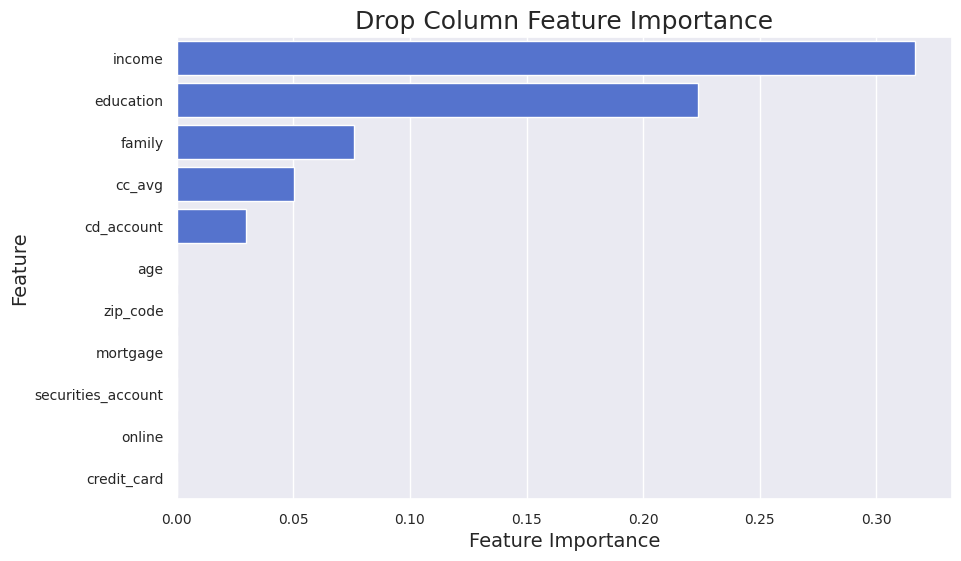

In [ ]:
drop_column_importance_plot(dt_opt, X_train, y_train)

Fungsi `drop_column_importance_plot` digunakan untuk mengevaluasi tingkat kepentingan fitur-fitur dalam model Decision Tree Classifier yang telah dioptimalkan (`dt_opt`). Prosesnya melibatkan penghitungan pengaruh penghapusan masing-masing fitur terhadap performa keseluruhan model. Hasilnya direpresentasikan dalam bentuk diagram batang horizontal yang menunjukkan tingkat kepentingan relatif dari setiap fitur terhadap prediksi model. Tujuannya adalah untuk membantu pemahaman tentang kontribusi relatif setiap fitur terhadap keakuratan prediksi model Decision Tree yang telah dioptimalkan.

In [ ]:
# Temukan fitur penting dengan nilai feature_importance positif
feature_importances = drop_column_importance(dt_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Menyaring dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Dalam kode tersebut, kita menggunakan model Decision Tree Classifier yang telah dioptimalkan (`dt_opt`) untuk menemukan fitur-fitur yang dianggap penting. Pertama, kita menghitung pengaruh penghapusan masing-masing fitur terhadap kinerja model dengan nilai feature_importance yang positif. Fitur-fitur yang memiliki pengaruh di atas ambang batas tertentu (0.01 dalam kasus ini) disimpan dalam variabel `selected_features`. Selanjutnya, dataset pelatihan (`X_train`) dan dataset uji (`X_test`) disaring sehingga hanya fitur-fitur yang terpilih saja yang dipertahankan untuk analisis dan prediksi selanjutnya. Langkah ini bertujuan untuk meningkatkan efisiensi dan akurasi model dengan fokus pada fitur-fitur yang memiliki dampak signifikan terhadap prediksi model.

In [ ]:
# Buat objek Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.6319473684210526, 1: 0.3680526315789474}, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 2}


Kode tersebut digunakan untuk melakukan penyetelan ulang hyperparameter model setelah menghapus fitur yang tidak relevan.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3569
           1       0.95      0.90      0.93       346

    accuracy                           0.99      3915
   macro avg       0.97      0.95      0.96      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.93      0.89      0.91        87

    accuracy                           0.98       979
   macro avg       0.96      0.94      0.95       979
weighted avg       0.98      0.98      0.98       979



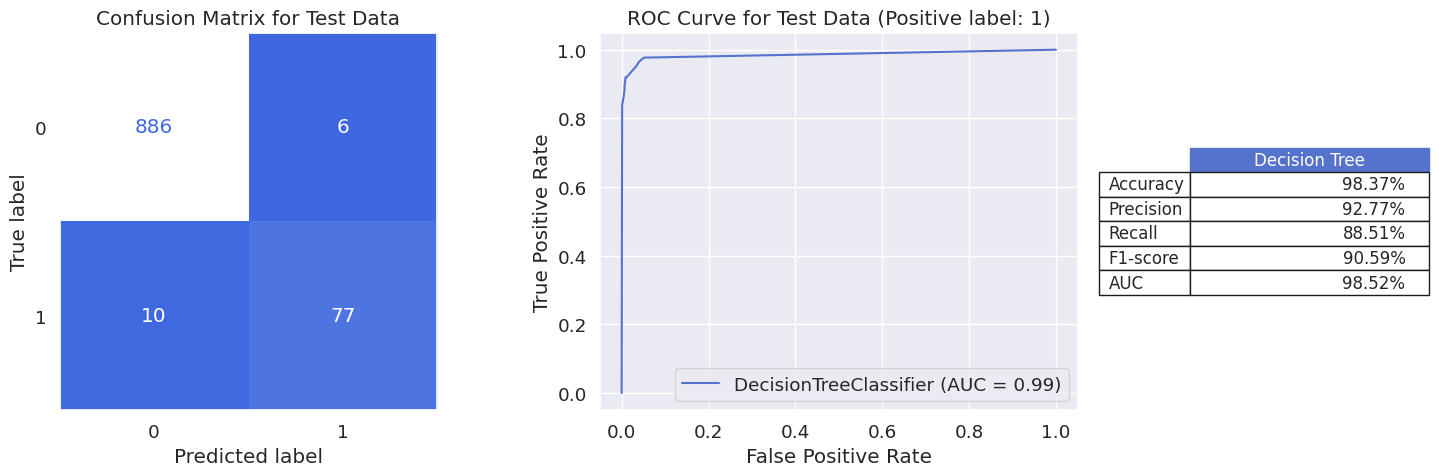

In [ ]:
model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree')

Fungsi `model_evaluation` dieksekusi untuk mengevaluasi kinerja model Decision Tree yang telah dioptimalkan (`dt_opt`). Fungsi ini mencakup laporan klasifikasi untuk set pelatihan dan pengujian, menampilkan confusion matrix untuk data pengujian, kurva ROC beserta skor AUC, serta tabel yang menunjukkan beberapa metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC. Ini membantu dalam memahami seberapa baik model dapat membedakan antara kelas positif dan negatif dalam memprediksi calon peminjam pinjaman.

Model Decision Tree sebelum proses PCA memiliki F1-score sebesar 90.59%. Berdasarkan confusion matrix, jumlah nilai FN dan FP adalah 16. Dengan kata lain, dari 979 nasabah bank, model ini membuat kesalahan dalam 16 kasus dalam memprediksi apakah nasabah menerima pinjaman atau tidak.

In [ ]:
# Menyimpan kinerja akhir pengklasifikasian Decision Tree
dt_result = metrics_calculator(dt_opt, X_test, y_test, 'Decision Tree')
dt_result.to_csv('dt_result.csv')
dt_result

,Decision Tree
Accuracy,98.37%
Precision,92.77%
Recall,88.51%
F1-score,90.59%
AUC,98.52%


Kode tersebut digunakan untuk menyimpan kinerja akhir dari model Decision Tree sebelum proses PCA. Dengan menggunakan fungsi `metrics_calculator`, kinerja model dievaluasi berdasarkan beberapa metrik performa (Accuracy, Precision, Recall, F1-score, dan AUC) pada data uji. Hasil evaluasi tersebut kemudian disimpan dalam variabel `dt_result` yang menampilkan nilai-nilai metrik performa tersebut dalam bentuk persentase.

Output tersebut merupakan metrik evaluasi untuk model Decision Tree sebelum proses PCA pada data uji.

- Accuracy (98.37%) menunjukkan bahwa model memiliki tingkat ketepatan yang tinggi dalam mengklasifikasikan data, dengan 98.37% prediksi yang benar dari keseluruhan data uji.
- Precision (92.77%) mengindikasikan bahwa dari semua prediksi positif yang dibuat oleh model, 92.77% benar-benar positif. Ini menunjukkan sedikitnya false positive.
- Recall (88.51%) berarti dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 88.51% dengan benar. Ini menunjukkan sedikitnya false negative.
- F1-score (90.59%) adalah rata-rata harmonik dari precision dan recall, yang mencerminkan keseimbangan antara keduanya.
- AUC (98.52%) menunjukkan area under the ROC curve, mengindikasikan performa model yang sangat baik dalam membedakan antara kelas positif dan negatif.

Secara keseluruhan, model ini menunjukkan performa yang sangat baik pada data uji dengan nilai yang tinggi pada semua metrik evaluasi.

### Random Forest

In [ ]:
# Bobot yang terkait dengan kelas
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Menentukan kisi-kisi hyperparameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': np.arange(5, 12),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}

Kode tersebut bertujuan untuk menentukan kisi-kisi hyperparameter yang akan digunakan dalam proses optimasi model Random Forest. Terdapat beberapa hyperparameter yang diuji dalam kisi-kisi, yaitu sebagai berikut.

- n_estimators: Jumlah pohon keputusan dalam hutan acak. Dalam grid ini, nilai yang diuji adalah 50, 100, dan 150. Semakin banyak pohon yang digunakan, semakin baik model dapat menangkap variasi dalam data, tetapi juga membutuhkan lebih banyak waktu komputasi.
- max_depth: Kedalaman maksimum dari setiap pohon keputusan. Nilai yang diuji berkisar dari 5 hingga 12. Parameter ini mengontrol seberapa dalam pohon keputusan dapat berkembang. Kedalaman yang lebih besar memungkinkan pohon menangkap lebih banyak detail dari data, tetapi juga dapat menyebabkan overfitting.
- min_samples_split: Jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Nilai yang diuji adalah 2, 3, dan 4. Ini membantu mengontrol ukuran pohon keputusan dan mencegah pohon menjadi terlalu terperinci (overfitting).
- min_samples_leaf: Jumlah sampel minimum yang harus ada di simpul daun. Nilai yang diuji adalah 1, 2, dan 3. Parameter ini memastikan bahwa setiap simpul akhir memiliki sejumlah minimum sampel, yang membantu mencegah pohon dari menjadi terlalu terperinci.
- class_weight: Bobot yang terkait dengan masing-masing kelas untuk menangani ketidakseimbangan kelas dalam data. Nilai yang diuji adalah berbagai kombinasi dari 0 hingga 1, dengan langkah kecil yang dihasilkan dari `np.linspace(0.001,1,20)`. Dengan memberikan bobot lebih besar pada kelas minoritas, model diharapkan dapat memberikan perhatian lebih pada kelas minoritas tersebut.

Kombinasi parameter-parameter ini akan diuji menggunakan kisi-kisi hiperparameter (param_grid) untuk mencari kombinasi yang optimal yang menghasilkan kinerja terbaik dari model yang dibangun, yang dievaluasi berdasarkan metrik performa seperti F1-score atau AUC pada validasi silang.


In [ ]:
# Lakukan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Buat objek Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.5793684210526315, 1: 0.42063157894736847}, 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Kode tersebut menjelaskan proses untuk membangun model Random Forest Classifier. Pertama, dataset dibagi menjadi data pelatihan dan data uji menggunakan fungsi `train_test_split`. Data uji sebesar 20% dari dataset digunakan untuk evaluasi model, sementara sisanya digunakan untuk melatih model. Selanjutnya, model Random Forest Classifier (`rf`) dibuat dengan menggunakan parameter default seperti `criterion='gini'`, `max_features=None`, dan `bootstrap=True`, dengan nilai seed acak 0 untuk reproduktibilitas hasil. Kemudian, model tersebut dioptimalkan dengan mencari kombinasi terbaik dari hyperparameter menggunakan fungsi `tune_clf_hyperparameters`. Hasilnya menunjukkan bahwa kombinasi hyperparameter terbaik untuk model tersebut adalah dengan `class_weight` yang mengatur bobot kelas minoritas sebesar 0.42, `max_depth` sebesar 11, `min_samples_leaf` sebesar 1, `min_samples_split` sebesar 2, dan `n_estimators` (jumlah pohon) sebesar 50. Dengan mengoptimalkan hyperparameter ini, diharapkan model tersebut dapat memberikan kinerja prediksi yang lebih baik, terutama dalam menghadapi dataset yang mungkin tidak seimbang dalam distribusi kelasnya.

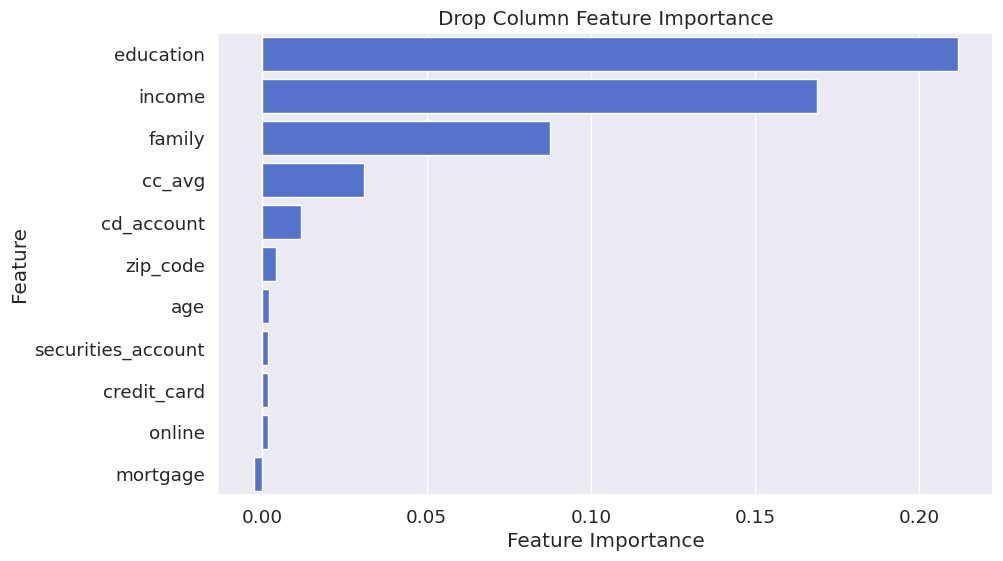

In [ ]:
drop_column_importance_plot(rf_opt, X_train, y_train)

Fungsi `drop_column_importance_plot` digunakan untuk mengevaluasi tingkat kepentingan fitur-fitur dalam model Random Forest Classifier yang telah dioptimalkan (`rf_opt`). Prosesnya melibatkan penghitungan pengaruh penghapusan masing-masing fitur terhadap performa keseluruhan model. Hasilnya direpresentasikan dalam bentuk diagram batang horizontal yang menunjukkan tingkat kepentingan relatif dari setiap fitur terhadap prediksi model. Tujuannya adalah untuk membantu pemahaman tentang kontribusi relatif setiap fitur terhadap keakuratan prediksi model Random Forest yang telah dioptimalkan.

In [ ]:
# Temukan fitur penting dengan nilai feature_importance positif
feature_importances = drop_column_importance(rf_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Menyaring dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Dalam kode tersebut, kita menggunakan model Random Forest Classifier yang telah dioptimalkan (`rf_opt`) untuk menemukan fitur-fitur yang dianggap penting. Pertama, kita menghitung pengaruh penghapusan masing-masing fitur terhadap kinerja model dengan nilai feature_importance yang positif. Fitur-fitur yang memiliki pengaruh di atas ambang batas tertentu (0.01 dalam kasus ini) disimpan dalam variabel `selected_features`. Selanjutnya, dataset pelatihan (`X_train`) dan dataset uji (`X_test`) disaring sehingga hanya fitur-fitur yang terpilih saja yang dipertahankan untuk analisis dan prediksi selanjutnya. Langkah ini bertujuan untuk meningkatkan efisiensi dan akurasi model dengan fokus pada fitur-fitur yang memiliki dampak signifikan terhadap prediksi model.

In [ ]:
# Membangun objek Random Forest Classifier dengan mempertimbangkan nilai optimal yang diperoleh untuk hyperparameter
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=50,
                                  max_depth = 11,  min_samples_leaf=1, min_samples_split=2,
                                  class_weight={0: 0.58, 1: 0.42}, random_state=0)


# Melatih model Random Forest akhir
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.58, 1: 0.42}, max_depth=11,
                       max_features=None, n_estimators=50, random_state=0)

Kode tersebut digunakan untuk menciptakan sebuah objek RandomForestClassifier final(`rf_final`) setelah penghapusan fitur yang tidak relevan, yang telah disesuaikan dengan nilai optimal dari beberapa hyperparameter yang telah diperoleh sebelumnya melalui proses penyetelan. Model ini menggunakan kriteria 'gini' untuk mengukur kualitas split, tidak membatasi jumlah fitur maksimum, menggunakan bootstrap untuk membangun setiap pohon, dan memiliki 50 pohon keputusan (n_estimators). Selain itu, kedalaman maksimum pohon adalah 11, dan jumlah sampel minimum untuk membagi node adalah 2, dengan jumlah sampel minimum di setiap leaf node adalah 1. Bobot kelas untuk kelas 0 dan 1 telah ditetapkan masing-masing menjadi 0,58 dan 0,42. Model ini kemudian dilatih dengan menggunakan data pelatihan X_train dan y_train.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.92      0.94        87

    accuracy                           0.99       979
   macro avg       0.97      0.96      0.96       979
weighted avg       0.99      0.99      0.99       979



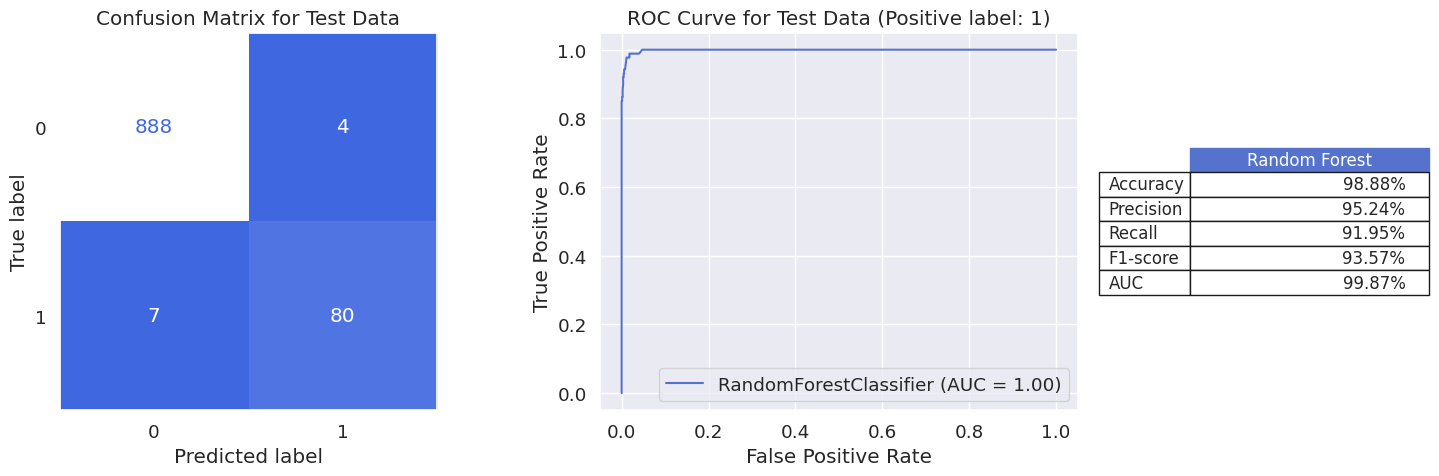

In [ ]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

Fungsi `model_evaluation` dieksekusi untuk mengevaluasi kinerja model Random Forest yang telah dioptimalkan (`rf_final`). Fungsi ini mencakup laporan klasifikasi untuk set pelatihan dan pengujian, menampilkan confusion matrix untuk data pengujian, kurva ROC beserta skor AUC, serta tabel yang menunjukkan beberapa metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC. Ini membantu dalam memahami seberapa baik model dapat membedakan antara kelas positif dan negatif dalam memprediksi calon peminjam pinjaman.

Model Random Forest sebelum proses PCA memiliki F1-score sebesar 93.57%. Berdasarkan confusion matrix, jumlah nilai FN dan FP adalah 11. Dengan kata lain, dari 979 nasabah bank, model ini membuat kesalahan dalam 11 kasus dalam memprediksi apakah nasabah menerima pinjaman atau tidak.

In [ ]:
# Menyimpan kinerja akhir pengklasifikasi Random Forest
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')
rf_result.to_csv('rf_result.csv')
rf_result

,Random Forest
Accuracy,98.88%
Precision,95.24%
Recall,91.95%
F1-score,93.57%
AUC,99.87%


Output tersebut merupakan metrik evaluasi untuk model Random Forest sebelum proses PCA pada data uji.

- Accuracy (98.88%) menunjukkan bahwa model memiliki tingkat ketepatan yang sangat tinggi dalam mengklasifikasikan data, dengan 98.88% prediksi yang benar dari keseluruhan data uji.
- Precision (95.24%) mengindikasikan bahwa dari semua prediksi positif yang dibuat oleh model, 95.24% benar-benar positif. Ini menunjukkan sedikitnya false positive.
- Recall (91.95%) berarti dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 91.95% dengan benar. Ini menunjukkan sedikitnya false negative.
- F1-score (93.57%) adalah rata-rata harmonik dari precision dan recall, mencerminkan keseimbangan antara keduanya dan menunjukkan kinerja model yang sangat baik.
- AUC (99.87%) menunjukkan area under the ROC curve, yang hampir sempurna, mengindikasikan performa model yang luar biasa dalam membedakan antara kelas positif dan negatif.

Secara keseluruhan, model ini menunjukkan performa yang sangat unggul pada data uji dengan nilai yang sangat tinggi pada semua metrik evaluasi.

## Setelah Proses PCA

### Proses PCA ('num_vars')

Variabel yang sesuai untuk dilakukan PCA adalah yang bersifat numerik dan memiliki skala interval atau rasio, seperti `age`, `income`, `cc_avg`, dan `mortgage`. Variabel seperti `zip_code`, `family`, `education`, `securities_account`, `cd_account`, `online`, dan `credit_card` sebaiknya tidak dimasukkan ke dalam analisis PCA karena bersifat kategorikal. PCA bekerja paling baik pada variabel numerik yang memiliki skala yang serupa dan mewakili besaran atau jumlah yang dapat diukur secara langsung.

Dengan menggunakan variabel numerik yang tepat, PCA dapat membantu mengidentifikasi pola-pola yang signifikan dalam data, mengurangi dimensi variabel yang kompleks, dan menghasilkan komponen-komponen baru yang merepresentasikan variasi terbesar dari data asli.

In [ ]:
# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy[num_vars])

# Melakukan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Menambahkan hasil PCA ke DataFrame
df_pca_num_result = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca_num_result

,PCA1,PCA2
0,-0.334575,0.569591
1,-0.812766,-0.357658
2,-1.316317,0.008580
3,0.811886,-0.083116
4,-0.743116,0.142605
...,...,...
4889,-0.393730,0.369598
4890,-1.305992,1.312441
4891,-1.640946,-1.112149
4892,-1.187919,-1.266432


Kode tersebut menjelaskan proses normalisasi data numerik dari dataframe `df_copy` menggunakan `StandardScaler` untuk memastikan semua variabel memiliki skala yang serupa. Setelah itu, dilakukan PCA dengan menyusun dua komponen utama dari data yang telah dinormalisasi. Hasil PCA kemudian ditambahkan ke dalam dataframe baru `df_pca_num_result`, yang memiliki dua kolom baru yaitu 'PCA1' dan 'PCA2' yang merepresentasikan dua komponen utama yang dihasilkan dari proses PCA.

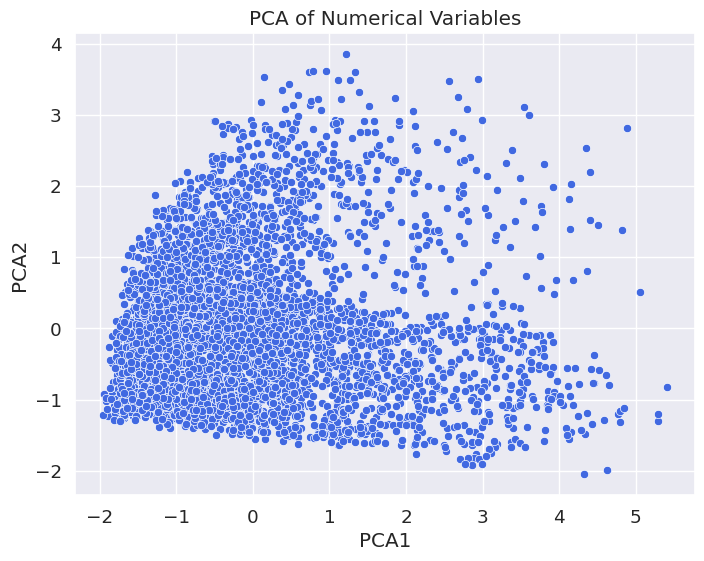

In [ ]:
# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca_num_result, color='royalblue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Numerical Variables')
plt.show()

Kode tersebut bertujuan untuk memvisualisasikan hasil PCA yang telah dilakukan sebelumnya. Dua komponen utama PCA, yang telah dihitung sebelumnya dari data yang telah dinormalisasi, ditampilkan dalam sebuah scatter plot. Sumbu x dan y dari plot tersebut masing-masing merupakan nilai dari 'PCA1' dan 'PCA2' yang ada dalam dataframe `df_pca_num_result`. Plot ini memberikan gambaran visual tentang bagaimana data dapat diproyeksikan ke dalam ruang dua dimensi yang direpresentasikan oleh dua komponen utama PCA yang dipilih. Berdasarkan plot tersebut, nilai dari 'PCA1' berkisar antara -2 hingga 5.5, sedangkan nilai dari 'PCA2' berkisar antara -2 hingga 4.

In [ ]:
# Mengabungkan hasil PCA dengan variabel kategorikal
df_pca_num_final = pd.concat([df_pca_num_result, df_copy.drop(num_vars, axis=1)], axis=1)

X = df_pca_num_final.drop('personal_loan', axis=1)
y = df_pca_num_final['personal_loan']

Kode di atas menggabungkan hasil dari PCA dengan variabel kategorikal dalam dataframe `df_copy` untuk digunakan dalam membangun model klasifikasi. DataFrame `df_pca_num_result`, yang berisi hasil transformasi PCA (PCA1 dan PCA2), digabungkan dengan `df_copy` setelah menghapus variabel numerik (`num_vars`) yang telah dinormalisasi sebelumnya. Selanjutnya, variabel `X` dan `y` diinisialisasi untuk digunakan dalam proses pemodelan, di mana `X` merupakan dataframe yang berisi fitur-fitur yang telah diproses menggunakan PCA, sedangkan `y` merupakan variabel target yang ingin diprediksi ('personal_loan').



#### Decision Tree

In [ ]:
# Bobot yang terkait dengan kelas
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Menentukan kisi-kisi hyperparameter
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights}

Kode tersebut bertujuan untuk menentukan kisi-kisi hyperparameter yang akan digunakan dalam proses optimasi model Decision Tree. Terdapat beberapa hyperparameter yang diuji dalam kisi-kisi, yaitu sebagai berikut.

- 'criterion': Merupakan kriteria yang digunakan untuk mengukur kualitas pemisahan pada setiap node dalam pohon keputusan. Pilihan umum untuk parameter ini adalah 'gini', 'entropy', atau 'log_loss'. 'Gini' mengukur ketidakmurnian dari himpunan data, 'entropy' mengukur ketidakpastian, dan 'log_loss' mengukur kehilangan logaritmik.
- 'max_depth': Parameter ini mengatur kedalaman maksimum dari pohon keputusan. Semakin dalam pohon, semakin kompleks modelnya, yang dapat mengarah pada overfitting jika tidak diatur dengan benar.
- 'min_samples_split': Menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal. Nilai yang lebih tinggi dapat mengarah pada pohon yang lebih konservatif dan mengurangi kompleksitas model.
- 'min_samples_leaf': Menentukan jumlah minimum sampel yang diperlukan untuk membentuk leaf node di pohon. Nilai yang lebih tinggi dapat mengurangi overfitting dengan memastikan setiap leaf node mewakili lebih banyak sampel.
- 'max_features': Parameter ini menentukan jumlah fitur yang dipertimbangkan saat mencari pemisahan terbaik. 'None' berarti mempertimbangkan semua fitur, 'sqrt' berarti mempertimbangkan akar kuadrat dari jumlah fitur, dan 'log2' mempertimbangkan logaritma basis 2 dari jumlah fitur.
- 'class_weight': Bobot kelas adalah cara untuk menangani ketidakseimbangan kelas dalam data. Dalam konteks ini, kita menggunakan berbagai bobot kelas yang bervariasi dari 0.001 hingga 1.0 untuk kelas mayoritas (0) dan kelas minoritas (1). Bobot ini mempengaruhi bagaimana model menangani kesalahan prediksi pada setiap kelas, sehingga dapat meningkatkan kinerja pada kelas minoritas dengan memberikan lebih banyak bobot atau perhatian pada kelas tersebut selama pelatihan model.

Kombinasi parameter-parameter ini akan diuji menggunakan kisi-kisi hiperparameter (param_grid) untuk mencari kombinasi yang optimal yang menghasilkan kinerja terbaik dari model yang dibangun, yang dievaluasi berdasarkan metrik performa seperti F1-score atau AUC pada validasi silang.


In [ ]:
# Lakukan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Buat objek Decision Tree Classifier
dt_pca_num = DecisionTreeClassifier(random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
dt_pca_num_opt = tune_clf_hyperparameters(dt_pca_num, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.7371052631578947, 1: 0.2628947368421053}, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


Kode tersebut menjelaskan proses untuk membangun model Decision Tree Classifier dengan menggunakan teknik train-test split untuk membagi data menjadi data pelatihan dan data uji. Selanjutnya, model Decision Tree Classifier dibuat dengan pengaturan default, kemudian dilakukan penyetelan hyperparameter menggunakan GridSearchCV untuk mencari kombinasi hyperparameter yang optimal. Hasilnya menunjukkan kombinasi hyperparameter terbaik yang ditemukan, yaitu kriteria pemilihan fitur ('gini'), kedalaman maksimum ('max_depth' = 7), jumlah fitur maksimum ('max_features' = None), jumlah sampel minimum di leaf ('min_samples_leaf' = 2), jumlah sampel minimum untuk membagi node internal ('min_samples_split' = 5), dan bobot kelas ('class_weight' = {0: 0.74, 1: 0.26}). Penyetelan ini bertujuan untuk meningkatkan kinerja model dengan menyesuaikan parameter-parameter tersebut berdasarkan metrik performa seperti F1-score.

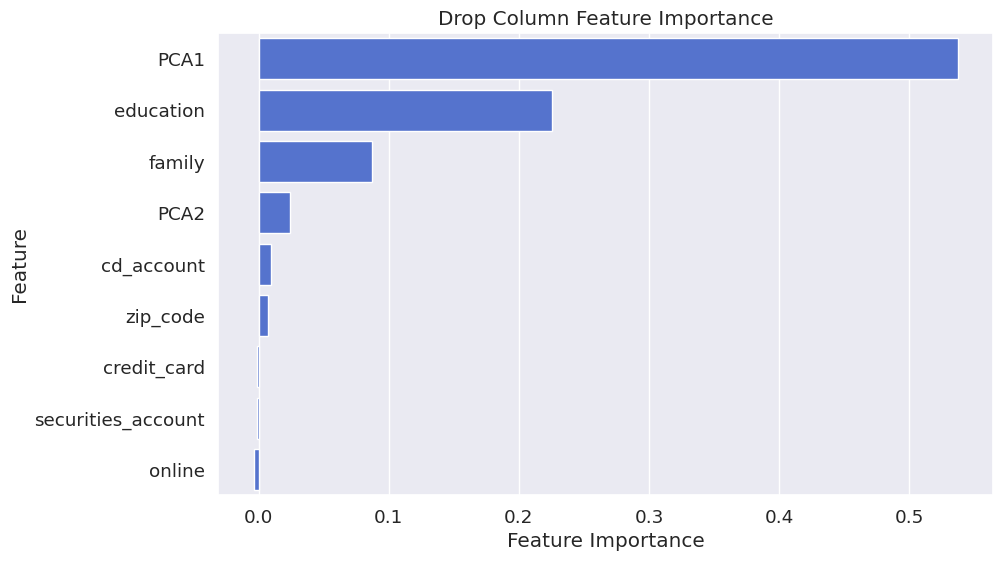

In [ ]:
drop_column_importance_plot(dt_pca_num_opt, X_train, y_train)

Fungsi `drop_column_importance_plot` digunakan untuk mengevaluasi tingkat kepentingan fitur-fitur dalam model Decision Tree Classifier setelah proses PCA ('num_vars') yang telah dioptimalkan (`dt_pca_num_opt`). Prosesnya melibatkan penghitungan pengaruh penghapusan masing-masing fitur terhadap performa keseluruhan model. Hasilnya direpresentasikan dalam bentuk diagram batang horizontal yang menunjukkan tingkat kepentingan relatif dari setiap fitur terhadap prediksi model. Tujuannya adalah untuk membantu pemahaman tentang kontribusi relatif setiap fitur terhadap keakuratan prediksi model Decision Tree setelah proses PCA ('num_vars') yang telah dioptimalkan.

In [ ]:
# Temukan fitur penting dengan nilai feature_importance positif
feature_importances = drop_column_importance(dt_pca_num_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Menyaring dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Dalam kode tersebut, kita menggunakan model Decision Tree Classifier setelah proses PCA ('num_vars') yang telah dioptimalkan (`dt_pca_num_opt`) untuk menemukan fitur-fitur yang dianggap penting. Pertama, kita menghitung pengaruh penghapusan masing-masing fitur terhadap kinerja model dengan nilai feature_importance yang positif. Fitur-fitur yang memiliki pengaruh di atas ambang batas tertentu (0.01 dalam kasus ini) disimpan dalam variabel `selected_features`. Selanjutnya, dataset pelatihan (`X_train`) dan dataset uji (`X_test`) disaring sehingga hanya fitur-fitur yang terpilih saja yang dipertahankan untuk analisis dan prediksi selanjutnya. Langkah ini bertujuan untuk meningkatkan efisiensi dan akurasi model dengan fokus pada fitur-fitur yang memiliki dampak signifikan terhadap prediksi model.

In [ ]:
# Buat objek Decision Tree Classifier
dt_pca_num = DecisionTreeClassifier(random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
dt_pca_num_opt = tune_clf_hyperparameters(dt_pca_num, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.5793684210526315, 1: 0.42063157894736847}, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


Kode tersebut digunakan untuk melakukan penyetelan ulang hyperparameter model setelah menghapus fitur yang tidak relevan.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3569
           1       0.96      0.82      0.89       346

    accuracy                           0.98      3915
   macro avg       0.97      0.91      0.94      3915
weighted avg       0.98      0.98      0.98      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       892
           1       0.90      0.72      0.80        87

    accuracy                           0.97       979
   macro avg       0.94      0.86      0.89       979
weighted avg       0.97      0.97      0.97       979



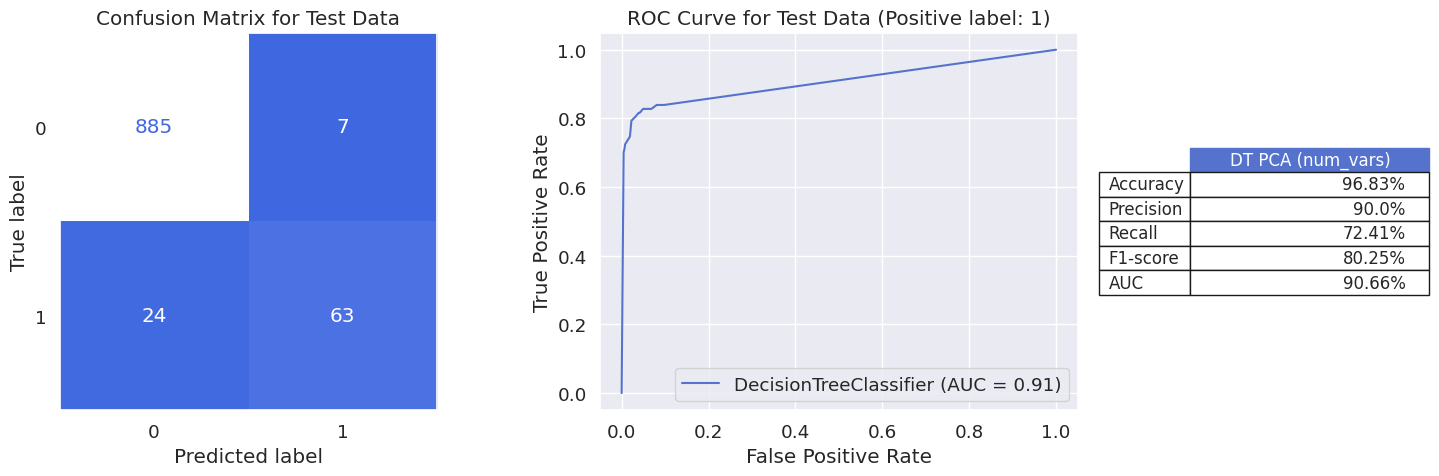

In [ ]:
model_evaluation(dt_pca_num_opt, X_train, X_test, y_train, y_test, 'DT PCA (num_vars)')

Fungsi `model_evaluation` dieksekusi untuk mengevaluasi kinerja model Decision Tree setelah proses PCA ('num_vars') yang telah dioptimalkan (`dt_pca_num_opt`). Fungsi ini mencakup laporan klasifikasi untuk set pelatihan dan pengujian, menampilkan confusion matrix untuk data pengujian, kurva ROC beserta skor AUC, serta tabel yang menunjukkan beberapa metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC. Ini membantu dalam memahami seberapa baik model dapat membedakan antara kelas positif dan negatif dalam memprediksi calon peminjam pinjaman.

Model Decision Tree setelah proses PCA ('num_vars') memiliki F1-score sebesar 80.25%. Berdasarkan confusion matrix, jumlah nilai FN dan FP adalah 31. Dengan kata lain, dari 979 nasabah bank, model ini membuat kesalahan dalam 31 kasus dalam memprediksi apakah nasabah menerima pinjaman atau tidak.

In [ ]:
# Menyimpan kinerja akhir pengklasifikasian Decision Tree
dt_pca_num_result = metrics_calculator(dt_pca_num_opt, X_test, y_test, 'DT PCA (num_vars)')
dt_pca_num_result.to_csv('dt_pca_num_result.csv')
dt_pca_num_result

,DT PCA (num_vars)
Accuracy,96.83%
Precision,90.0%
Recall,72.41%
F1-score,80.25%
AUC,90.66%


Kode tersebut digunakan untuk menyimpan kinerja akhir dari model Decision Tree setelah proses PCA ('num_vars'). Dengan menggunakan fungsi `metrics_calculator`, kinerja model dievaluasi berdasarkan beberapa metrik performa (Accuracy, Precision, Recall, F1-score, dan AUC) pada data uji. Hasil evaluasi tersebut kemudian disimpan dalam variabel `dt_pca_num_result` yang menampilkan nilai-nilai metrik performa tersebut dalam bentuk persentase.

Output tersebut merupakan metrik evaluasi untuk model Decision Tree setelah proses PCA ('num_vars') pada data uji.

- Accuracy (96.83%) menunjukkan bahwa model memiliki tingkat ketepatan yang cukup tinggi dalam mengklasifikasikan data, dengan 96.83% prediksi yang benar dari keseluruhan data uji.
- Precision (90%) mengindikasikan bahwa dari semua prediksi positif yang dibuat oleh model, 90% benar-benar positif. Ini menunjukkan sedikitnya false positive.
- Recall (72.41%) berarti dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 72.41% dengan benar. Ini menunjukkan sedikitnya false negative.
- F1-score (80.25%) adalah rata-rata harmonik dari precision dan recall, yang mencerminkan keseimbangan antara keduanya.
- AUC (90.66%) menunjukkan area under the ROC curve, mengindikasikan performa model yang cukup baik dalam membedakan antara kelas positif dan negatif.

Secara keseluruhan, model ini menunjukkan performa yang cukup baik pada data uji dengan nilai yang cukup tinggi pada semua metrik evaluasi.

#### Random Forest

In [ ]:
# Bobot yang terkait dengan kelas
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Menentukan kisi-kisi hyperparameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': np.arange(5, 12),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}

Kode tersebut bertujuan untuk menentukan kisi-kisi hyperparameter yang akan digunakan dalam proses optimasi model Random Forest. Terdapat beberapa hyperparameter yang diuji dalam kisi-kisi, yaitu sebagai berikut.

- n_estimators: Jumlah pohon keputusan dalam hutan acak. Dalam grid ini, nilai yang diuji adalah 50, 100, dan 150. Semakin banyak pohon yang digunakan, semakin baik model dapat menangkap variasi dalam data, tetapi juga membutuhkan lebih banyak waktu komputasi.
- max_depth: Kedalaman maksimum dari setiap pohon keputusan. Nilai yang diuji berkisar dari 5 hingga 12. Parameter ini mengontrol seberapa dalam pohon keputusan dapat berkembang. Kedalaman yang lebih besar memungkinkan pohon menangkap lebih banyak detail dari data, tetapi juga dapat menyebabkan overfitting.
- min_samples_split: Jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Nilai yang diuji adalah 2, 3, dan 4. Ini membantu mengontrol ukuran pohon keputusan dan mencegah pohon menjadi terlalu terperinci (overfitting).
- min_samples_leaf: Jumlah sampel minimum yang harus ada di simpul daun. Nilai yang diuji adalah 1, 2, dan 3. Parameter ini memastikan bahwa setiap simpul akhir memiliki sejumlah minimum sampel, yang membantu mencegah pohon dari menjadi terlalu terperinci.
- class_weight: Bobot yang terkait dengan masing-masing kelas untuk menangani ketidakseimbangan kelas dalam data. Nilai yang diuji adalah berbagai kombinasi dari 0 hingga 1, dengan langkah kecil yang dihasilkan dari `np.linspace(0.001,1,20)`. Dengan memberikan bobot lebih besar pada kelas minoritas, model diharapkan dapat memberikan perhatian lebih pada kelas minoritas tersebut.

Kombinasi parameter-parameter ini akan diuji menggunakan kisi-kisi hiperparameter (param_grid) untuk mencari kombinasi yang optimal yang menghasilkan kinerja terbaik dari model yang dibangun, yang dievaluasi berdasarkan metrik performa seperti F1-score atau AUC pada validasi silang.

In [ ]:
# Lakukan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Buat objek Random Forest Classifier
rf_pca_num = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
rf_pca_num_opt = tune_clf_hyperparameters(rf_pca_num, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.6319473684210526, 1: 0.3680526315789474}, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Kode tersebut menjelaskan proses untuk membangun model Random Forest Classifier setelah proses PCA ('num_vars'). Pertama, dataset dibagi menjadi data pelatihan dan data uji menggunakan fungsi `train_test_split`. Data uji sebesar 20% dari dataset digunakan untuk evaluasi model, sementara sisanya digunakan untuk melatih model. Selanjutnya, model Random Forest Classifier setelah proses PCA ('num_vars') (`rf_pca_num`) dibuat dengan menggunakan parameter default seperti `criterion='gini'`, `max_features=None`, dan `bootstrap=True`, dengan nilai seed acak 0 untuk reproduktibilitas hasil. Kemudian, model tersebut tersebut dioptimalkan dengan mencari kombinasi terbaik dari hyperparameter menggunakan fungsi `tune_clf_hyperparameters`. Hasilnya menunjukkan bahwa kombinasi hyperparameter terbaik untuk model tersebut adalah dengan `class_weight` yang mengatur bobot kelas minoritas sebesar 0.37, `max_depth` sebesar 7, `min_samples_leaf` sebesar 1, `min_samples_split` sebesar 2, dan `n_estimators` (jumlah pohon) sebesar 50. Dengan mengoptimalkan hyperparameter ini, diharapkan model tersebut dapat memberikan kinerja prediksi yang lebih baik, terutama dalam menghadapi dataset yang mungkin tidak seimbang dalam distribusi kelasnya.

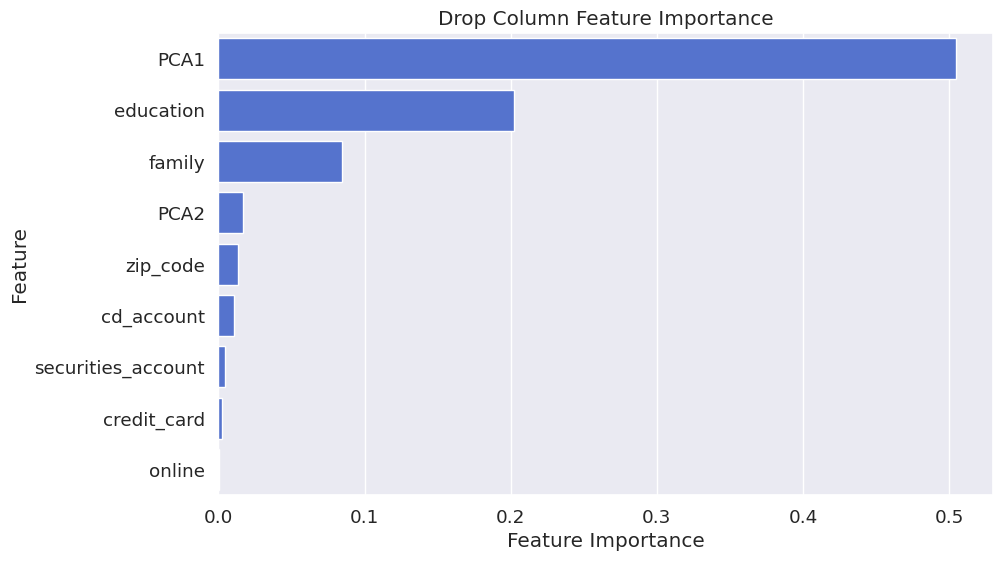

In [ ]:
drop_column_importance_plot(rf_pca_num_opt, X_train, y_train)

Fungsi `drop_column_importance_plot` digunakan untuk mengevaluasi tingkat kepentingan fitur-fitur dalam model Random Forest Classifier setelah proses PCA ('num_vars') yang telah dioptimalkan (`rf_pca_num_opt`). Prosesnya melibatkan penghitungan pengaruh penghapusan masing-masing fitur terhadap performa keseluruhan model. Hasilnya direpresentasikan dalam bentuk diagram batang horizontal yang menunjukkan tingkat kepentingan relatif dari setiap fitur terhadap prediksi model. Tujuannya adalah untuk membantu pemahaman tentang kontribusi relatif setiap fitur terhadap keakuratan prediksi model Random Forest setelah proses PCA ('num_vars') yang telah dioptimalkan.

In [ ]:
# Temukan fitur penting dengan nilai feature_importance positif
feature_importances = drop_column_importance(rf_pca_num_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Menyaring dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Dalam kode tersebut, kita menggunakan model Random Forest Classifier setelah proses PCA ('num_vars') yang telah dioptimalkan (`rf_pca_num_opt`) untuk menemukan fitur-fitur yang dianggap penting. Pertama, kita menghitung pengaruh penghapusan masing-masing fitur terhadap kinerja model dengan nilai feature_importance yang positif. Fitur-fitur yang memiliki pengaruh di atas ambang batas tertentu (0.01 dalam kasus ini) disimpan dalam variabel `selected_features`. Selanjutnya, dataset pelatihan (`X_train`) dan dataset uji (`X_test`) disaring sehingga hanya fitur-fitur yang terpilih saja yang dipertahankan untuk analisis dan prediksi selanjutnya. Langkah ini bertujuan untuk meningkatkan efisiensi dan akurasi model dengan fokus pada fitur-fitur yang memiliki dampak signifikan terhadap prediksi model.

In [ ]:
# Membangun objek Random Forest Classifier dengan mempertimbangkan nilai optimal yang diperoleh untuk hyperparameter
rf_pca_num_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=50,
                                  max_depth = 7,  min_samples_leaf=5, min_samples_split=2,
                                  class_weight={0: 0.63, 1: 0.37}, random_state=0)


# Melatih model Random Forest akhir
rf_pca_num_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.63, 1: 0.37}, max_depth=7,
                       max_features=None, min_samples_leaf=5, n_estimators=50,
                       random_state=0)

Kode tersebut digunakan untuk menciptakan sebuah objek RandomForestClassifier final setelah proses PCA ('num_vars'), yaitu `rf_pca_num_final`, yang telah disesuaikan dengan nilai optimal dari beberapa hyperparameter yang telah diperoleh sebelumnya melalui proses penyetelan. Model ini menggunakan kriteria 'gini' untuk mengukur kualitas split, tidak membatasi jumlah fitur maksimum, menggunakan bootstrap untuk membangun setiap pohon, dan memiliki 50 pohon keputusan (n_estimators). Selain itu, kedalaman maksimum pohon adalah 7, dan jumlah sampel minimum untuk membagi node adalah 2, dengan jumlah sampel minimum di setiap leaf node adalah 5 (ditingkatkan dari 1 menjadi 5 karena untuk mengurangi sebagian varians dari model). Bobot kelas untuk kelas 0 dan 1 telah ditetapkan masing-masing menjadi 0.63 dan 0.37. Model ini kemudian dilatih dengan menggunakan data pelatihan X_train dan y_train.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3569
           1       0.98      0.80      0.88       346

    accuracy                           0.98      3915
   macro avg       0.98      0.90      0.93      3915
weighted avg       0.98      0.98      0.98      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       892
           1       0.98      0.71      0.83        87

    accuracy                           0.97       979
   macro avg       0.98      0.86      0.91       979
weighted avg       0.97      0.97      0.97       979



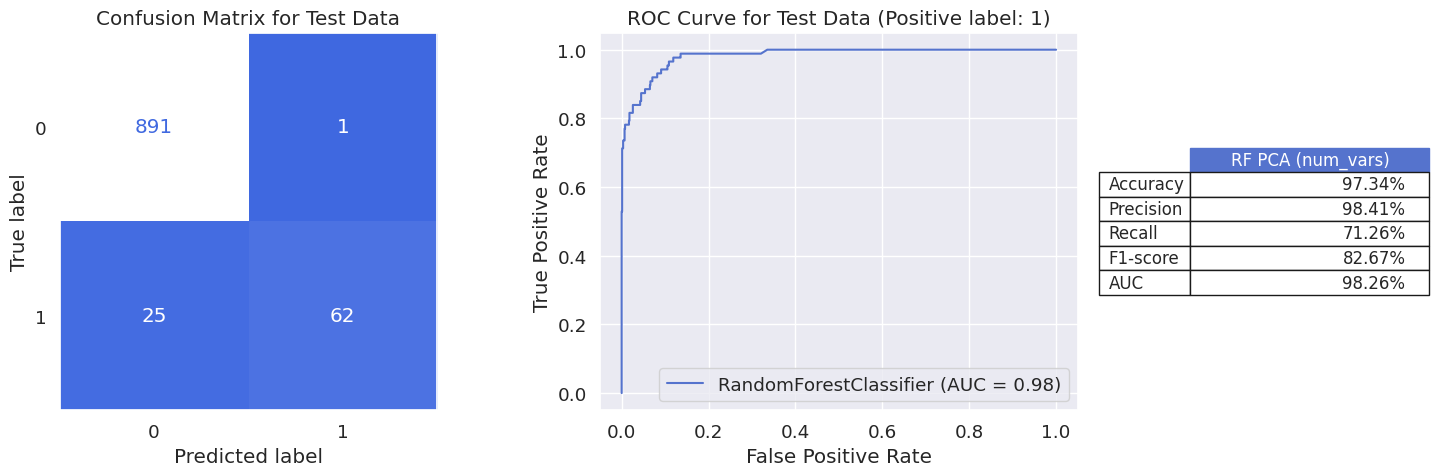

In [ ]:
model_evaluation(rf_pca_num_final, X_train, X_test, y_train, y_test, 'RF PCA (num_vars)')

Fungsi `model_evaluation` dieksekusi untuk mengevaluasi kinerja model Random Forest final setelah proses PCA ('num_vars'), yaitu `rf_pca_num_final`. Fungsi ini mencakup laporan klasifikasi untuk set pelatihan dan pengujian, menampilkan confusion matrix untuk data pengujian, kurva ROC beserta skor AUC, serta tabel yang menunjukkan beberapa metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC. Ini membantu dalam memahami seberapa baik model dapat membedakan antara kelas positif dan negatif dalam memprediksi calon peminjam pinjaman.

Model Random Forest setelah proses PCA ('num_vars') memiliki F1-score sebesar 82.67%. Berdasarkan confusion matrix, jumlah nilai FN dan FP adalah 26. Dengan kata lain, dari 979 nasabah bank, model ini membuat kesalahan dalam 26 kasus dalam memprediksi apakah nasabah menerima pinjaman atau tidak.

In [ ]:
# Menyimpan kinerja akhir pengklasifikasi Random Forest
rf_pca_num_result = metrics_calculator(rf_pca_num_final, X_test, y_test, 'RF PCA (num_vars)')
rf_pca_num_result.to_csv('rf_pca_num_result.csv')
rf_pca_num_result

,RF PCA (num_vars)
Accuracy,97.34%
Precision,98.41%
Recall,71.26%
F1-score,82.67%
AUC,98.26%


Kode tersebut digunakan untuk menyimpan kinerja akhir dari model Random Forest setelah proses PCA ('num_vars'). Dengan menggunakan fungsi `metrics_calculator`, kinerja model dievaluasi berdasarkan beberapa metrik performa (Accuracy, Precision, Recall, F1-score, dan AUC) pada data uji. Hasil evaluasi tersebut kemudian disimpan dalam variabel `rf_pca_num_result` yang menampilkan nilai-nilai metrik performa tersebut dalam bentuk persentase.

Output tersebut merupakan metrik evaluasi untuk model Random Forest setelah proses PCA ('num_vars') pada data uji.

- Accuracy (97.34%) menunjukkan bahwa model memiliki tingkat ketepatan yang cukup tinggi dalam mengklasifikasikan data, dengan 97.34% prediksi yang benar dari keseluruhan data uji.
- Precision (98.41%) mengindikasikan bahwa dari semua prediksi positif yang dibuat oleh model, 98.41% benar-benar positif. Ini menunjukkan sedikitnya false positive.
- Recall (71.26%) berarti dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 71.26% dengan benar. Ini menunjukkan sedikitnya false negative.
- F1-score (82.67%) adalah rata-rata harmonik dari precision dan recall, yang mencerminkan keseimbangan antara keduanya.
- AUC (98.26%) menunjukkan area under the ROC curve, mengindikasikan performa model yang cukup baik dalam membedakan antara kelas positif dan negatif.

Secara keseluruhan, model ini menunjukkan performa yang cukup baik pada data uji dengan nilai yang cukup tinggi pada semua metrik evaluasi.

### Proses PCA ('num_cat_vars')

Berikut merupakan proses PCA dengan mengombinasikan variabel numerik dan kategorikal. Variabel numerik yang digunakan dalam proses ini adalah `age`, `income`, `cc_avg`, dan `mortgage`. Sedangkan variabel kategorikal yang digunakan dalam proses ini adalah `family` dan `education` karena variabel tersebut berupa variabel kategorikal yang bersifat ordinal (memiliki tingkat atau urutan). Variabel kategorikal lainnya tidak digunakan karena hanya bersifat biner (terdiri dari 2 kategori). Sedangkan khusus untuk variabel 'zip_code', variabel tersebut merupakan variabel kategorikal nominal, sehingga tidak memiliki hubungan numerik yang kontinu.

In [ ]:
# Deklarasi variabel yang digunakan dalam proses PCA
num_cat_vars = num_vars + ['family', 'education']

# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy[num_cat_vars])

# Melakukan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Menambahkan hasil PCA ke DataFrame
df_pca_num_cat_result = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca_num_cat_result

,PCA1,PCA2
0,-0.353920,2.198861
1,-0.567967,0.324591
2,-0.630821,-0.279773
3,0.998207,-0.111384
4,-1.068136,1.373570
...,...,...
4889,-0.485428,0.149927
4890,-1.259872,2.034971
4891,-1.802607,-1.692741
4892,-1.233159,-1.187495


Kode tersebut menjelaskan proses normalisasi data numerik dan kategorikal dari dataframe `df_copy` menggunakan `StandardScaler` untuk memastikan semua variabel memiliki skala yang serupa. Setelah itu, dilakukan PCA dengan menyusun dua komponen utama dari data yang telah dinormalisasi. Hasil PCA kemudian ditambahkan ke dalam dataframe baru `df_pca_num_cat_result`, yang memiliki dua kolom baru yaitu 'PCA1' dan 'PCA2' yang merepresentasikan dua komponen utama yang dihasilkan dari proses PCA.

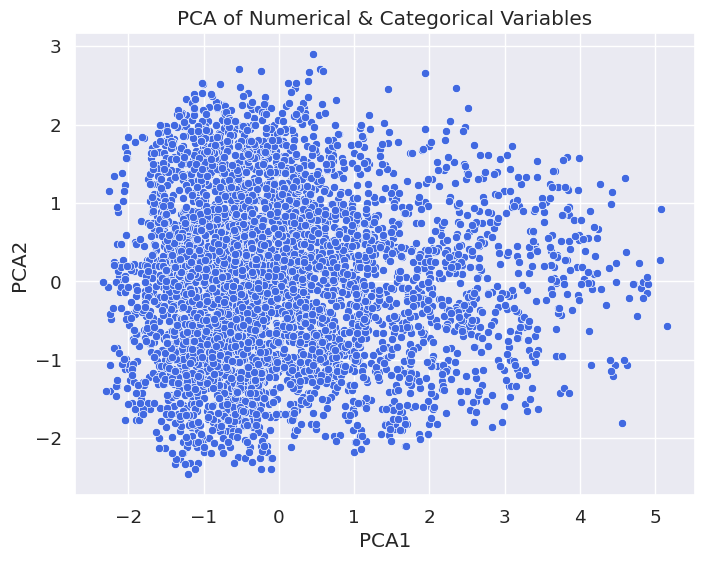

In [ ]:
# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca_num_cat_result, color='royalblue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Numerical & Categorical Variables')
plt.show()

Kode tersebut bertujuan untuk memvisualisasikan hasil PCA yang telah dilakukan sebelumnya. Dua komponen utama PCA, yang telah dihitung sebelumnya dari data yang telah dinormalisasi, ditampilkan dalam sebuah scatter plot. Sumbu x dan y dari plot tersebut masing-masing merupakan nilai dari 'PCA1' dan 'PCA2' yang ada dalam dataframe `df_pca_num_cat_result`. Plot ini memberikan gambaran visual tentang bagaimana data dapat diproyeksikan ke dalam ruang dua dimensi yang direpresentasikan oleh dua komponen utama PCA yang dipilih. Berdasarkan plot tersebut, nilai dari 'PCA1' berkisar antara -2.5 hingga 5.3, sedangkan nilai dari 'PCA2' berkisar antara -2.7 hingga 3.

In [ ]:
# Mengabungkan hasil PCA dengan variabel kategorikal
df_pca_num_cat_final = pd.concat([df_pca_num_cat_result, df_copy.drop(num_cat_vars, axis=1)], axis=1)

X = df_pca_num_cat_final.drop('personal_loan', axis=1)
y = df_pca_num_cat_final['personal_loan']

Kode di atas menggabungkan hasil dari PCA dengan variabel kategorikal dalam dataframe `df_copy` untuk digunakan dalam membangun model klasifikasi. DataFrame `df_pca_num_cat_result`, yang berisi hasil transformasi PCA (PCA1 dan PCA2), digabungkan dengan `df_copy` setelah menghapus variabel yang digunakan dalam PCA (`num_cat_vars`). Selanjutnya, variabel `X` dan `y` diinisialisasi untuk digunakan dalam proses pemodelan, dimana `X` merupakan dataframe yang berisi fitur-fitur yang telah diproses menggunakan PCA, sedangkan `y` merupakan variabel target yang ingin diprediksi ('personal_loan').



#### Decision Tree

In [ ]:
# Bobot yang terkait dengan kelas
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Menentukan kisi-kisi hyperparameter
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights}

Kode tersebut bertujuan untuk menentukan kisi-kisi hyperparameter yang akan digunakan dalam proses optimasi model Decision Tree. Terdapat beberapa hyperparameter yang diuji dalam kisi-kisi, yaitu sebagai berikut.

- 'criterion': Merupakan kriteria yang digunakan untuk mengukur kualitas pemisahan pada setiap node dalam pohon keputusan. Pilihan umum untuk parameter ini adalah 'gini', 'entropy', atau 'log_loss'. 'Gini' mengukur ketidakmurnian dari himpunan data, 'entropy' mengukur ketidakpastian, dan 'log_loss' mengukur kehilangan logaritmik.
- 'max_depth': Parameter ini mengatur kedalaman maksimum dari pohon keputusan. Semakin dalam pohon, semakin kompleks modelnya, yang dapat mengarah pada overfitting jika tidak diatur dengan benar.
- 'min_samples_split': Menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal. Nilai yang lebih tinggi dapat mengarah pada pohon yang lebih konservatif dan mengurangi kompleksitas model.
- 'min_samples_leaf': Menentukan jumlah minimum sampel yang diperlukan untuk membentuk leaf node di pohon. Nilai yang lebih tinggi dapat mengurangi overfitting dengan memastikan setiap leaf node mewakili lebih banyak sampel.
- 'max_features': Parameter ini menentukan jumlah fitur yang dipertimbangkan saat mencari pemisahan terbaik. 'None' berarti mempertimbangkan semua fitur, 'sqrt' berarti mempertimbangkan akar kuadrat dari jumlah fitur, dan 'log2' mempertimbangkan logaritma basis 2 dari jumlah fitur.
- 'class_weight': Bobot kelas adalah cara untuk menangani ketidakseimbangan kelas dalam data. Dalam konteks ini, kita menggunakan berbagai bobot kelas yang bervariasi dari 0.001 hingga 1.0 untuk kelas mayoritas (0) dan kelas minoritas (1). Bobot ini mempengaruhi bagaimana model menangani kesalahan prediksi pada setiap kelas, sehingga dapat meningkatkan kinerja pada kelas minoritas dengan memberikan lebih banyak bobot atau perhatian pada kelas tersebut selama pelatihan model.

Kombinasi parameter-parameter ini akan diuji menggunakan kisi-kisi hiperparameter (param_grid) untuk mencari kombinasi yang optimal yang menghasilkan kinerja terbaik dari model yang dibangun, yang dievaluasi berdasarkan metrik performa seperti F1-score atau AUC pada validasi silang.


In [ ]:
# Lakukan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Buat objek Decision Tree Classifier
dt_pca_num_cat = DecisionTreeClassifier(random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
dt_pca_num_cat_opt = tune_clf_hyperparameters(dt_pca_num_cat, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.2113157894736842, 1: 0.7886842105263158}, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}


Kode tersebut menjelaskan proses untuk membangun model Decision Tree Classifier dengan menggunakan teknik train-test split untuk membagi data menjadi data pelatihan dan data uji. Selanjutnya, model Decision Tree Classifier dibuat dengan pengaturan default, kemudian dilakukan penyetelan hyperparameter menggunakan GridSearchCV untuk mencari kombinasi hyperparameter yang optimal. Hasilnya menunjukkan kombinasi hyperparameter terbaik yang ditemukan, yaitu kriteria pemilihan fitur ('gini'), kedalaman maksimum ('max_depth' = 9), jumlah fitur maksimum ('max_features' = sqrt), jumlah sampel minimum di leaf ('min_samples_leaf' = 6), jumlah sampel minimum untuk membagi node internal ('min_samples_split' = 2), dan bobot kelas ('class_weight' = {0: 0.21, 1: 0.79}). Penyetelan ini bertujuan untuk meningkatkan kinerja model dengan menyesuaikan parameter-parameter tersebut berdasarkan metrik performa seperti F1-score.

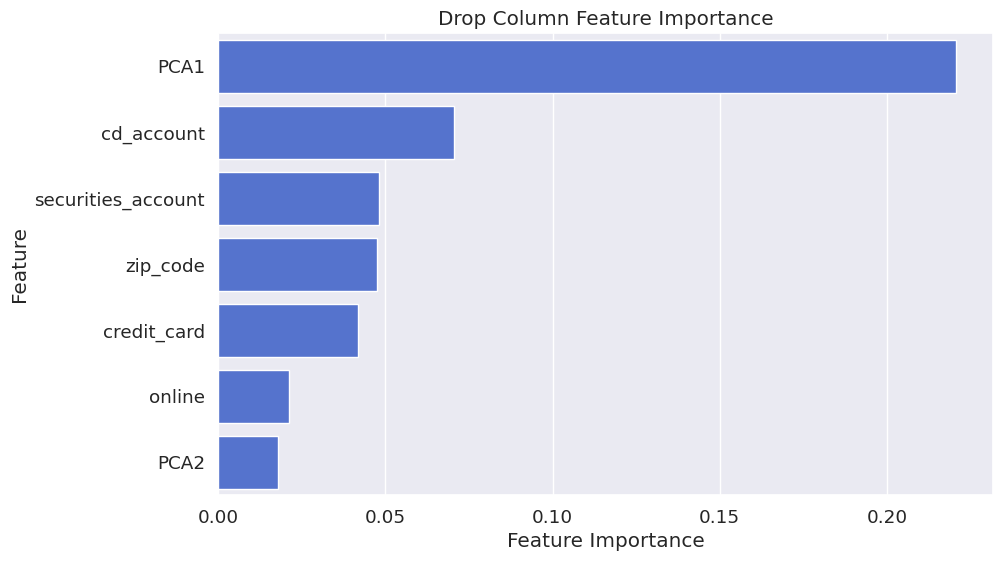

In [ ]:
drop_column_importance_plot(dt_pca_num_cat_opt, X_train, y_train)

Fungsi `drop_column_importance_plot` digunakan untuk mengevaluasi tingkat kepentingan fitur-fitur dalam model Decision Tree Classifier setelah proses PCA ('num_cat_vars') yang telah dioptimalkan (`dt_pca_num_cat_opt`). Prosesnya melibatkan penghitungan pengaruh penghapusan masing-masing fitur terhadap performa keseluruhan model. Hasilnya direpresentasikan dalam bentuk diagram batang horizontal yang menunjukkan tingkat kepentingan relatif dari setiap fitur terhadap prediksi model. Tujuannya adalah untuk membantu pemahaman tentang kontribusi relatif setiap fitur terhadap keakuratan prediksi model Decision Tree setelah proses PCA ('num_cat_vars') yang telah dioptimalkan.

In [ ]:
# Temukan fitur penting dengan nilai feature_importance positif
feature_importances = drop_column_importance(dt_pca_num_cat_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Menyaring dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Dalam kode tersebut, kita menggunakan model Decision Tree Classifier setelah proses PCA ('num_cat_vars') yang telah dioptimalkan (`dt_pca_num_cat_opt`) untuk menemukan fitur-fitur yang dianggap penting. Pertama, kita menghitung pengaruh penghapusan masing-masing fitur terhadap kinerja model dengan nilai feature_importance yang positif. Fitur-fitur yang memiliki pengaruh di atas ambang batas tertentu (0.01 dalam kasus ini) disimpan dalam variabel `selected_features`. Selanjutnya, dataset pelatihan (`X_train`) dan dataset uji (`X_test`) disaring sehingga hanya fitur-fitur yang terpilih saja yang dipertahankan untuk analisis dan prediksi selanjutnya. Langkah ini bertujuan untuk meningkatkan efisiensi dan akurasi model dengan fokus pada fitur-fitur yang memiliki dampak signifikan terhadap prediksi model.

In [ ]:
# Buat objek Decision Tree Classifier
dt_pca_num_cat = DecisionTreeClassifier(random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
dt_pca_num_cat_opt = tune_clf_hyperparameters(dt_pca_num_cat, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.26389473684210524, 1: 0.7361052631578948}, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 2}


Kode tersebut digunakan untuk melakukan penyetelan ulang hyperparameter model setelah menghapus fitur yang tidak relevan.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3569
           1       0.44      0.64      0.52       346

    accuracy                           0.90      3915
   macro avg       0.70      0.78      0.73      3915
weighted avg       0.92      0.90      0.90      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       892
           1       0.39      0.54      0.45        87

    accuracy                           0.88       979
   macro avg       0.67      0.73      0.69       979
weighted avg       0.90      0.88      0.89       979



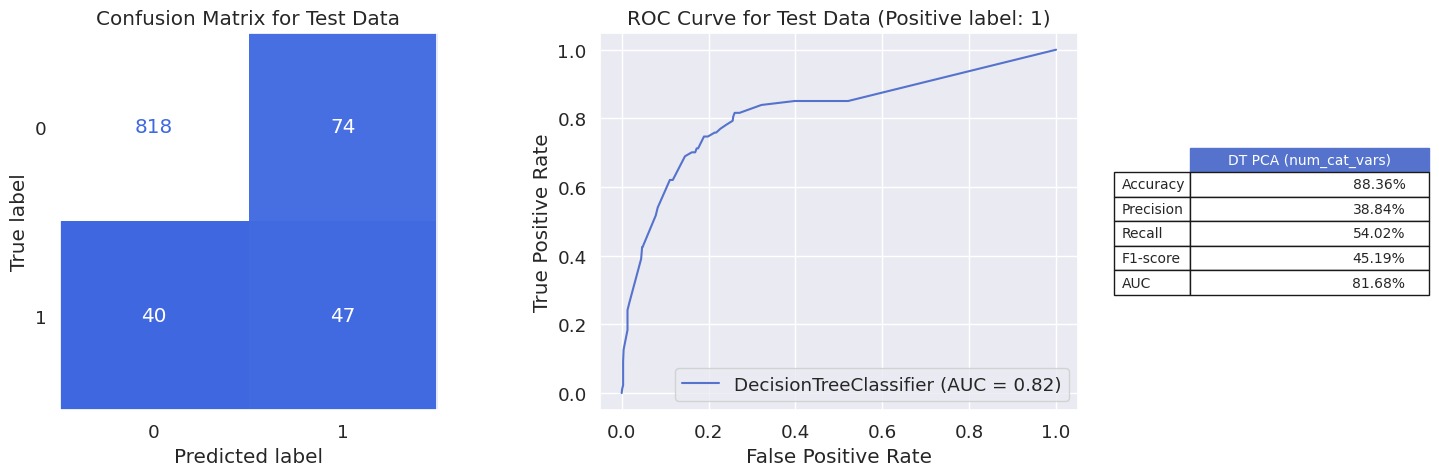

In [ ]:
model_evaluation(dt_pca_num_cat_opt, X_train, X_test, y_train, y_test, 'DT PCA (num_cat_vars)')

Fungsi `model_evaluation` dieksekusi untuk mengevaluasi kinerja model Decision Tree setelah proses PCA ('num_cat_vars') yang telah dioptimalkan (`dt_pca_num_cat_opt`). Fungsi ini mencakup laporan klasifikasi untuk set pelatihan dan pengujian, menampilkan confusion matrix untuk data pengujian, kurva ROC beserta skor AUC, serta tabel yang menunjukkan beberapa metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC. Ini membantu dalam memahami seberapa baik model dapat membedakan antara kelas positif dan negatif dalam memprediksi calon peminjam pinjaman.

Model Decision Tree setelah proses PCA ('num_cat_vars') memiliki F1-score sebesar 45.19%. Berdasarkan confusion matrix, jumlah nilai FN dan FP adalah 114. Dengan kata lain, dari 979 nasabah bank, model ini membuat kesalahan dalam 114 kasus dalam memprediksi apakah nasabah menerima pinjaman atau tidak.

In [ ]:
# Menyimpan kinerja akhir pengklasifikasian Decision Tree
dt_pca_num_cat_result = metrics_calculator(dt_pca_num_cat_opt, X_test, y_test, 'DT PCA (num_cat_vars)')
dt_pca_num_cat_result.to_csv('dt_pca_num_cat_result.csv')
dt_pca_num_cat_result

,DT PCA (num_cat_vars)
Accuracy,88.36%
Precision,38.84%
Recall,54.02%
F1-score,45.19%
AUC,81.68%


Kode tersebut digunakan untuk menyimpan kinerja akhir dari model Decision Tree setelah proses PCA ('num_cat_vars'). Dengan menggunakan fungsi `metrics_calculator`, kinerja model dievaluasi berdasarkan beberapa metrik performa (Accuracy, Precision, Recall, F1-score, dan AUC) pada data uji. Hasil evaluasi tersebut kemudian disimpan dalam variabel `dt_pca_num_cat_result` yang menampilkan nilai-nilai metrik performa tersebut dalam bentuk persentase.

Output tersebut merupakan metrik evaluasi untuk model Decision Tree setelah proses PCA ('num_cat_vars') pada data uji.

- Accuracy (88.36%) menunjukkan bahwa model memiliki tingkat ketepatan yang cukup tinggi dalam mengklasifikasikan data, dengan 88.36% prediksi yang benar dari keseluruhan data uji.
- Precision (38.84%) mengindikasikan bahwa dari semua prediksi positif yang dibuat oleh model, 38.84% benar-benar positif. Ini menunjukkan masih banyak terdapat false positive.
- Recall (54.02%) berarti dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 54.02% dengan benar. Ini menunjukkan masih banyak terdapat false negative.
- F1-score (45.19%) adalah rata-rata harmonik dari precision dan recall, yang mencerminkan keseimbangan antara keduanya.
- AUC (81.68%) menunjukkan area under the ROC curve, mengindikasikan performa model yang cukup baik dalam membedakan antara kelas positif dan negatif.

Secara keseluruhan, model ini menunjukkan performa yang masih kurang pada data uji dengan nilai yang cukup rendah pada metrik F1-score.

#### Random Forest

In [ ]:
# Bobot yang terkait dengan kelas
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Menentukan kisi-kisi hyperparameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': np.arange(5, 12),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}

Kode tersebut bertujuan untuk menentukan kisi-kisi hyperparameter yang akan digunakan dalam proses optimasi model Random Forest. Terdapat beberapa hyperparameter yang diuji dalam kisi-kisi, yaitu sebagai berikut.

- n_estimators: Jumlah pohon keputusan dalam hutan acak. Dalam grid ini, nilai yang diuji adalah 50, 100, dan 150. Semakin banyak pohon yang digunakan, semakin baik model dapat menangkap variasi dalam data, tetapi juga membutuhkan lebih banyak waktu komputasi.
- max_depth: Kedalaman maksimum dari setiap pohon keputusan. Nilai yang diuji berkisar dari 5 hingga 12. Parameter ini mengontrol seberapa dalam pohon keputusan dapat berkembang. Kedalaman yang lebih besar memungkinkan pohon menangkap lebih banyak detail dari data, tetapi juga dapat menyebabkan overfitting.
- min_samples_split: Jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Nilai yang diuji adalah 2, 3, dan 4. Ini membantu mengontrol ukuran pohon keputusan dan mencegah pohon menjadi terlalu terperinci (overfitting).
- min_samples_leaf: Jumlah sampel minimum yang harus ada di simpul daun. Nilai yang diuji adalah 1, 2, dan 3. Parameter ini memastikan bahwa setiap simpul akhir memiliki sejumlah minimum sampel, yang membantu mencegah pohon dari menjadi terlalu terperinci.
- class_weight: Bobot yang terkait dengan masing-masing kelas untuk menangani ketidakseimbangan kelas dalam data. Nilai yang diuji adalah berbagai kombinasi dari 0 hingga 1, dengan langkah kecil yang dihasilkan dari `np.linspace(0.001,1,20)`. Dengan memberikan bobot lebih besar pada kelas minoritas, model diharapkan dapat memberikan perhatian lebih pada kelas minoritas tersebut.

Kombinasi parameter-parameter ini akan diuji menggunakan kisi-kisi hiperparameter (param_grid) untuk mencari kombinasi yang optimal yang menghasilkan kinerja terbaik dari model yang dibangun, yang dievaluasi berdasarkan metrik performa seperti F1-score atau AUC pada validasi silang.

In [ ]:
# Lakukan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Buat objek Random Forest Classifier
rf_pca_num_cat = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Temukan pengklasifikasi terbaik dengan hyperparameter yang optimal
rf_pca_num_cat_opt = tune_clf_hyperparameters(rf_pca_num_cat, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.1061578947368421, 1: 0.8938421052631579}, 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


Kode tersebut menjelaskan proses untuk membangun model Random Forest Classifier setelah proses PCA ('num_cat_vars'). Pertama, dataset dibagi menjadi data pelatihan dan data uji menggunakan fungsi `train_test_split`. Data uji sebesar 20% dari dataset digunakan untuk evaluasi model, sementara sisanya digunakan untuk melatih model. Selanjutnya, model Random Forest Classifier setelah proses PCA ('num_cat_vars') (`rf_pca_num_cat`) dibuat dengan menggunakan parameter default seperti `criterion='gini'`, `max_features=None`, dan `bootstrap=True`, dengan nilai seed acak 0 untuk reproduktibilitas hasil. Kemudian, model tersebut tersebut dioptimalkan dengan mencari kombinasi terbaik dari hyperparameter menggunakan fungsi `tune_clf_hyperparameters`. Hasilnya menunjukkan bahwa kombinasi hyperparameter terbaik untuk model tersebut adalah dengan `class_weight` yang mengatur bobot kelas minoritas sebesar 0.89, `max_depth` sebesar 9, `min_samples_leaf` sebesar 3, `min_samples_split` sebesar 2, dan `n_estimators` (jumlah pohon) sebesar 50. Dengan mengoptimalkan hyperparameter ini, diharapkan model tersebut dapat memberikan kinerja prediksi yang lebih baik, terutama dalam menghadapi dataset yang mungkin tidak seimbang dalam distribusi kelasnya.

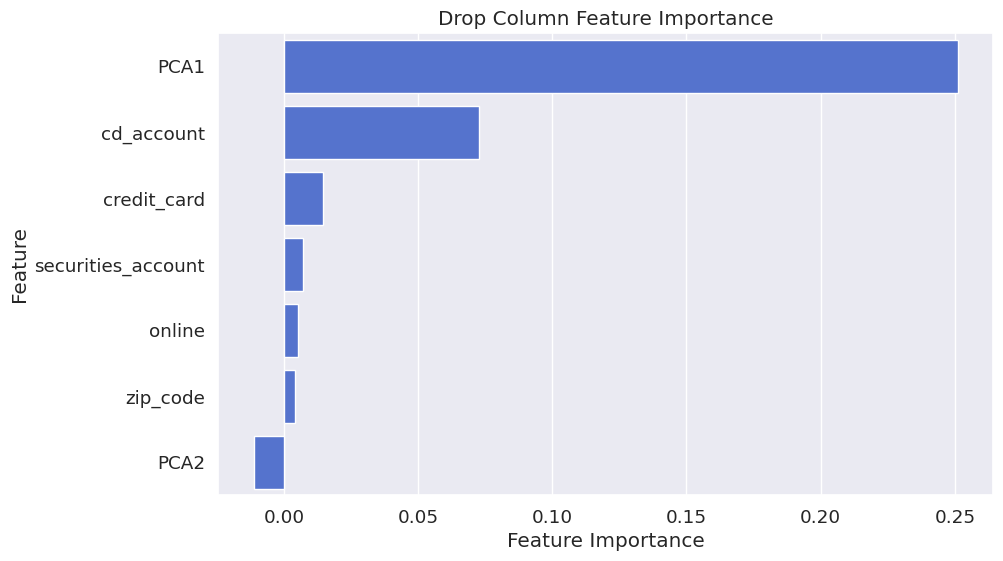

In [ ]:
drop_column_importance_plot(rf_pca_num_cat_opt, X_train, y_train)

Fungsi `drop_column_importance_plot` digunakan untuk mengevaluasi tingkat kepentingan fitur-fitur dalam model Random Forest Classifier setelah proses PCA ('num_cat_vars') yang telah dioptimalkan (`rf_pca_num_cat_opt`). Prosesnya melibatkan penghitungan pengaruh penghapusan masing-masing fitur terhadap performa keseluruhan model. Hasilnya direpresentasikan dalam bentuk diagram batang horizontal yang menunjukkan tingkat kepentingan relatif dari setiap fitur terhadap prediksi model. Tujuannya adalah untuk membantu pemahaman tentang kontribusi relatif setiap fitur terhadap keakuratan prediksi model Random Forest setelah proses PCA ('num_cat_vars') yang telah dioptimalkan.

In [ ]:
# Temukan fitur penting dengan nilai feature_importance positif
feature_importances = drop_column_importance(rf_pca_num_cat_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Menyaring dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Dalam kode tersebut, kita menggunakan model Random Forest Classifier setelah proses PCA ('num_cat_vars') yang telah dioptimalkan (`rf_pca_num_cat_opt`) untuk menemukan fitur-fitur yang dianggap penting. Pertama, kita menghitung pengaruh penghapusan masing-masing fitur terhadap kinerja model dengan nilai feature_importance yang positif. Fitur-fitur yang memiliki pengaruh di atas ambang batas tertentu (0.01 dalam kasus ini) disimpan dalam variabel `selected_features`. Selanjutnya, dataset pelatihan (`X_train`) dan dataset uji (`X_test`) disaring sehingga hanya fitur-fitur yang terpilih saja yang dipertahankan untuk analisis dan prediksi selanjutnya. Langkah ini bertujuan untuk meningkatkan efisiensi dan akurasi model dengan fokus pada fitur-fitur yang memiliki dampak signifikan terhadap prediksi model.

In [ ]:
# Membangun objek Random Forest Classifier dengan mempertimbangkan nilai optimal yang diperoleh untuk hyperparameter
rf_pca_num_cat_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=50,
                                  max_depth = 11,  min_samples_leaf=2, min_samples_split=2,
                                  class_weight={0: 0.11, 1: 0.89}, random_state=0)


# Melatih model Random Forest akhir
rf_pca_num_cat_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.11, 1: 0.89}, max_depth=11,
                       max_features=None, min_samples_leaf=2, n_estimators=50,
                       random_state=0)

Kode tersebut digunakan untuk menciptakan sebuah objek RandomForestClassifier final setelah proses PCA ('num_cat_vars'), yaitu `rf_pca_num_cat_final`, yang telah disesuaikan dengan nilai optimal dari beberapa hyperparameter yang telah diperoleh sebelumnya melalui proses penyetelan. Model ini menggunakan kriteria 'gini' untuk mengukur kualitas split, tidak membatasi jumlah fitur maksimum, menggunakan bootstrap untuk membangun setiap pohon, dan memiliki 50 pohon keputusan (n_estimators). Selain itu, kedalaman maksimum pohon adalah 11 (ditingkatkan dari 9 menjadi 11 karena untuk meningkatkan sebagian varians dari model), dan jumlah sampel minimum untuk membagi node adalah 2, dengan jumlah sampel minimum di setiap leaf node adalah 2 (diturunkan dari 3 menjadi 2 karena untuk meningkatkan sebagian varians dari model). Bobot kelas untuk kelas 0 dan 1 telah ditetapkan masing-masing menjadi 0.11 dan 0.89. Model ini kemudian dilatih dengan menggunakan data pelatihan X_train dan y_train.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3569
           1       0.47      0.95      0.63       346

    accuracy                           0.90      3915
   macro avg       0.73      0.92      0.79      3915
weighted avg       0.95      0.90      0.92      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       892
           1       0.36      0.68      0.47        87

    accuracy                           0.86       979
   macro avg       0.66      0.78      0.69       979
weighted avg       0.91      0.86      0.88       979



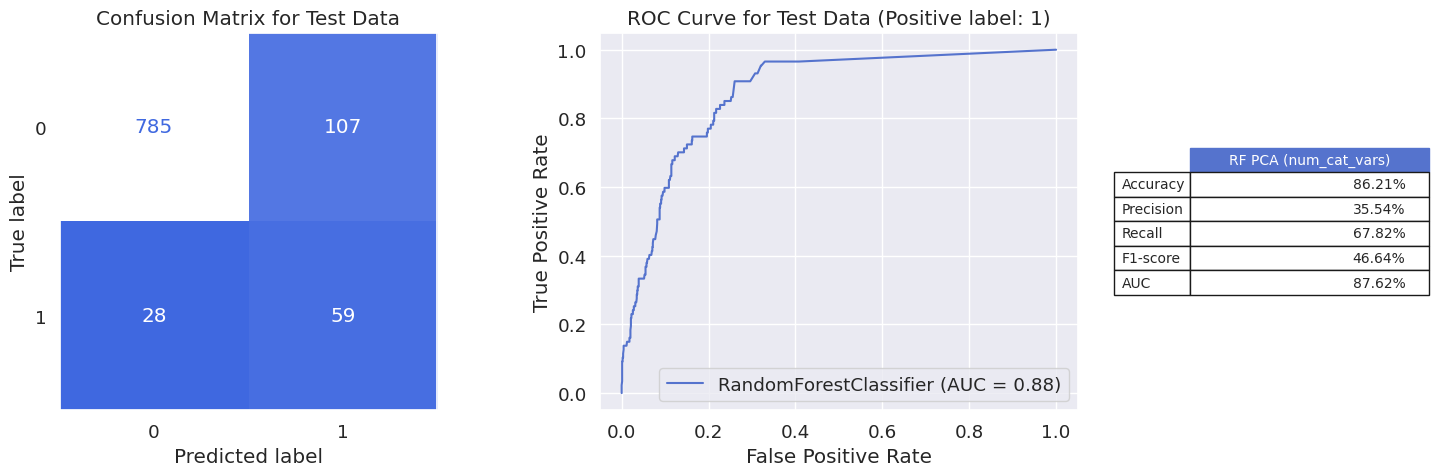

In [ ]:
model_evaluation(rf_pca_num_cat_final, X_train, X_test, y_train, y_test, 'RF PCA (num_cat_vars)')

Fungsi `model_evaluation` dieksekusi untuk mengevaluasi kinerja model Random Forest final setelah proses PCA ('num_cat_vars'), yaitu `rf_pca_num_cat_final`. Fungsi ini mencakup laporan klasifikasi untuk set pelatihan dan pengujian, menampilkan confusion matrix untuk data pengujian, kurva ROC beserta skor AUC, serta tabel yang menunjukkan beberapa metrik performa seperti akurasi, presisi, recall, F1-score, dan AUC. Ini membantu dalam memahami seberapa baik model dapat membedakan antara kelas positif dan negatif dalam memprediksi calon peminjam pinjaman.

Model Random Forest setelah proses PCA ('num_cat_vars') memiliki F1-score sebesar 46.64%. Berdasarkan confusion matrix, jumlah nilai FN dan FP adalah 135. Dengan kata lain, dari 979 nasabah bank, model ini membuat kesalahan dalam 135 kasus dalam memprediksi apakah nasabah menerima pinjaman atau tidak.

In [ ]:
# Menyimpan kinerja akhir pengklasifikasi Random Forest
rf_pca_num_cat_result = metrics_calculator(rf_pca_num_cat_final, X_test, y_test, 'RF PCA (num_cat_vars)')
rf_pca_num_cat_result.to_csv('rf_pca_num_cat_result.csv')
rf_pca_num_cat_result

,RF PCA (num_cat_vars)
Accuracy,86.21%
Precision,35.54%
Recall,67.82%
F1-score,46.64%
AUC,87.62%


Kode tersebut digunakan untuk menyimpan kinerja akhir dari model Random Forest setelah proses PCA ('num_cat_vars'). Dengan menggunakan fungsi `metrics_calculator`, kinerja model dievaluasi berdasarkan beberapa metrik performa (Accuracy, Precision, Recall, F1-score, dan AUC) pada data uji. Hasil evaluasi tersebut kemudian disimpan dalam variabel `rf_pca_num_cat_result` yang menampilkan nilai-nilai metrik performa tersebut dalam bentuk persentase.

Output tersebut merupakan metrik evaluasi untuk model Random Forest setelah proses PCA ('num_cat_vars') pada data uji.

- Accuracy (86.21%) menunjukkan bahwa model memiliki tingkat ketepatan yang cukup tinggi dalam mengklasifikasikan data, dengan 86.21% prediksi yang benar dari keseluruhan data uji.
- Precision (35.54%) mengindikasikan bahwa dari semua prediksi positif yang dibuat oleh model, 35.54% benar-benar positif. Ini menunjukkan masih banyak terdapat false positive.
- Recall (67.82%) berarti dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 67.82% dengan benar. Ini menunjukkan cukup banyak terdapat false negative.
- F1-score (46.64%) adalah rata-rata harmonik dari precision dan recall, yang mencerminkan keseimbangan antara keduanya.
- AUC (87.62%) menunjukkan area under the ROC curve, mengindikasikan performa model yang cukup baik dalam membedakan antara kelas positif dan negatif.

Secara keseluruhan, model ini menunjukkan performa yang masih kurang pada data uji dengan nilai yang cukup rendah pada metrik F1-score.

## Kesimpulan

In [ ]:
# Menggabungkan hasil kinerja pengklasifikasi sebelumnya ke dalam satu dataframe
results = pd.concat([dt_result, rf_result, dt_pca_num_result, rf_pca_num_result, dt_pca_num_cat_result, rf_pca_num_cat_result], axis=1).T

# Dataframe bingkai data dalam urutan menurun berdasarkan nilai F1-score
results.sort_values(by='F1-score', ascending=False, inplace=True)

# Ganti warna kolom F1-score
results.style.applymap(lambda x: 'background-color: #5573cd', subset='F1-score')

,Accuracy,Precision,Recall,F1-score,AUC
Random Forest,98.88%,95.24%,91.95%,93.57%,99.87%
Decision Tree,98.37%,92.77%,88.51%,90.59%,98.52%
RF PCA (num_vars),97.34%,98.41%,71.26%,82.67%,98.26%
DT PCA (num_vars),96.83%,90.0%,72.41%,80.25%,90.66%
RF PCA (num_cat_vars),86.21%,35.54%,67.82%,46.64%,87.62%
DT PCA (num_cat_vars),88.36%,38.84%,54.02%,45.19%,81.68%


Kode ini berfungsi untuk menggabungkan hasil kinerja dari beberapa pengklasifikasi ke dalam satu DataFrame `results`. DataFrame ini mencakup hasil evaluasi seperti akurasi, presisi, recall, dan F1-score dari model-model seperti Decision Tree (dt_result), Random Forest (rf_result), serta versi PCA dari keduanya (dt_pca_num_result, rf_pca_num_result, dt_pca_num_cat_result, dan rf_pca_num_cat_result). Setelah digabungkan, DataFrame tersebut diurutkan berdasarkan nilai F1-score secara menurun untuk mempermudah perbandingan kinerja antar model. Selain itu, kode juga mengubah warna latar belakang sel F1-score menggunakan gaya untuk menyorot nilai F1-score yang lebih tinggi dalam warna biru (#5573cd), sehingga memudahkan identifikasi model-model dengan kinerja terbaik berdasarkan metrik ini.

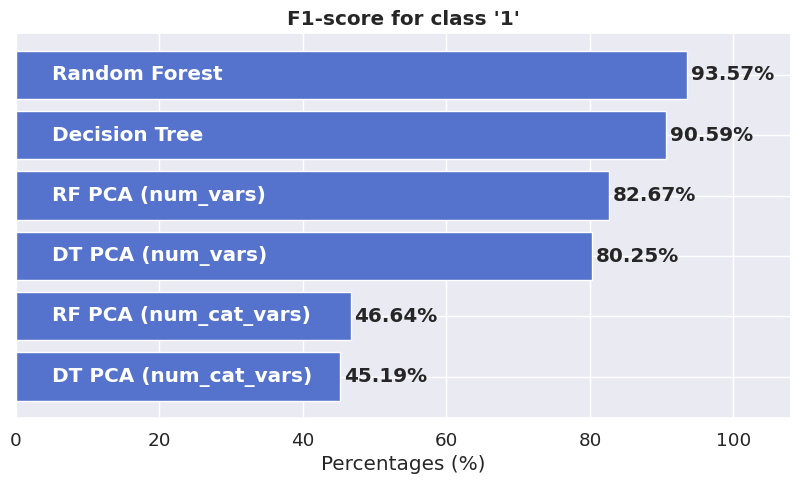

In [ ]:
# Mempersiapkan nilai
results.sort_values(by='F1-score', ascending=True, inplace=True)
f1_scores = results['F1-score'].str.strip('%').astype(float)

# Plot diagram batang horisontal
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(results.index, f1_scores, color='#5573cd')

# Beri keterangan nilai dan indeks
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold')
    ax.text(5, i, name, ha='left', va='center', fontweight='bold', color='white')

ax.set_xlim([0,108])
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.title("F1-score for class '1'", fontweight='bold')
plt.xlabel('Percentages (%)')
plt.show()

Kode ini digunakan untuk memvisualisasikan F1-score untuk kelas '1' dari hasil evaluasi model yang disimpan dalam dataframe `results`. Grafik ini memberikan gambaran visual yang jelas tentang bagaimana performa masing-masing model dalam memprediksi kelas '1', dengan model terbaik berada di bagian atas grafik.

Dalam klasifikasi calon nasabah pinjaman potensial, Random Forest menunjukkan kinerja yang lebih baik dibandingkan dengan Decision Tree, baik sebelum maupun setelah melakukan Principal Component Analysis (PCA). Sebelum proses PCA, Random Forest mencapai Accuracy 98.88%, Precision 95.24%, Recall 91.95%, F1-score 93.57%, dan AUC 99.87%. Sementara itu, Decision Tree memiliki Accuracy 98.37%, Precision 92.77%, Recall 88.51%, F1-score 90.59%, dan AUC 98.52%. Hal ini menunjukkan bahwa Random Forest lebih unggul, akurat, dan konsisten dalam mengklasifikasikan nasabah pinjaman potensial karena menggabungkan prediksi dari beberapa pohon keputusan, sehingga mengurangi overfitting.

Setelah proses PCA terhadap num_vars atau variabel numerik (`age`, `income`, `cc_avg`, dan `mortgage`), menyebabkan kinerja kedua model menurun. Random Forest PCA (num_vars) memiliki Accuracy 97.34%, Precision 98.41%, Recall 71.26%, F1-score 82.67%, dan AUC 98.26%. Sementara itu, Decision Tree PCA (num_vars) memiliki Accuracy 96.83%, Precision 90%, Recall 72.41%, F1-score 80.25%, dan AUC 90.66%. Penurunan kinerja ini disebabkan oleh hilangnya beberapa informasi penting dalam proses reduksi dimensi melalui PCA. Namun Random Forest masih menunjukkan kinerja yang lebih baik dibandingkan Decision Tree.

Penerapan PCA terhadap num_cat_vars atau variabel numerik dan kategorikal (`family` dan `education`), menyebabkan penurunan kinerja yang signifikan pada kedua model. Random Forest PCA (num_cat_vars) memiliki Accuracy 86.21%, Precision 35.54%, Recall 67.82%, F1-score 46.64%, dan AUC 87.62%. Sementara itu, Decision Tree PCA (num_cat_vars) memiliki Accuracy 88.36%, Precision 38.84%, Recall 54.02%, F1-score 45.19%, dan AUC 81.68%. Ini menunjukkan bahwa kombinasi variabel numerik dan kategorikal melalui PCA lebih sulit untuk ditangani oleh model akibat hilangnya informasi penting secara signifikan dalam proses reduksi dimensi melalui PCA tersebut, yang menyebabkan penurunan kinerja yang signifikan. Namun Random Forest masih menunjukkan kinerja yang sedikit lebih baik dibandingkan Decision Tree.

Secara keseluruhan, Random Forest sebelum proses PCA memberikan hasil terbaik dalam mengklasifikasikan calon nasabah pinjaman potensial dalam semua metrik evaluasi, khususnya F1-score. Setelah penerapan PCA, terutama pada variabel numerik, kinerja model sedikit menurun tetapi masih cukup baik, dengan Random Forest tetap mengungguli Decision Tree. Namun, penerapan PCA pada variabel numerik dan kategorikal secara bersama-sama menghasilkan penurunan kinerja yang signifikan untuk kedua model, hal ini menunjukkan bahwa terdapat informasi yang hilang atau transformasi yang dilakukan oleh PCA pada kombinasi variabel ini tidak optimal untuk klasifikasi ini. Meskipun PCA dapat membantu dalam mengurangi kompleksitas data, tetapi hasil menunjukkan bahwa Random Forest sebelum proses PCA memberikan kinerja yang lebih optimal. Oleh karena itu, Random Forest sebelum proses PCA merupakan pilihan yang paling efektif untuk tugas klasifikasi ini.

Berdasarkan grafik tingkat kepentingan fitur sebelumnya, dari semua fitur yang diuji, fitur 'education', 'income', 'family', 'cc_avg', dan 'cd_account' memiliki peran paling penting dalam mengidentifikasi calon nasabah pinjaman potensial.
